In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
xrange = np.linspace(0, 1, 101)
yrange = np.linspace(0, 1, 101)
xmesh, ymesh = np.meshgrid(xrange, yrange)

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

$$ f_1(x, y, t) = e^{-t}(cos2\pi xcos2\pi y + sin2\pi xsin2\pi y) $$
$$ f_2(x, y, t) = x + y + t $$
$$ f_3(x, y, t) = e^{-t}(2sin2\pi x + sin2\pi xcos2\pi y) $$

Case 1: f1

In [7]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [8]:
out1[0, :, :]

array([[1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ],
       [0.99802673, 1.        , 0.99802673, ..., 0.98228725, 0.9921147 ,
        0.99802673],
       [0.9921147 , 0.99802673, 1.        , ..., 0.96858316, 0.98228725,
        0.9921147 ],
       ...,
       [0.9921147 , 0.98228725, 0.96858316, ..., 1.        , 0.99802673,
        0.9921147 ],
       [0.99802673, 0.9921147 , 0.98228725, ..., 0.99802673, 1.        ,
        0.99802673],
       [1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ]])

In [9]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [10]:
sensor1.shape

(41, 4, 4)

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [14]:
t_train

array([[0.725],
       [0.15 ],
       [0.65 ],
       [0.3  ],
       [0.425],
       [0.225],
       [0.375],
       [0.8  ],
       [0.4  ],
       [0.875],
       [0.85 ],
       [0.   ],
       [0.675],
       [0.125],
       [0.275],
       [0.025],
       [0.75 ],
       [0.525],
       [0.05 ],
       [0.775],
       [0.925],
       [0.075],
       [0.9  ],
       [0.575],
       [0.825],
       [0.25 ],
       [0.55 ],
       [0.45 ],
       [0.5  ],
       [0.175],
       [0.35 ],
       [0.7  ],
       [0.95 ]])

In [15]:
x_train1

array([[[ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457]],

       [[ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798]],

       [[ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
       

In [16]:
x_test1

array([[[ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164]],

       [[ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735]],

       [[ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
       

In [17]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=101*101, activation=None, name='outputLayer')(x_)
output_img = tf.keras.layers.Reshape((101,101))(output_data)
# Shallow Decoder (SD)
sd1 = tf.keras.Model(input_time, output_img)
sd2 = tf.keras.Model(input_time, output_img)
sd3 = tf.keras.Model(input_time, output_img)

In [18]:
sd1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 reshape (Reshape)           (None, 1)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 128)              256       
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 128)              16512     
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 128)              16512     
 se)                                                             
                                                             

In [19]:
sd1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sd1.fit(t_train, y_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 5ms/step - loss: 0.2213 - rmse: 0.4704
Epoch 2/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2211 - rmse: 0.4702
Epoch 3/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2208 - rmse: 0.4699
Epoch 4/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2206 - rmse: 0.4697
Epoch 5/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2203 - rmse: 0.4694
Epoch 6/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2200 - rmse: 0.4691
Epoch 7/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2197 - rmse: 0.4688
Epoch 8/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2194 - rmse: 0.4684
Epoch 9/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2191 - rmse: 0.4681
Epoch 10/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2187 - rmse: 0.4677
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.0707 - rmse: 0.2659
Epoch 87/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0703 - rmse: 0.2652
Epoch 88/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0700 - rmse: 0.2646
Epoch 89/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0698 - rmse: 0.2642
Epoch 90/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0700 - rmse: 0.2645
Epoch 91/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0698 - rmse: 0.2643
Epoch 92/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0697 - rmse: 0.2640
Epoch 93/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0696 - rmse: 0.2639
Epoch 94/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0696 - rmse: 0.2639
Epoch 95/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0698 - rmse: 0.2641
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.0499 - rmse: 0.2233
Epoch 171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0496 - rmse: 0.2226
Epoch 172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0493 - rmse: 0.2219
Epoch 173/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0490 - rmse: 0.2214
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0487 - rmse: 0.2207
Epoch 175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0484 - rmse: 0.2201
Epoch 176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0481 - rmse: 0.2193
Epoch 177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0478 - rmse: 0.2186
Epoch 178/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0475 - rmse: 0.2179
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0471 - rmse: 0.2171
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0248 - rmse: 0.1576
Epoch 255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0247 - rmse: 0.1571
Epoch 256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0245 - rmse: 0.1567
Epoch 257/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0245 - rmse: 0.1565
Epoch 258/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0245 - rmse: 0.1565
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0244 - rmse: 0.1562
Epoch 260/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0241 - rmse: 0.1552
Epoch 261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0236 - rmse: 0.1537
Epoch 262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0231 - rmse: 0.1519
Epoch 263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0226 - rmse: 0.1502
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0524
Epoch 340/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 342/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 2.7149e-04 - rmse: 0.0165
Epoch 421/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6798e-04 - rmse: 0.0164
Epoch 422/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6433e-04 - rmse: 0.0163
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6144e-04 - rmse: 0.0162
Epoch 424/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5795e-04 - rmse: 0.0161
Epoch 425/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5535e-04 - rmse: 0.0160
Epoch 426/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5310e-04 - rmse: 0.0159
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5093e-04 - rmse: 0.0158
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4925e-04 - rmse: 0.0158
Epoch 429/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4883e-04 - rmse: 0.0158
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 1.9173e-04 - rmse: 0.0138
Epoch 502/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9273e-04 - rmse: 0.0139
Epoch 503/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8019e-04 - rmse: 0.0134
Epoch 504/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6328e-04 - rmse: 0.0128
Epoch 505/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4905e-04 - rmse: 0.0122
Epoch 506/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4267e-04 - rmse: 0.0119
Epoch 507/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3960e-04 - rmse: 0.0118
Epoch 508/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4175e-04 - rmse: 0.0119
Epoch 509/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4146e-04 - rmse: 0.0119
Epoch 510/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3858e-04 - rmse: 0.0118
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 7.5663e-05 - rmse: 0.0087
Epoch 583/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7806e-05 - rmse: 0.0088
Epoch 584/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9508e-05 - rmse: 0.0089
Epoch 585/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0222e-05 - rmse: 0.0090
Epoch 586/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7708e-05 - rmse: 0.0088
Epoch 587/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2868e-05 - rmse: 0.0085
Epoch 588/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9482e-05 - rmse: 0.0083
Epoch 589/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9768e-05 - rmse: 0.0084
Epoch 590/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3395e-05 - rmse: 0.0086
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0386e-05 - rmse: 0.0090
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 3.6790e-05 - rmse: 0.0061
Epoch 664/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6495e-05 - rmse: 0.0060
Epoch 665/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6266e-05 - rmse: 0.0060
Epoch 666/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6056e-05 - rmse: 0.0060
Epoch 667/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5903e-05 - rmse: 0.0060
Epoch 668/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5855e-05 - rmse: 0.0060
Epoch 669/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5838e-05 - rmse: 0.0060
Epoch 670/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5531e-05 - rmse: 0.0060
Epoch 671/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5625e-05 - rmse: 0.0060
Epoch 672/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6507e-05 - rmse: 0.0060
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 2.5973e-05 - rmse: 0.0051
Epoch 745/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4671e-05 - rmse: 0.0050
Epoch 746/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3564e-05 - rmse: 0.0049
Epoch 747/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3751e-05 - rmse: 0.0049
Epoch 748/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4174e-05 - rmse: 0.0049
Epoch 749/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5171e-05 - rmse: 0.0050
Epoch 750/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6636e-05 - rmse: 0.0052
Epoch 751/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7438e-05 - rmse: 0.0052
Epoch 752/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6720e-05 - rmse: 0.0052
Epoch 753/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4700e-05 - rmse: 0.0050
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 1.4058e-05 - rmse: 0.0037
Epoch 826/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3879e-05 - rmse: 0.0037
Epoch 827/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3822e-05 - rmse: 0.0037
Epoch 828/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3828e-05 - rmse: 0.0037
Epoch 829/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3877e-05 - rmse: 0.0037
Epoch 830/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3809e-05 - rmse: 0.0037
Epoch 831/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3775e-05 - rmse: 0.0037
Epoch 832/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3890e-05 - rmse: 0.0037
Epoch 833/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3979e-05 - rmse: 0.0037
Epoch 834/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4195e-05 - rmse: 0.0038
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 1.0580e-05 - rmse: 0.0033
Epoch 907/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0313e-05 - rmse: 0.0032
Epoch 908/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0547e-05 - rmse: 0.0032
Epoch 909/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0490e-05 - rmse: 0.0032
Epoch 910/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0523e-05 - rmse: 0.0032
Epoch 911/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0594e-05 - rmse: 0.0033
Epoch 912/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0514e-05 - rmse: 0.0032
Epoch 913/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0405e-05 - rmse: 0.0032
Epoch 914/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0151e-05 - rmse: 0.0032
Epoch 915/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0043e-05 - rmse: 0.0032
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 8.0404e-06 - rmse: 0.0028
Epoch 988/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6715e-06 - rmse: 0.0028
Epoch 989/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3835e-06 - rmse: 0.0027
Epoch 990/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5965e-06 - rmse: 0.0028
Epoch 991/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.2326e-06 - rmse: 0.0029
Epoch 992/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.6104e-06 - rmse: 0.0029
Epoch 993/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4247e-06 - rmse: 0.0029
Epoch 994/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7164e-06 - rmse: 0.0028
Epoch 995/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.1637e-06 - rmse: 0.0027
Epoch 996/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4213e-06 - rmse: 0.0027
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 5.7084e-06 - rmse: 0.0024
Epoch 1068/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8816e-06 - rmse: 0.0024
Epoch 1069/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3985e-06 - rmse: 0.0023
Epoch 1070/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3542e-06 - rmse: 0.0023
Epoch 1071/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8621e-06 - rmse: 0.0024
Epoch 1072/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3174e-06 - rmse: 0.0025
Epoch 1073/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3454e-06 - rmse: 0.0025
Epoch 1074/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7918e-06 - rmse: 0.0024
Epoch 1075/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4316e-06 - rmse: 0.0023
Epoch 1076/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4028e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 4.4055e-06 - rmse: 0.0021
Epoch 1148/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0494e-06 - rmse: 0.0020
Epoch 1149/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9432e-06 - rmse: 0.0020
Epoch 1150/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0511e-06 - rmse: 0.0020
Epoch 1151/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2152e-06 - rmse: 0.0021
Epoch 1152/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0180e-06 - rmse: 0.0020
Epoch 1153/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8169e-06 - rmse: 0.0020
Epoch 1154/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1418e-06 - rmse: 0.0020
Epoch 1155/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2524e-06 - rmse: 0.0021
Epoch 1156/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0246e-06 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.1229e-06 - rmse: 0.0018
Epoch 1228/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7865e-06 - rmse: 0.0017
Epoch 1229/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2713e-06 - rmse: 0.0018
Epoch 1230/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6171e-06 - rmse: 0.0021
Epoch 1231/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2771e-06 - rmse: 0.0023
Epoch 1232/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4136e-06 - rmse: 0.0021
Epoch 1233/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2207e-06 - rmse: 0.0018
Epoch 1234/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7684e-06 - rmse: 0.0017
Epoch 1235/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0809e-06 - rmse: 0.0018
Epoch 1236/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6020e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.0742e-06 - rmse: 0.0014
Epoch 1308/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3419e-06 - rmse: 0.0015
Epoch 1309/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4127e-06 - rmse: 0.0016
Epoch 1310/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1606e-06 - rmse: 0.0015
Epoch 1311/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0274e-06 - rmse: 0.0014
Epoch 1312/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0954e-06 - rmse: 0.0014
Epoch 1313/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1993e-06 - rmse: 0.0015
Epoch 1314/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1328e-06 - rmse: 0.0015
Epoch 1315/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0312e-06 - rmse: 0.0014
Epoch 1316/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1337e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.2300e-06 - rmse: 0.0018
Epoch 1388/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5425e-06 - rmse: 0.0016
Epoch 1389/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2460e-06 - rmse: 0.0015
Epoch 1390/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7074e-06 - rmse: 0.0016
Epoch 1391/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0381e-06 - rmse: 0.0017
Epoch 1392/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5270e-06 - rmse: 0.0016
Epoch 1393/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9657e-06 - rmse: 0.0014
Epoch 1394/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7211e-06 - rmse: 0.0013
Epoch 1395/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6554e-06 - rmse: 0.0013
Epoch 1396/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6494e-06 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.3071e-06 - rmse: 0.0011
Epoch 1468/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5349e-06 - rmse: 0.0012
Epoch 1469/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5449e-06 - rmse: 0.0012
Epoch 1470/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3387e-06 - rmse: 0.0012
Epoch 1471/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3516e-06 - rmse: 0.0012
Epoch 1472/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8293e-06 - rmse: 0.0014
Epoch 1473/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1986e-06 - rmse: 0.0015
Epoch 1474/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9439e-06 - rmse: 0.0014
Epoch 1475/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5244e-06 - rmse: 0.0012
Epoch 1476/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3031e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.1207e-06 - rmse: 0.0011
Epoch 1548/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1662e-06 - rmse: 0.0011
Epoch 1549/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1654e-06 - rmse: 0.0011
Epoch 1550/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1427e-06 - rmse: 0.0011
Epoch 1551/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1753e-06 - rmse: 0.0011
Epoch 1552/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2009e-06 - rmse: 0.0011
Epoch 1553/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1568e-06 - rmse: 0.0011
Epoch 1554/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0767e-06 - rmse: 0.0010
Epoch 1555/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0378e-06 - rmse: 0.0010
Epoch 1556/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1642e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 8.9121e-07 - rmse: 9.4404e-04
Epoch 1627/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7306e-07 - rmse: 9.3438e-04
Epoch 1628/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7994e-07 - rmse: 9.3805e-04
Epoch 1629/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0272e-07 - rmse: 9.5012e-04
Epoch 1630/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6809e-07 - rmse: 9.3172e-04
Epoch 1631/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8294e-07 - rmse: 9.3965e-04
Epoch 1632/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6493e-07 - rmse: 9.3001e-04
Epoch 1633/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7374e-07 - rmse: 9.3474e-04
Epoch 1634/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.2533e-07 - rmse: 9.6194e-04
Epoch 1635/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.7859e-07 - rmse: 8.8238e-04
Epoch 1705/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4346e-07 - rmse: 9.7132e-04
Epoch 1706/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4608e-07 - rmse: 9.7267e-04
Epoch 1707/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2455e-07 - rmse: 9.0805e-04
Epoch 1708/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7006e-07 - rmse: 8.7753e-04
Epoch 1709/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5870e-07 - rmse: 8.7103e-04
Epoch 1710/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8615e-07 - rmse: 8.8665e-04
Epoch 1711/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7938e-07 - rmse: 8.8283e-04
Epoch 1712/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5634e-07 - rmse: 8.6968e-04
Epoch 1713/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 6ms/step - loss: 6.6304e-07 - rmse: 8.1427e-04
Epoch 1782/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9826e-07 - rmse: 8.3562e-04
Epoch 1783/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4918e-07 - rmse: 8.6555e-04
Epoch 1784/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8111e-07 - rmse: 8.8380e-04
Epoch 1785/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4698e-07 - rmse: 8.6428e-04
Epoch 1786/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8647e-07 - rmse: 8.2853e-04
Epoch 1787/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.7428e-07 - rmse: 8.2114e-04
Epoch 1788/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4144e-07 - rmse: 8.6107e-04
Epoch 1789/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6347e-07 - rmse: 9.2923e-04
Epoch 1790/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.0522e-07 - rmse: 7.7796e-04
Epoch 1859/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.5983e-07 - rmse: 9.2727e-04
Epoch 1860/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7403e-07 - rmse: 9.3490e-04
Epoch 1861/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6915e-07 - rmse: 7.5442e-04
Epoch 1862/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0234e-06 - rmse: 0.0010
Epoch 1863/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4983e-06 - rmse: 0.0012
Epoch 1864/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0913e-06 - rmse: 0.0010
Epoch 1865/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0441e-07 - rmse: 8.9689e-04
Epoch 1866/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3150e-06 - rmse: 0.0011
Epoch 1867/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4

Epoch 1936/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4020e-07 - rmse: 9.6964e-04
Epoch 1937/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0220e-07 - rmse: 9.4984e-04
Epoch 1938/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5239e-07 - rmse: 8.6740e-04
Epoch 1939/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6719e-07 - rmse: 8.7590e-04
Epoch 1940/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8568e-07 - rmse: 8.8638e-04
Epoch 1941/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0081e-07 - rmse: 8.3714e-04
Epoch 1942/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9327e-07 - rmse: 8.3263e-04
Epoch 1943/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5915e-07 - rmse: 8.7129e-04
Epoch 1944/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9976e-07 - rmse: 8.3652e-04
Epoch 1945/10000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 6.8318e-07 - rmse: 8.2655e-04
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9121e-07 - rmse: 8.8950e-04
Epoch 2015/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1495e-07 - rmse: 8.4555e-04
Epoch 2016/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2513e-07 - rmse: 7.9065e-04
Epoch 2017/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8504e-07 - rmse: 7.6488e-04
Epoch 2018/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6561e-07 - rmse: 7.5207e-04
Epoch 2019/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4768e-07 - rmse: 7.4005e-04
Epoch 2020/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3943e-07 - rmse: 7.3446e-04
Epoch 2021/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3301e-07 - rmse: 7.3007e-04
Epoch 2022/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 8.0330e-07 - rmse: 8.9627e-04
Epoch 2091/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4262e-07 - rmse: 7.3663e-04
Epoch 2092/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1359e-07 - rmse: 7.1665e-04
Epoch 2093/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2467e-07 - rmse: 7.2434e-04
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4565e-07 - rmse: 6.6757e-04
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6099e-07 - rmse: 6.0082e-04
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8838e-07 - rmse: 6.2320e-04
Epoch 2097/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2063e-07 - rmse: 6.4856e-04
Epoch 2098/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9464e-07 - rmse: 6.2820e-04
Epoch 2099/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 7ms/step - loss: 3.1526e-07 - rmse: 5.6148e-04
Epoch 2168/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4237e-07 - rmse: 5.8512e-04
Epoch 2169/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5935e-07 - rmse: 5.9946e-04
Epoch 2170/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3134e-07 - rmse: 5.7562e-04
Epoch 2171/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4969e-07 - rmse: 5.9134e-04
Epoch 2172/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4838e-07 - rmse: 5.9024e-04
Epoch 2173/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0151e-07 - rmse: 5.4910e-04
Epoch 2174/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6576e-07 - rmse: 6.0478e-04
Epoch 2175/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0932e-07 - rmse: 6.3978e-04
Epoch 2176/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.5293e-07 - rmse: 5.9408e-04
Epoch 2245/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4302e-07 - rmse: 5.8568e-04
Epoch 2246/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4851e-07 - rmse: 4.9851e-04
Epoch 2247/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1699e-07 - rmse: 5.6302e-04
Epoch 2248/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8048e-07 - rmse: 6.1683e-04
Epoch 2249/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0057e-07 - rmse: 5.4824e-04
Epoch 2250/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4396e-07 - rmse: 4.9392e-04
Epoch 2251/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7943e-07 - rmse: 5.2862e-04
Epoch 2252/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5532e-07 - rmse: 5.0529e-04
Epoch 2253/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.6057e-07 - rmse: 6.0047e-04
Epoch 2322/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2796e-07 - rmse: 5.7268e-04
Epoch 2323/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7781e-07 - rmse: 5.2707e-04
Epoch 2324/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5224e-07 - rmse: 5.9349e-04
Epoch 2325/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9472e-07 - rmse: 5.4288e-04
Epoch 2326/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7051e-07 - rmse: 5.2011e-04
Epoch 2327/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6104e-07 - rmse: 5.1092e-04
Epoch 2328/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3912e-07 - rmse: 4.8900e-04
Epoch 2329/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2826e-07 - rmse: 4.7777e-04
Epoch 2330/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 5ms/step - loss: 2.2039e-07 - rmse: 4.6946e-04
Epoch 2399/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1648e-07 - rmse: 4.6528e-04
Epoch 2400/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1388e-07 - rmse: 4.6247e-04
Epoch 2401/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1367e-07 - rmse: 4.6225e-04
Epoch 2402/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2288e-07 - rmse: 4.7211e-04
Epoch 2403/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5396e-07 - rmse: 5.0394e-04
Epoch 2404/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9670e-07 - rmse: 4.4351e-04
Epoch 2405/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5074e-07 - rmse: 5.0074e-04
Epoch 2406/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0665e-07 - rmse: 5.5376e-04
Epoch 2407/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.0987e-07 - rmse: 4.5811e-04
Epoch 2476/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2881e-07 - rmse: 4.7834e-04
Epoch 2477/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0226e-07 - rmse: 4.4973e-04
Epoch 2478/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9808e-07 - rmse: 4.4506e-04
Epoch 2479/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9966e-07 - rmse: 4.4683e-04
Epoch 2480/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9360e-07 - rmse: 4.4000e-04
Epoch 2481/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4544e-07 - rmse: 4.9542e-04
Epoch 2482/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5953e-07 - rmse: 5.0944e-04
Epoch 2483/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8367e-07 - rmse: 4.2857e-04
Epoch 2484/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 3.2509e-07 - rmse: 5.7017e-04
Epoch 2553/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1585e-07 - rmse: 4.6459e-04
Epoch 2554/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9247e-07 - rmse: 4.3871e-04
Epoch 2555/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6867e-07 - rmse: 5.1834e-04
Epoch 2556/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7613e-07 - rmse: 4.1968e-04
Epoch 2557/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2636e-07 - rmse: 4.7578e-04
Epoch 2558/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1393e-07 - rmse: 4.6253e-04
Epoch 2559/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5898e-07 - rmse: 3.9872e-04
Epoch 2560/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7846e-07 - rmse: 4.2244e-04
Epoch 2561/10000
2/2 [==============================] - 0s 8ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.8856e-07 - rmse: 4.3424e-04
Epoch 2630/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.9633e-07 - rmse: 4.4309e-04
Epoch 2631/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6717e-07 - rmse: 5.1688e-04
Epoch 2632/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4303e-07 - rmse: 4.9298e-04
Epoch 2633/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.7383e-07 - rmse: 4.1693e-04
Epoch 2634/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4057e-07 - rmse: 4.9048e-04
Epoch 2635/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8687e-07 - rmse: 4.3229e-04
Epoch 2636/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5499e-07 - rmse: 3.9369e-04
Epoch 2637/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5473e-07 - rmse: 3.9336e-04
Epoch 2638/10000
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 4ms/step - loss: 1.5152e-07 - rmse: 3.8926e-04
Epoch 2707/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0421e-07 - rmse: 4.5189e-04
Epoch 2708/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9162e-07 - rmse: 4.3775e-04
Epoch 2709/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5075e-07 - rmse: 3.8827e-04
Epoch 2710/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2755e-07 - rmse: 4.7703e-04
Epoch 2711/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8515e-07 - rmse: 4.3029e-04
Epoch 2712/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6000e-07 - rmse: 4.0000e-04
Epoch 2713/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2108e-07 - rmse: 4.7019e-04
Epoch 2714/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7974e-07 - rmse: 4.2396e-04
Epoch 2715/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.5233e-07 - rmse: 3.9029e-04
Epoch 2784/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8483e-07 - rmse: 4.2992e-04
Epoch 2785/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4317e-07 - rmse: 4.9313e-04
Epoch 2786/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0499e-07 - rmse: 5.5226e-04
Epoch 2787/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6499e-07 - rmse: 5.1477e-04
Epoch 2788/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9588e-07 - rmse: 5.4395e-04
Epoch 2789/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6134e-07 - rmse: 5.1121e-04
Epoch 2790/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3249e-07 - rmse: 4.8218e-04
Epoch 2791/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7214e-07 - rmse: 4.1490e-04
Epoch 2792/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.4256e-07 - rmse: 3.7757e-04
Epoch 2861/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5779e-07 - rmse: 7.4686e-04
Epoch 2862/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0194e-07 - rmse: 6.3399e-04
Epoch 2863/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6556e-07 - rmse: 4.0689e-04
Epoch 2864/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5136e-07 - rmse: 6.7183e-04
Epoch 2865/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0187e-07 - rmse: 5.4943e-04
Epoch 2866/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6783e-07 - rmse: 4.0967e-04
Epoch 2867/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2095e-07 - rmse: 5.6652e-04
Epoch 2868/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3575e-07 - rmse: 4.8554e-04
Epoch 2869/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.4828e-07 - rmse: 3.8507e-04
Epoch 2938/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0043e-07 - rmse: 6.3280e-04
Epoch 2939/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1485e-07 - rmse: 4.6352e-04
Epoch 2940/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8168e-07 - rmse: 4.2624e-04
Epoch 2941/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6276e-07 - rmse: 4.0343e-04
Epoch 2942/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3043e-07 - rmse: 4.8003e-04
Epoch 2943/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0405e-07 - rmse: 4.5171e-04
Epoch 2944/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3831e-07 - rmse: 3.7190e-04
Epoch 2945/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3154e-07 - rmse: 3.6269e-04
Epoch 2946/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 8ms/step - loss: 1.5338e-07 - rmse: 3.9163e-04
Epoch 3015/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3261e-07 - rmse: 4.8230e-04
Epoch 3016/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4311e-07 - rmse: 4.9306e-04
Epoch 3017/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7152e-07 - rmse: 4.1415e-04
Epoch 3018/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7815e-07 - rmse: 4.2207e-04
Epoch 3019/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6758e-07 - rmse: 4.0937e-04
Epoch 3020/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7132e-07 - rmse: 4.1390e-04
Epoch 3021/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3922e-07 - rmse: 3.7313e-04
Epoch 3022/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1058e-07 - rmse: 4.5889e-04
Epoch 3023/10000
2/2 [==============================] - 0s 8ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.7694e-07 - rmse: 4.2064e-04
Epoch 3092/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5135e-07 - rmse: 3.8903e-04
Epoch 3093/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5215e-07 - rmse: 3.9006e-04
Epoch 3094/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0112e-07 - rmse: 4.4846e-04
Epoch 3095/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4877e-07 - rmse: 3.8571e-04
Epoch 3096/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0646e-07 - rmse: 4.5438e-04
Epoch 3097/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4024e-07 - rmse: 4.9014e-04
Epoch 3098/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4599e-07 - rmse: 4.9597e-04
Epoch 3099/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9479e-07 - rmse: 4.4135e-04
Epoch 3100/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.4156e-07 - rmse: 3.7624e-04
Epoch 3169/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3965e-07 - rmse: 3.7369e-04
Epoch 3170/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2017e-07 - rmse: 3.4665e-04
Epoch 3171/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3632e-07 - rmse: 3.6922e-04
Epoch 3172/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3116e-07 - rmse: 3.6216e-04
Epoch 3173/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3915e-07 - rmse: 3.7303e-04
Epoch 3174/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4108e-07 - rmse: 3.7561e-04
Epoch 3175/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3812e-07 - rmse: 3.7164e-04
Epoch 3176/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3383e-07 - rmse: 3.6583e-04
Epoch 3177/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 6ms/step - loss: 1.4309e-07 - rmse: 3.7827e-04
Epoch 3246/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4452e-07 - rmse: 3.8015e-04
Epoch 3247/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3330e-07 - rmse: 3.6510e-04
Epoch 3248/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6039e-07 - rmse: 4.0049e-04
Epoch 3249/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5759e-07 - rmse: 3.9698e-04
Epoch 3250/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5953e-07 - rmse: 3.9941e-04
Epoch 3251/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6411e-07 - rmse: 4.0511e-04
Epoch 3252/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3980e-07 - rmse: 3.7391e-04
Epoch 3253/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3779e-07 - rmse: 4.8763e-04
Epoch 3254/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.6409e-07 - rmse: 5.1390e-04
Epoch 3323/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0366e-07 - rmse: 4.5128e-04
Epoch 3324/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9184e-07 - rmse: 5.4022e-04
Epoch 3325/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0704e-07 - rmse: 4.5502e-04
Epoch 3326/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6586e-07 - rmse: 4.0725e-04
Epoch 3327/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4870e-07 - rmse: 3.8562e-04
Epoch 3328/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8761e-07 - rmse: 4.3314e-04
Epoch 3329/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5834e-07 - rmse: 3.9791e-04
Epoch 3330/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7948e-07 - rmse: 4.2365e-04
Epoch 3331/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.3115e-07 - rmse: 3.6215e-04
Epoch 3400/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6805e-07 - rmse: 5.1774e-04
Epoch 3401/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3289e-07 - rmse: 4.8259e-04
Epoch 3402/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8775e-07 - rmse: 4.3330e-04
Epoch 3403/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5515e-07 - rmse: 5.0512e-04
Epoch 3404/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6884e-07 - rmse: 5.1850e-04
Epoch 3405/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5375e-07 - rmse: 5.0373e-04
Epoch 3406/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0547e-07 - rmse: 5.5269e-04
Epoch 3407/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3944e-07 - rmse: 4.8932e-04
Epoch 3408/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.0788e-07 - rmse: 4.5594e-04
Epoch 3477/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5509e-07 - rmse: 3.9382e-04
Epoch 3478/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8995e-07 - rmse: 4.3583e-04
Epoch 3479/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5886e-07 - rmse: 5.0879e-04
Epoch 3480/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6018e-07 - rmse: 5.1008e-04
Epoch 3481/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7396e-07 - rmse: 5.2341e-04
Epoch 3482/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3343e-07 - rmse: 3.6528e-04
Epoch 3483/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0246e-07 - rmse: 3.2009e-04
Epoch 3484/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3525e-07 - rmse: 3.6777e-04
Epoch 3485/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.7741e-07 - rmse: 5.2670e-04
Epoch 3554/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9570e-07 - rmse: 4.4238e-04
Epoch 3555/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5852e-07 - rmse: 5.9877e-04
Epoch 3556/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7282e-07 - rmse: 4.1572e-04
Epoch 3557/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1577e-07 - rmse: 6.4481e-04
Epoch 3558/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6506e-07 - rmse: 4.0628e-04
Epoch 3559/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5559e-07 - rmse: 3.9446e-04
Epoch 3560/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2118e-07 - rmse: 3.4811e-04
Epoch 3561/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7960e-07 - rmse: 4.2379e-04
Epoch 3562/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 8.5656e-07 - rmse: 9.2550e-04
Epoch 3632/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5129e-07 - rmse: 5.0128e-04
Epoch 3633/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3293e-06 - rmse: 0.0012
Epoch 3634/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0086e-07 - rmse: 7.0771e-04
Epoch 3635/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5435e-06 - rmse: 0.0016
Epoch 3636/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4507e-06 - rmse: 0.0012
Epoch 3637/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8158e-06 - rmse: 0.0013
Epoch 3638/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3465e-06 - rmse: 0.0012
Epoch 3639/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8202e-07 - rmse: 9.3916e-04
Epoch 3640/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8804e

2/2 [==============================] - 0s 4ms/step - loss: 1.4431e-07 - rmse: 3.7988e-04
Epoch 3709/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5218e-07 - rmse: 5.9345e-04
Epoch 3710/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5673e-07 - rmse: 3.9590e-04
Epoch 3711/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5027e-07 - rmse: 5.0027e-04
Epoch 3712/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9120e-07 - rmse: 4.3727e-04
Epoch 3713/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4945e-07 - rmse: 5.9114e-04
Epoch 3714/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6121e-07 - rmse: 6.0101e-04
Epoch 3715/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5944e-07 - rmse: 5.0935e-04
Epoch 3716/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3138e-07 - rmse: 7.9459e-04
Epoch 3717/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.2332e-07 - rmse: 4.7257e-04
Epoch 3786/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2464e-07 - rmse: 3.5304e-04
Epoch 3787/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9036e-07 - rmse: 5.3885e-04
Epoch 3788/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1542e-07 - rmse: 3.3974e-04
Epoch 3789/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1465e-07 - rmse: 3.3860e-04
Epoch 3790/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0422e-07 - rmse: 3.2283e-04
Epoch 3791/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2224e-07 - rmse: 3.4963e-04
Epoch 3792/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3699e-07 - rmse: 3.7012e-04
Epoch 3793/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8461e-07 - rmse: 4.2966e-04
Epoch 3794/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 6ms/step - loss: 2.1832e-07 - rmse: 4.6725e-04
Epoch 3863/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8437e-07 - rmse: 4.2938e-04
Epoch 3864/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9747e-07 - rmse: 4.4438e-04
Epoch 3865/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3112e-07 - rmse: 3.6210e-04
Epoch 3866/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8816e-07 - rmse: 6.2303e-04
Epoch 3867/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2485e-07 - rmse: 4.7419e-04
Epoch 3868/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5809e-07 - rmse: 3.9760e-04
Epoch 3869/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9634e-07 - rmse: 7.0452e-04
Epoch 3870/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3848e-07 - rmse: 5.8179e-04
Epoch 3871/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 3.5007e-07 - rmse: 5.9167e-04
Epoch 3940/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8336e-06 - rmse: 0.0014
Epoch 3941/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1685e-06 - rmse: 0.0011
Epoch 3942/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7966e-07 - rmse: 5.2883e-04
Epoch 3943/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4615e-06 - rmse: 0.0016
Epoch 3944/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9171e-07 - rmse: 7.0122e-04
Epoch 3945/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5994e-07 - rmse: 5.0984e-04
Epoch 3946/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2048e-07 - rmse: 5.6611e-04
Epoch 3947/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5239e-07 - rmse: 7.4323e-04
Epoch 3948/10000
2/2 [==============================] - 0s 3ms/step - loss:

2/2 [==============================] - 0s 7ms/step - loss: 1.6469e-06 - rmse: 0.0013
Epoch 4018/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4022e-06 - rmse: 0.0015
Epoch 4019/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4598e-07 - rmse: 8.6370e-04
Epoch 4020/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1725e-06 - rmse: 0.0018
Epoch 4021/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7755e-06 - rmse: 0.0017
Epoch 4022/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5158e-06 - rmse: 0.0021
Epoch 4023/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0428e-06 - rmse: 0.0010
Epoch 4024/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7776e-07 - rmse: 7.6011e-04
Epoch 4025/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4381e-06 - rmse: 0.0012
Epoch 4026/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8815e-07 - rm

2/2 [==============================] - 0s 4ms/step - loss: 3.7710e-07 - rmse: 6.1408e-04
Epoch 4095/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3447e-07 - rmse: 5.7833e-04
Epoch 4096/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3892e-07 - rmse: 3.7272e-04
Epoch 4097/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4991e-07 - rmse: 3.8719e-04
Epoch 4098/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.6521e-07 - rmse: 8.7476e-04
Epoch 4099/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0831e-07 - rmse: 4.5641e-04
Epoch 4100/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2244e-07 - rmse: 4.7164e-04
Epoch 4101/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5541e-07 - rmse: 5.9616e-04
Epoch 4102/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3491e-07 - rmse: 4.8468e-04
Epoch 4103/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.9546e-07 - rmse: 8.9188e-04
Epoch 4172/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8868e-07 - rmse: 5.3729e-04
Epoch 4173/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7076e-07 - rmse: 5.2035e-04
Epoch 4174/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8910e-07 - rmse: 6.2378e-04
Epoch 4175/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9577e-07 - rmse: 7.0411e-04
Epoch 4176/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8342e-07 - rmse: 6.9529e-04
Epoch 4177/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7206e-06 - rmse: 0.0013
Epoch 4178/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6873e-07 - rmse: 8.1776e-04
Epoch 4179/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0634e-07 - rmse: 6.3744e-04
Epoch 4180/10000
2/2 [==============================] - 0s 5ms/step

2/2 [==============================] - 0s 4ms/step - loss: 2.6669e-05 - rmse: 0.0052
Epoch 4249/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7628e-06 - rmse: 0.0019
Epoch 4250/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0870e-06 - rmse: 0.0018
Epoch 4251/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9308e-06 - rmse: 0.0032
Epoch 4252/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4753e-06 - rmse: 0.0019
Epoch 4253/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2736e-06 - rmse: 0.0025
Epoch 4254/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0872e-06 - rmse: 0.0027
Epoch 4255/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4001e-06 - rmse: 0.0015
Epoch 4256/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3827e-05 - rmse: 0.0037
Epoch 4257/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7983e-06 - rmse: 0.00

2/2 [==============================] - 0s 10ms/step - loss: 8.0104e-06 - rmse: 0.0028
Epoch 4328/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6961e-05 - rmse: 0.0082
Epoch 4329/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7102e-06 - rmse: 0.0019
Epoch 4330/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9860e-05 - rmse: 0.0063
Epoch 4331/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8697e-06 - rmse: 0.0020
Epoch 4332/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9096e-05 - rmse: 0.0044
Epoch 4333/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9812e-06 - rmse: 0.0028
Epoch 4334/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3273e-06 - rmse: 0.0025
Epoch 4335/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2319e-05 - rmse: 0.0035
Epoch 4336/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9576e-06 - rmse: 0.0

2/2 [==============================] - 0s 4ms/step - loss: 9.8522e-07 - rmse: 9.9258e-04
Epoch 4407/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7551e-07 - rmse: 5.2489e-04
Epoch 4408/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4728e-07 - rmse: 7.3978e-04
Epoch 4409/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3899e-07 - rmse: 4.8886e-04
Epoch 4410/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9796e-07 - rmse: 7.0566e-04
Epoch 4411/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0908e-07 - rmse: 8.4207e-04
Epoch 4412/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3398e-07 - rmse: 5.7791e-04
Epoch 4413/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7722e-06 - rmse: 0.0013
Epoch 4414/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7322e-07 - rmse: 8.2050e-04
Epoch 4415/10000
2/2 [==============================] - 0s 4ms/step

Epoch 4484/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3850e-07 - rmse: 3.7215e-04
Epoch 4485/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8676e-07 - rmse: 4.3215e-04
Epoch 4486/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4907e-07 - rmse: 5.9082e-04
Epoch 4487/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8848e-07 - rmse: 5.3710e-04
Epoch 4488/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6399e-07 - rmse: 5.1380e-04
Epoch 4489/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0831e-07 - rmse: 5.5526e-04
Epoch 4490/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8289e-07 - rmse: 6.1878e-04
Epoch 4491/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4162e-07 - rmse: 4.9155e-04
Epoch 4492/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3465e-07 - rmse: 4.8440e-04
Epoch 4493/10000
2/2 [========================

2/2 [==============================] - 0s 5ms/step - loss: 4.6209e-07 - rmse: 6.7977e-04
Epoch 4562/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7984e-07 - rmse: 7.6147e-04
Epoch 4563/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6923e-07 - rmse: 5.1888e-04
Epoch 4564/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6303e-07 - rmse: 8.7351e-04
Epoch 4565/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9188e-07 - rmse: 6.2601e-04
Epoch 4566/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2792e-07 - rmse: 7.2658e-04
Epoch 4567/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9952e-07 - rmse: 4.4668e-04
Epoch 4568/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3714e-07 - rmse: 9.6806e-04
Epoch 4569/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2749e-07 - rmse: 6.5383e-04
Epoch 4570/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.2584e-07 - rmse: 3.5474e-04
Epoch 4639/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0020e-07 - rmse: 4.4744e-04
Epoch 4640/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5559e-07 - rmse: 6.7497e-04
Epoch 4641/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1425e-07 - rmse: 6.4362e-04
Epoch 4642/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9463e-07 - rmse: 7.7112e-04
Epoch 4643/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9633e-07 - rmse: 7.0451e-04
Epoch 4644/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1615e-07 - rmse: 5.6228e-04
Epoch 4645/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3021e-07 - rmse: 6.5591e-04
Epoch 4646/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9123e-07 - rmse: 5.3966e-04
Epoch 4647/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.3178e-07 - rmse: 6.5710e-04
Epoch 4716/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4346e-07 - rmse: 7.3720e-04
Epoch 4717/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6263e-07 - rmse: 6.8017e-04
Epoch 4718/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9493e-07 - rmse: 6.2843e-04
Epoch 4719/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3768e-07 - rmse: 4.8752e-04
Epoch 4720/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6712e-07 - rmse: 6.0591e-04
Epoch 4721/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6343e-07 - rmse: 6.0285e-04
Epoch 4722/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7973e-07 - rmse: 5.2890e-04
Epoch 4723/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7391e-07 - rmse: 8.2092e-04
Epoch 4724/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 9.9619e-07 - rmse: 9.9809e-04
Epoch 4793/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5470e-07 - rmse: 8.0914e-04
Epoch 4794/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0885e-07 - rmse: 5.5574e-04
Epoch 4795/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9375e-07 - rmse: 8.9093e-04
Epoch 4796/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8719e-07 - rmse: 4.3265e-04
Epoch 4797/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3328e-07 - rmse: 6.5824e-04
Epoch 4798/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8769e-07 - rmse: 4.3324e-04
Epoch 4799/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5930e-07 - rmse: 3.9913e-04
Epoch 4800/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0158e-07 - rmse: 6.3371e-04
Epoch 4801/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.9230e-07 - rmse: 7.6961e-04
Epoch 4870/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.9813e-07 - rmse: 9.4770e-04
Epoch 4871/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1990e-07 - rmse: 7.8734e-04
Epoch 4872/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7678e-07 - rmse: 7.5946e-04
Epoch 4873/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9910e-07 - rmse: 5.4690e-04
Epoch 4874/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3505e-07 - rmse: 4.8482e-04
Epoch 4875/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1715e-07 - rmse: 4.6600e-04
Epoch 4876/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5222e-07 - rmse: 8.6730e-04
Epoch 4877/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2739e-07 - rmse: 6.5375e-04
Epoch 4878/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 2.2452e-07 - rmse: 4.7383e-04
Epoch 4948/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8133e-07 - rmse: 5.3040e-04
Epoch 4949/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6341e-07 - rmse: 4.0424e-04
Epoch 4950/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8799e-07 - rmse: 4.3358e-04
Epoch 4951/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0343e-07 - rmse: 3.2160e-04
Epoch 4952/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0018e-07 - rmse: 3.1651e-04
Epoch 4953/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0372e-07 - rmse: 3.2206e-04
Epoch 4954/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0126e-07 - rmse: 3.1821e-04
Epoch 4955/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6013e-07 - rmse: 4.0016e-04
Epoch 4956/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.5731e-06 - rmse: 0.0024
Epoch 5025/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6753e-06 - rmse: 0.0013
Epoch 5026/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4586e-07 - rmse: 6.6773e-04
Epoch 5027/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9648e-07 - rmse: 4.4326e-04
Epoch 5028/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8001e-07 - rmse: 9.8995e-04
Epoch 5029/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5998e-07 - rmse: 6.7822e-04
Epoch 5030/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3937e-06 - rmse: 0.0021
Epoch 5031/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1403e-07 - rmse: 7.1696e-04
Epoch 5032/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0742e-06 - rmse: 0.0010
Epoch 5033/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9

2/2 [==============================] - 0s 6ms/step - loss: 8.4526e-07 - rmse: 9.1938e-04
Epoch 5104/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7611e-06 - rmse: 0.0013
Epoch 5105/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3856e-06 - rmse: 0.0012
Epoch 5106/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7776e-06 - rmse: 0.0022
Epoch 5107/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5346e-06 - rmse: 0.0016
Epoch 5108/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5843e-06 - rmse: 0.0013
Epoch 5109/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8842e-06 - rmse: 0.0024
Epoch 5110/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1327e-06 - rmse: 0.0011
Epoch 5111/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1808e-06 - rmse: 0.0015
Epoch 5112/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3535e-06 - rmse: 

2/2 [==============================] - 0s 4ms/step - loss: 2.2141e-07 - rmse: 4.7054e-04
Epoch 5182/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4721e-07 - rmse: 3.8368e-04
Epoch 5183/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6396e-07 - rmse: 4.0492e-04
Epoch 5184/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7257e-07 - rmse: 4.1541e-04
Epoch 5185/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2916e-07 - rmse: 4.7871e-04
Epoch 5186/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4960e-07 - rmse: 3.8678e-04
Epoch 5187/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1849e-07 - rmse: 5.6435e-04
Epoch 5188/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1255e-07 - rmse: 4.6103e-04
Epoch 5189/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1637e-07 - rmse: 3.4113e-04
Epoch 5190/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.7358e-07 - rmse: 7.5735e-04
Epoch 5260/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2317e-07 - rmse: 7.8941e-04
Epoch 5261/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1680e-07 - rmse: 5.6285e-04
Epoch 5262/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1678e-07 - rmse: 4.6559e-04
Epoch 5263/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4298e-07 - rmse: 5.8564e-04
Epoch 5264/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7485e-07 - rmse: 4.1815e-04
Epoch 5265/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3524e-07 - rmse: 5.7900e-04
Epoch 5266/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4341e-07 - rmse: 4.9337e-04
Epoch 5267/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8311e-07 - rmse: 6.1896e-04
Epoch 5268/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 2.6910e-07 - rmse: 5.1874e-04
Epoch 5337/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2739e-07 - rmse: 3.5692e-04
Epoch 5338/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9300e-07 - rmse: 5.4129e-04
Epoch 5339/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1467e-07 - rmse: 5.6095e-04
Epoch 5340/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3282e-07 - rmse: 3.6445e-04
Epoch 5341/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0101e-07 - rmse: 4.4835e-04
Epoch 5342/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1156e-07 - rmse: 4.5996e-04
Epoch 5343/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7281e-07 - rmse: 4.1570e-04
Epoch 5344/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6175e-07 - rmse: 4.0218e-04
Epoch 5345/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.6475e-06 - rmse: 0.0019
Epoch 5414/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3142e-06 - rmse: 0.0011
Epoch 5415/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3701e-07 - rmse: 5.8053e-04
Epoch 5416/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6144e-06 - rmse: 0.0013
Epoch 5417/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1396e-07 - rmse: 6.4340e-04
Epoch 5418/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4701e-07 - rmse: 5.8908e-04
Epoch 5419/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9808e-06 - rmse: 0.0014
Epoch 5420/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6484e-07 - rmse: 5.1462e-04
Epoch 5421/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0137e-07 - rmse: 6.3353e-04
Epoch 5422/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8

2/2 [==============================] - 0s 4ms/step - loss: 3.7399e-07 - rmse: 6.1154e-04
Epoch 5493/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1324e-06 - rmse: 0.0011
Epoch 5494/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8057e-07 - rmse: 4.2494e-04
Epoch 5495/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8836e-07 - rmse: 5.3699e-04
Epoch 5496/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1317e-06 - rmse: 0.0011
Epoch 5497/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1986e-07 - rmse: 4.6890e-04
Epoch 5498/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6207e-06 - rmse: 0.0013
Epoch 5499/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1648e-07 - rmse: 7.8516e-04
Epoch 5500/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3550e-07 - rmse: 9.1406e-04
Epoch 5501/10000
2/2 [==============================] - 0s 5ms/step - loss:

2/2 [==============================] - 0s 4ms/step - loss: 2.3053e-07 - rmse: 4.8013e-04
Epoch 5570/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8201e-07 - rmse: 4.2662e-04
Epoch 5571/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6478e-07 - rmse: 5.1457e-04
Epoch 5572/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3490e-07 - rmse: 5.7871e-04
Epoch 5573/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9384e-07 - rmse: 4.4028e-04
Epoch 5574/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3892e-07 - rmse: 3.7272e-04
Epoch 5575/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4190e-08 - rmse: 3.0690e-04
Epoch 5576/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1699e-08 - rmse: 3.0282e-04
Epoch 5577/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.8429e-08 - rmse: 3.1373e-04
Epoch 5578/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.2413e-07 - rmse: 3.5232e-04
Epoch 5647/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3569e-07 - rmse: 3.6836e-04
Epoch 5648/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9536e-08 - rmse: 2.9923e-04
Epoch 5649/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3249e-08 - rmse: 2.7064e-04
Epoch 5650/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1010e-07 - rmse: 3.3181e-04
Epoch 5651/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.5188e-08 - rmse: 3.0853e-04
Epoch 5652/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4091e-07 - rmse: 3.7538e-04
Epoch 5653/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0576e-07 - rmse: 3.2521e-04
Epoch 5654/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1068e-08 - rmse: 2.6659e-04
Epoch 5655/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 9.8744e-07 - rmse: 9.9370e-04
Epoch 5724/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9809e-07 - rmse: 9.4767e-04
Epoch 5725/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9519e-07 - rmse: 7.7148e-04
Epoch 5726/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7122e-06 - rmse: 0.0019
Epoch 5727/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0030e-06 - rmse: 0.0020
Epoch 5728/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8495e-07 - rmse: 6.2044e-04
Epoch 5729/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3683e-06 - rmse: 0.0021
Epoch 5730/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5432e-06 - rmse: 0.0026
Epoch 5731/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2604e-06 - rmse: 0.0018
Epoch 5732/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2194e

2/2 [==============================] - 0s 8ms/step - loss: 7.9162e-07 - rmse: 8.8973e-04
Epoch 5802/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8423e-07 - rmse: 9.4033e-04
Epoch 5803/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7106e-07 - rmse: 6.8634e-04
Epoch 5804/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5912e-06 - rmse: 0.0019
Epoch 5805/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3959e-06 - rmse: 0.0012
Epoch 5806/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1333e-07 - rmse: 4.6188e-04
Epoch 5807/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7323e-06 - rmse: 0.0031
Epoch 5808/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4567e-05 - rmse: 0.0038
Epoch 5809/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2387e-06 - rmse: 0.0011
Epoch 5810/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5168e

Epoch 5880/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1196e-06 - rmse: 0.0011
Epoch 5881/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8772e-05 - rmse: 0.0062
Epoch 5882/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8974e-06 - rmse: 0.0022
Epoch 5883/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1825e-06 - rmse: 0.0018
Epoch 5884/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0823e-06 - rmse: 0.0018
Epoch 5885/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1693e-06 - rmse: 0.0011
Epoch 5886/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4261e-06 - rmse: 0.0012
Epoch 5887/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0379e-06 - rmse: 0.0022
Epoch 5888/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0458e-06 - rmse: 0.0014
Epoch 5889/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2955

2/2 [==============================] - 0s 7ms/step - loss: 4.7521e-07 - rmse: 6.8936e-04
Epoch 5959/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9432e-07 - rmse: 6.2795e-04
Epoch 5960/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2659e-07 - rmse: 4.7601e-04
Epoch 5961/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1012e-07 - rmse: 5.5689e-04
Epoch 5962/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3929e-07 - rmse: 4.8917e-04
Epoch 5963/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5691e-07 - rmse: 5.0687e-04
Epoch 5964/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6719e-07 - rmse: 5.1691e-04
Epoch 5965/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2895e-07 - rmse: 3.5909e-04
Epoch 5966/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0638e-07 - rmse: 4.5429e-04
Epoch 5967/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.5249e-06 - rmse: 0.0016
Epoch 6037/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.0917e-06 - rmse: 0.0027
Epoch 6038/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6808e-06 - rmse: 0.0022
Epoch 6039/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8905e-06 - rmse: 0.0020
Epoch 6040/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6443e-06 - rmse: 0.0024
Epoch 6041/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6106e-06 - rmse: 0.0016
Epoch 6042/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1571e-06 - rmse: 0.0011
Epoch 6043/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7667e-07 - rmse: 8.2260e-04
Epoch 6044/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7576e-06 - rmse: 0.0013
Epoch 6045/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8736e-06 - rmse: 

2/2 [==============================] - 0s 4ms/step - loss: 1.8333e-07 - rmse: 4.2817e-04
Epoch 6117/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1880e-06 - rmse: 0.0018
Epoch 6118/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0559e-06 - rmse: 0.0014
Epoch 6119/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3870e-07 - rmse: 7.3396e-04
Epoch 6120/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1401e-06 - rmse: 0.0020
Epoch 6121/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0021e-06 - rmse: 0.0010
Epoch 6122/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4431e-06 - rmse: 0.0023
Epoch 6123/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0933e-06 - rmse: 0.0018
Epoch 6124/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4005e-06 - rmse: 0.0015
Epoch 6125/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8597e-06 - rm

2/2 [==============================] - 0s 3ms/step - loss: 8.4709e-07 - rmse: 9.2037e-04
Epoch 6195/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0869e-06 - rmse: 0.0018
Epoch 6196/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0163e-06 - rmse: 0.0020
Epoch 6197/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9451e-06 - rmse: 0.0014
Epoch 6198/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5451e-06 - rmse: 0.0016
Epoch 6199/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0410e-06 - rmse: 0.0010
Epoch 6200/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4831e-07 - rmse: 5.9018e-04
Epoch 6201/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0773e-06 - rmse: 0.0010
Epoch 6202/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6060e-07 - rmse: 8.1277e-04
Epoch 6203/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5442e-06 

2/2 [==============================] - 0s 7ms/step - loss: 3.1689e-07 - rmse: 5.6293e-04
Epoch 6273/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8415e-06 - rmse: 0.0014
Epoch 6274/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6481e-07 - rmse: 4.0597e-04
Epoch 6275/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.2826e-07 - rmse: 9.6346e-04
Epoch 6276/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6792e-07 - rmse: 7.5361e-04
Epoch 6277/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5054e-07 - rmse: 8.0656e-04
Epoch 6278/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2338e-07 - rmse: 9.0740e-04
Epoch 6279/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9891e-07 - rmse: 5.4673e-04
Epoch 6280/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7306e-07 - rmse: 5.2255e-04
Epoch 6281/10000
2/2 [==============================] - 0s 7ms/step

2/2 [==============================] - 0s 7ms/step - loss: 3.1355e-07 - rmse: 5.5995e-04
Epoch 6350/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8027e-07 - rmse: 6.9301e-04
Epoch 6351/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9554e-06 - rmse: 0.0014
Epoch 6352/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3323e-07 - rmse: 8.5629e-04
Epoch 6353/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5971e-07 - rmse: 9.7965e-04
Epoch 6354/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1072e-06 - rmse: 0.0018
Epoch 6355/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2814e-07 - rmse: 8.5331e-04
Epoch 6356/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9110e-06 - rmse: 0.0026
Epoch 6357/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3962e-07 - rmse: 6.6304e-04
Epoch 6358/10000
2/2 [==============================] - 0s 5ms/step - loss:

Epoch 6427/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0161e-07 - rmse: 3.1876e-04
Epoch 6428/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2593e-07 - rmse: 4.7532e-04
Epoch 6429/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1353e-07 - rmse: 3.3694e-04
Epoch 6430/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4653e-08 - rmse: 3.0766e-04
Epoch 6431/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3803e-07 - rmse: 4.8788e-04
Epoch 6432/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4308e-08 - rmse: 3.0710e-04
Epoch 6433/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3806e-07 - rmse: 3.7156e-04
Epoch 6434/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2459e-07 - rmse: 6.5160e-04
Epoch 6435/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3340e-07 - rmse: 3.6524e-04
Epoch 6436/10000
2/2 [========================

2/2 [==============================] - 0s 7ms/step - loss: 1.5280e-07 - rmse: 3.9090e-04
Epoch 6505/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1639e-07 - rmse: 3.4117e-04
Epoch 6506/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0379e-07 - rmse: 4.5143e-04
Epoch 6507/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9526e-07 - rmse: 5.4338e-04
Epoch 6508/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3644e-07 - rmse: 4.8625e-04
Epoch 6509/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5360e-07 - rmse: 3.9192e-04
Epoch 6510/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9431e-07 - rmse: 6.2794e-04
Epoch 6511/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4311e-07 - rmse: 9.1821e-04
Epoch 6512/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5229e-07 - rmse: 7.4316e-04
Epoch 6513/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 7ms/step - loss: 9.6752e-07 - rmse: 9.8362e-04
Epoch 6583/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1089e-07 - rmse: 9.5440e-04
Epoch 6584/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6834e-06 - rmse: 0.0013
Epoch 6585/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0907e-06 - rmse: 0.0010
Epoch 6586/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0742e-07 - rmse: 5.5445e-04
Epoch 6587/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4228e-06 - rmse: 0.0027
Epoch 6588/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0149e-06 - rmse: 0.0014
Epoch 6589/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1032e-06 - rmse: 0.0011
Epoch 6590/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7850e-06 - rmse: 0.0013
Epoch 6591/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6997e-06 

2/2 [==============================] - 0s 4ms/step - loss: 2.3243e-07 - rmse: 4.8211e-04
Epoch 6661/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4902e-06 - rmse: 0.0012
Epoch 6662/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4143e-07 - rmse: 6.6440e-04
Epoch 6663/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0526e-07 - rmse: 8.9736e-04
Epoch 6664/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5359e-07 - rmse: 9.7652e-04
Epoch 6665/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2805e-07 - rmse: 4.7755e-04
Epoch 6666/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8092e-06 - rmse: 0.0013
Epoch 6667/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7161e-06 - rmse: 0.0022
Epoch 6668/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7341e-07 - rmse: 6.8805e-04
Epoch 6669/10000
2/2 [==============================] - 0s 6ms/step - loss:

2/2 [==============================] - 0s 4ms/step - loss: 2.0346e-07 - rmse: 4.5107e-04
Epoch 6738/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6085e-07 - rmse: 7.4890e-04
Epoch 6739/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9567e-07 - rmse: 5.4375e-04
Epoch 6740/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.7089e-07 - rmse: 9.8534e-04
Epoch 6741/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2403e-07 - rmse: 9.0776e-04
Epoch 6742/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2302e-07 - rmse: 3.5074e-04
Epoch 6743/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7573e-07 - rmse: 4.1920e-04
Epoch 6744/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1092e-07 - rmse: 7.1479e-04
Epoch 6745/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2235e-07 - rmse: 5.6776e-04
Epoch 6746/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 3.6717e-06 - rmse: 0.0019
Epoch 6816/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3073e-06 - rmse: 0.0023
Epoch 6817/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8631e-06 - rmse: 0.0030
Epoch 6818/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1547e-06 - rmse: 0.0011
Epoch 6819/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5610e-07 - rmse: 8.1000e-04
Epoch 6820/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6110e-06 - rmse: 0.0019
Epoch 6821/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7565e-06 - rmse: 0.0024
Epoch 6822/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0690e-05 - rmse: 0.0033
Epoch 6823/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7436e-06 - rmse: 0.0019
Epoch 6824/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1652e-06 - rmse: 

2/2 [==============================] - 0s 7ms/step - loss: 9.1557e-06 - rmse: 0.0030
Epoch 6896/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2435e-05 - rmse: 0.0035
Epoch 6897/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.2939e-06 - rmse: 0.0027
Epoch 6898/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0210e-06 - rmse: 0.0022
Epoch 6899/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0315e-06 - rmse: 0.0010
Epoch 6900/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7322e-06 - rmse: 0.0013
Epoch 6901/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6522e-06 - rmse: 0.0013
Epoch 6902/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0628e-07 - rmse: 7.7864e-04
Epoch 6903/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3060e-06 - rmse: 0.0023
Epoch 6904/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2417e-06 - rmse: 

2/2 [==============================] - 0s 8ms/step - loss: 1.7873e-07 - rmse: 4.2276e-04
Epoch 6975/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8162e-07 - rmse: 5.3068e-04
Epoch 6976/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1050e-07 - rmse: 4.5880e-04
Epoch 6977/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1029e-07 - rmse: 4.5857e-04
Epoch 6978/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9987e-07 - rmse: 4.4707e-04
Epoch 6979/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6760e-07 - rmse: 4.0939e-04
Epoch 6980/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5458e-07 - rmse: 5.0456e-04
Epoch 6981/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6541e-07 - rmse: 5.1518e-04
Epoch 6982/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0854e-07 - rmse: 5.5546e-04
Epoch 6983/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 5ms/step - loss: 1.2350e-07 - rmse: 3.5143e-04
Epoch 7052/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2682e-07 - rmse: 3.5612e-04
Epoch 7053/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1669e-07 - rmse: 3.4160e-04
Epoch 7054/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6359e-07 - rmse: 4.0447e-04
Epoch 7055/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3301e-07 - rmse: 3.6471e-04
Epoch 7056/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0319e-07 - rmse: 3.2123e-04
Epoch 7057/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6391e-07 - rmse: 4.0486e-04
Epoch 7058/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1077e-07 - rmse: 3.3282e-04
Epoch 7059/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0438e-07 - rmse: 3.2308e-04
Epoch 7060/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.6439e-07 - rmse: 6.8146e-04
Epoch 7129/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3042e-07 - rmse: 5.7482e-04
Epoch 7130/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9718e-07 - rmse: 8.9285e-04
Epoch 7131/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6914e-07 - rmse: 4.1126e-04
Epoch 7132/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1577e-07 - rmse: 3.4025e-04
Epoch 7133/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5132e-07 - rmse: 3.8901e-04
Epoch 7134/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1180e-07 - rmse: 4.6022e-04
Epoch 7135/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0059e-07 - rmse: 4.4788e-04
Epoch 7136/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4193e-07 - rmse: 6.6478e-04
Epoch 7137/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 6ms/step - loss: 1.0224e-07 - rmse: 3.1975e-04
Epoch 7206/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9482e-08 - rmse: 2.9914e-04
Epoch 7207/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2697e-08 - rmse: 2.6962e-04
Epoch 7208/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2879e-07 - rmse: 3.5887e-04
Epoch 7209/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5860e-08 - rmse: 2.9302e-04
Epoch 7210/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3317e-08 - rmse: 2.8865e-04
Epoch 7211/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.0343e-08 - rmse: 2.8345e-04
Epoch 7212/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8841e-08 - rmse: 2.9806e-04
Epoch 7213/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4453e-08 - rmse: 2.7286e-04
Epoch 7214/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 5ms/step - loss: 1.8871e-07 - rmse: 4.3441e-04
Epoch 7283/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5516e-07 - rmse: 3.9390e-04
Epoch 7284/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4892e-07 - rmse: 3.8591e-04
Epoch 7285/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2083e-07 - rmse: 3.4761e-04
Epoch 7286/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1825e-07 - rmse: 3.4387e-04
Epoch 7287/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0683e-07 - rmse: 3.2686e-04
Epoch 7288/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5797e-07 - rmse: 5.9830e-04
Epoch 7289/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3450e-07 - rmse: 3.6674e-04
Epoch 7290/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2052e-07 - rmse: 5.6615e-04
Epoch 7291/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.2853e-07 - rmse: 7.2700e-04
Epoch 7360/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9435e-07 - rmse: 4.4085e-04
Epoch 7361/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9541e-07 - rmse: 5.4351e-04
Epoch 7362/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0315e-07 - rmse: 6.3494e-04
Epoch 7363/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8825e-07 - rmse: 4.3388e-04
Epoch 7364/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2629e-07 - rmse: 4.7570e-04
Epoch 7365/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4751e-07 - rmse: 3.8407e-04
Epoch 7366/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4616e-07 - rmse: 4.9615e-04
Epoch 7367/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9478e-07 - rmse: 4.4134e-04
Epoch 7368/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.8501e-07 - rmse: 5.3386e-04
Epoch 7438/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3225e-07 - rmse: 3.6366e-04
Epoch 7439/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4108e-07 - rmse: 7.3558e-04
Epoch 7440/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4676e-07 - rmse: 3.8309e-04
Epoch 7441/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2155e-07 - rmse: 7.8839e-04
Epoch 7442/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9714e-07 - rmse: 5.4510e-04
Epoch 7443/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2794e-07 - rmse: 4.7743e-04
Epoch 7444/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8705e-07 - rmse: 7.6619e-04
Epoch 7445/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3563e-07 - rmse: 4.8542e-04
Epoch 7446/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 5ms/step - loss: 4.2192e-07 - rmse: 6.4956e-04
Epoch 7515/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2878e-07 - rmse: 7.2717e-04
Epoch 7516/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7822e-07 - rmse: 4.2216e-04
Epoch 7517/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8994e-07 - rmse: 5.3846e-04
Epoch 7518/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1678e-07 - rmse: 3.4173e-04
Epoch 7519/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3487e-07 - rmse: 3.6724e-04
Epoch 7520/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1538e-07 - rmse: 3.3968e-04
Epoch 7521/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4210e-07 - rmse: 3.7696e-04
Epoch 7522/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2420e-07 - rmse: 3.5241e-04
Epoch 7523/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 7ms/step - loss: 2.7851e-07 - rmse: 5.2774e-04
Epoch 7593/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5548e-06 - rmse: 0.0012
Epoch 7594/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6721e-07 - rmse: 8.7591e-04
Epoch 7595/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1418e-07 - rmse: 4.6280e-04
Epoch 7596/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0011e-06 - rmse: 0.0010
Epoch 7597/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2310e-06 - rmse: 0.0011
Epoch 7598/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7358e-07 - rmse: 5.2305e-04
Epoch 7599/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7300e-07 - rmse: 5.2249e-04
Epoch 7600/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4271e-06 - rmse: 0.0016
Epoch 7601/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9

2/2 [==============================] - 0s 6ms/step - loss: 3.8621e-06 - rmse: 0.0020
Epoch 7671/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2122e-06 - rmse: 0.0011
Epoch 7672/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2530e-06 - rmse: 0.0023
Epoch 7673/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4532e-06 - rmse: 0.0019
Epoch 7674/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6215e-06 - rmse: 0.0013
Epoch 7675/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1847e-06 - rmse: 0.0027
Epoch 7676/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1520e-06 - rmse: 0.0018
Epoch 7677/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4402e-07 - rmse: 9.1870e-04
Epoch 7678/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3366e-06 - rmse: 0.0015
Epoch 7679/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9737e-06 - rmse: 

2/2 [==============================] - 0s 4ms/step - loss: 1.1532e-06 - rmse: 0.0011
Epoch 7750/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0289e-06 - rmse: 0.0020
Epoch 7751/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2889e-06 - rmse: 0.0018
Epoch 7752/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2056e-06 - rmse: 0.0021
Epoch 7753/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3143e-06 - rmse: 0.0018
Epoch 7754/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4881e-06 - rmse: 0.0016
Epoch 7755/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7247e-06 - rmse: 0.0013
Epoch 7756/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1134e-06 - rmse: 0.0018
Epoch 7757/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7886e-07 - rmse: 6.9200e-04
Epoch 7758/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7206e-06 - rmse: 

2/2 [==============================] - 0s 5ms/step - loss: 2.7469e-06 - rmse: 0.0017
Epoch 7828/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2105e-07 - rmse: 4.7015e-04
Epoch 7829/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8171e-07 - rmse: 8.2566e-04
Epoch 7830/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5674e-07 - rmse: 3.9590e-04
Epoch 7831/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4688e-07 - rmse: 4.9687e-04
Epoch 7832/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1251e-07 - rmse: 5.5903e-04
Epoch 7833/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3670e-07 - rmse: 3.6973e-04
Epoch 7834/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1774e-07 - rmse: 9.0429e-04
Epoch 7835/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9727e-07 - rmse: 4.4415e-04
Epoch 7836/10000
2/2 [==============================] - 0s 3ms/step

2/2 [==============================] - 0s 4ms/step - loss: 1.1816e-07 - rmse: 3.4375e-04
Epoch 7906/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8201e-07 - rmse: 5.3104e-04
Epoch 7907/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5310e-07 - rmse: 5.0309e-04
Epoch 7908/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2654e-07 - rmse: 4.7597e-04
Epoch 7909/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4243e-07 - rmse: 3.7740e-04
Epoch 7910/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.9684e-08 - rmse: 2.9947e-04
Epoch 7911/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1607e-07 - rmse: 3.4069e-04
Epoch 7912/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1939e-07 - rmse: 3.4553e-04
Epoch 7913/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6744e-07 - rmse: 4.0920e-04
Epoch 7914/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.5485e-07 - rmse: 5.0483e-04
Epoch 7983/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9661e-07 - rmse: 7.0471e-04
Epoch 7984/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4460e-07 - rmse: 5.8703e-04
Epoch 7985/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0558e-07 - rmse: 7.1104e-04
Epoch 7986/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4652e-07 - rmse: 5.8866e-04
Epoch 7987/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3781e-07 - rmse: 3.7123e-04
Epoch 7988/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2964e-07 - rmse: 5.7415e-04
Epoch 7989/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4772e-07 - rmse: 7.4008e-04
Epoch 7990/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1055e-07 - rmse: 7.8138e-04
Epoch 7991/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.3881e-06 - rmse: 0.0021
Epoch 8060/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4998e-06 - rmse: 0.0023
Epoch 8061/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3874e-06 - rmse: 0.0021
Epoch 8062/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0642e-06 - rmse: 0.0014
Epoch 8063/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5831e-05 - rmse: 0.0040
Epoch 8064/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2836e-05 - rmse: 0.0057
Epoch 8065/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4859e-06 - rmse: 0.0012
Epoch 8066/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6957e-05 - rmse: 0.0061
Epoch 8067/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2636e-05 - rmse: 0.0057
Epoch 8068/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3308e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 6.0653e-07 - rmse: 7.7880e-04
Epoch 8139/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5388e-07 - rmse: 5.9488e-04
Epoch 8140/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6568e-07 - rmse: 4.0704e-04
Epoch 8141/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0804e-07 - rmse: 4.5611e-04
Epoch 8142/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6454e-07 - rmse: 4.0563e-04
Epoch 8143/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7842e-07 - rmse: 4.2240e-04
Epoch 8144/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6593e-07 - rmse: 4.0734e-04
Epoch 8145/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8226e-07 - rmse: 4.2692e-04
Epoch 8146/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1923e-07 - rmse: 4.6822e-04
Epoch 8147/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.9210e-06 - rmse: 0.0017
Epoch 8218/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7289e-06 - rmse: 0.0013
Epoch 8219/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9708e-06 - rmse: 0.0020
Epoch 8220/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3992e-06 - rmse: 0.0021
Epoch 8221/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4631e-06 - rmse: 0.0012
Epoch 8222/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4177e-06 - rmse: 0.0025
Epoch 8223/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8824e-06 - rmse: 0.0014
Epoch 8224/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8437e-06 - rmse: 0.0014
Epoch 8225/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3836e-06 - rmse: 0.0012
Epoch 8226/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4677e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.0063e-06 - rmse: 0.0010
Epoch 8297/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6225e-07 - rmse: 4.0280e-04
Epoch 8298/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5220e-06 - rmse: 0.0012
Epoch 8299/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7968e-07 - rmse: 5.2885e-04
Epoch 8300/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.7076e-07 - rmse: 8.1900e-04
Epoch 8301/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6047e-07 - rmse: 5.1037e-04
Epoch 8302/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0300e-07 - rmse: 6.3482e-04
Epoch 8303/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1819e-07 - rmse: 6.4668e-04
Epoch 8304/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7348e-07 - rmse: 9.3460e-04
Epoch 8305/10000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 1.9888e-06 - rmse: 0.0014
Epoch 8375/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2643e-06 - rmse: 0.0015
Epoch 8376/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4680e-06 - rmse: 0.0016
Epoch 8377/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1568e-06 - rmse: 0.0015
Epoch 8378/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7455e-07 - rmse: 9.3517e-04
Epoch 8379/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7145e-06 - rmse: 0.0016
Epoch 8380/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1037e-06 - rmse: 0.0011
Epoch 8381/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0532e-06 - rmse: 0.0014
Epoch 8382/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3014e-06 - rmse: 0.0015
Epoch 8383/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6144e-06 - rmse: 

2/2 [==============================] - 0s 4ms/step - loss: 1.2061e-06 - rmse: 0.0011
Epoch 8453/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8523e-07 - rmse: 7.6500e-04
Epoch 8454/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1755e-07 - rmse: 9.0418e-04
Epoch 8455/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1855e-07 - rmse: 5.6440e-04
Epoch 8456/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5712e-07 - rmse: 6.7611e-04
Epoch 8457/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0192e-07 - rmse: 5.4947e-04
Epoch 8458/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4240e-07 - rmse: 8.6163e-04
Epoch 8459/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2588e-07 - rmse: 5.7086e-04
Epoch 8460/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9763e-07 - rmse: 5.4556e-04
Epoch 8461/10000
2/2 [==============================] - 0s 6ms/step

2/2 [==============================] - 0s 6ms/step - loss: 1.1060e-07 - rmse: 3.3257e-04
Epoch 8530/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6849e-08 - rmse: 2.9470e-04
Epoch 8531/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6242e-08 - rmse: 2.9367e-04
Epoch 8532/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1000e-07 - rmse: 3.3167e-04
Epoch 8533/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.9978e-08 - rmse: 3.1619e-04
Epoch 8534/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1456e-07 - rmse: 3.3846e-04
Epoch 8535/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1261e-08 - rmse: 3.0210e-04
Epoch 8536/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1898e-07 - rmse: 3.4494e-04
Epoch 8537/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7550e-07 - rmse: 5.2488e-04
Epoch 8538/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.5042e-07 - rmse: 3.8784e-04
Epoch 8607/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5599e-07 - rmse: 7.4565e-04
Epoch 8608/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2606e-07 - rmse: 5.7101e-04
Epoch 8609/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5599e-07 - rmse: 5.0596e-04
Epoch 8610/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9475e-07 - rmse: 4.4130e-04
Epoch 8611/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5129e-07 - rmse: 6.7178e-04
Epoch 8612/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1320e-07 - rmse: 4.6174e-04
Epoch 8613/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8979e-07 - rmse: 4.3564e-04
Epoch 8614/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0300e-07 - rmse: 5.5045e-04
Epoch 8615/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 4ms/step - loss: 9.1870e-07 - rmse: 9.5849e-04
Epoch 8684/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.0632e-07 - rmse: 8.9795e-04
Epoch 8685/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8115e-06 - rmse: 0.0013
Epoch 8686/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3373e-07 - rmse: 9.6630e-04
Epoch 8687/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4022e-07 - rmse: 6.6349e-04
Epoch 8688/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0787e-06 - rmse: 0.0010
Epoch 8689/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5845e-07 - rmse: 3.9805e-04
Epoch 8690/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8697e-07 - rmse: 6.2207e-04
Epoch 8691/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5382e-07 - rmse: 5.0381e-04
Epoch 8692/10000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 7ms/step - loss: 1.3050e-07 - rmse: 3.6125e-04
Epoch 8761/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9110e-07 - rmse: 4.3715e-04
Epoch 8762/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9071e-07 - rmse: 7.0051e-04
Epoch 8763/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1178e-07 - rmse: 3.3434e-04
Epoch 8764/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6260e-07 - rmse: 4.0323e-04
Epoch 8765/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6781e-07 - rmse: 8.7625e-04
Epoch 8766/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3514e-07 - rmse: 3.6761e-04
Epoch 8767/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0617e-06 - rmse: 0.0010
Epoch 8768/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4111e-07 - rmse: 3.7565e-04
Epoch 8769/10000
2/2 [==============================] - 0s 6ms/step

2/2 [==============================] - 0s 4ms/step - loss: 5.6338e-07 - rmse: 7.5059e-04
Epoch 8838/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2865e-07 - rmse: 7.2708e-04
Epoch 8839/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2873e-07 - rmse: 6.5478e-04
Epoch 8840/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8402e-07 - rmse: 7.6421e-04
Epoch 8841/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7383e-07 - rmse: 4.1693e-04
Epoch 8842/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5233e-07 - rmse: 5.0232e-04
Epoch 8843/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4966e-07 - rmse: 3.8686e-04
Epoch 8844/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3173e-07 - rmse: 3.6294e-04
Epoch 8845/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5937e-07 - rmse: 3.9921e-04
Epoch 8846/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.2575e-07 - rmse: 7.2509e-04
Epoch 8915/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1519e-08 - rmse: 2.6743e-04
Epoch 8916/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3059e-07 - rmse: 8.5475e-04
Epoch 8917/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8907e-07 - rmse: 8.8830e-04
Epoch 8918/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0466e-07 - rmse: 4.5240e-04
Epoch 8919/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6604e-07 - rmse: 7.5235e-04
Epoch 8920/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5911e-06 - rmse: 0.0016
Epoch 8921/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1058e-06 - rmse: 0.0011
Epoch 8922/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3040e-07 - rmse: 7.2829e-04
Epoch 8923/10000
2/2 [==============================] - 0s 3ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 4.8817e-06 - rmse: 0.0022
Epoch 8993/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1297e-06 - rmse: 0.0020
Epoch 8994/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2499e-06 - rmse: 0.0011
Epoch 8995/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.0828e-06 - rmse: 0.0027
Epoch 8996/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0209e-06 - rmse: 0.0030
Epoch 8997/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1343e-05 - rmse: 0.0056
Epoch 8998/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8101e-06 - rmse: 0.0020
Epoch 8999/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4574e-05 - rmse: 0.0038
Epoch 9000/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2603e-05 - rmse: 0.0048
Epoch 9001/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2085e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.7594e-07 - rmse: 4.1945e-04
Epoch 9072/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4756e-07 - rmse: 4.9755e-04
Epoch 9073/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6282e-07 - rmse: 6.0235e-04
Epoch 9074/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7593e-07 - rmse: 4.1944e-04
Epoch 9075/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6791e-07 - rmse: 4.0977e-04
Epoch 9076/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8134e-07 - rmse: 4.2584e-04
Epoch 9077/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5213e-07 - rmse: 3.9004e-04
Epoch 9078/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1568e-07 - rmse: 4.6442e-04
Epoch 9079/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6340e-07 - rmse: 4.0423e-04
Epoch 9080/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 5ms/step - loss: 3.4922e-07 - rmse: 5.9095e-04
Epoch 9149/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8260e-07 - rmse: 4.2732e-04
Epoch 9150/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7189e-07 - rmse: 6.8694e-04
Epoch 9151/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4931e-07 - rmse: 3.8640e-04
Epoch 9152/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1608e-08 - rmse: 3.0267e-04
Epoch 9153/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1521e-07 - rmse: 3.3943e-04
Epoch 9154/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.1444e-08 - rmse: 2.8538e-04
Epoch 9155/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0137e-07 - rmse: 3.1838e-04
Epoch 9156/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8727e-08 - rmse: 2.8058e-04
Epoch 9157/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.5073e-07 - rmse: 5.0073e-04
Epoch 9227/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2138e-07 - rmse: 7.2207e-04
Epoch 9228/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7331e-07 - rmse: 7.5717e-04
Epoch 9229/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8552e-07 - rmse: 4.3072e-04
Epoch 9230/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2854e-07 - rmse: 3.5853e-04
Epoch 9231/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6720e-07 - rmse: 4.0891e-04
Epoch 9232/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3570e-07 - rmse: 3.6838e-04
Epoch 9233/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2520e-07 - rmse: 4.7456e-04
Epoch 9234/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4277e-07 - rmse: 7.3673e-04
Epoch 9235/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.1616e-06 - rmse: 0.0015
Epoch 9305/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7748e-06 - rmse: 0.0028
Epoch 9306/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.7739e-07 - rmse: 9.8863e-04
Epoch 9307/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1337e-06 - rmse: 0.0018
Epoch 9308/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8566e-06 - rmse: 0.0020
Epoch 9309/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2837e-07 - rmse: 5.7304e-04
Epoch 9310/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5827e-06 - rmse: 0.0021
Epoch 9311/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4509e-06 - rmse: 0.0016
Epoch 9312/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8409e-07 - rmse: 6.1975e-04
Epoch 9313/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7013e-06 

2/2 [==============================] - 0s 5ms/step - loss: 2.6233e-06 - rmse: 0.0016
Epoch 9384/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4462e-07 - rmse: 8.0288e-04
Epoch 9385/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5932e-07 - rmse: 6.7773e-04
Epoch 9386/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8055e-06 - rmse: 0.0017
Epoch 9387/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2052e-07 - rmse: 4.6960e-04
Epoch 9388/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3557e-06 - rmse: 0.0012
Epoch 9389/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.4889e-07 - rmse: 8.0554e-04
Epoch 9390/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0778e-07 - rmse: 7.1259e-04
Epoch 9391/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3848e-07 - rmse: 9.1569e-04
Epoch 9392/10000
2/2 [==============================] - 0s 5ms/step - loss:

2/2 [==============================] - 0s 10ms/step - loss: 5.2076e-07 - rmse: 7.2163e-04
Epoch 9462/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1466e-06 - rmse: 0.0011
Epoch 9463/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8889e-07 - rmse: 7.6739e-04
Epoch 9464/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6964e-07 - rmse: 6.0798e-04
Epoch 9465/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7841e-07 - rmse: 5.2764e-04
Epoch 9466/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7361e-07 - rmse: 5.2308e-04
Epoch 9467/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1228e-07 - rmse: 3.3509e-04
Epoch 9468/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0520e-07 - rmse: 7.1078e-04
Epoch 9469/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5150e-07 - rmse: 5.0150e-04
Epoch 9470/10000
2/2 [==============================] - 0s 4ms/ste

2/2 [==============================] - 0s 4ms/step - loss: 1.4070e-07 - rmse: 3.7510e-04
Epoch 9539/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9991e-07 - rmse: 4.4711e-04
Epoch 9540/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0522e-07 - rmse: 3.2437e-04
Epoch 9541/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0469e-08 - rmse: 2.8367e-04
Epoch 9542/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2255e-07 - rmse: 4.7175e-04
Epoch 9543/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1115e-07 - rmse: 4.5951e-04
Epoch 9544/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9965e-07 - rmse: 5.4740e-04
Epoch 9545/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.0055e-07 - rmse: 7.7495e-04
Epoch 9546/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4578e-07 - rmse: 3.8181e-04
Epoch 9547/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.0799e-07 - rmse: 3.2862e-04
Epoch 9616/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0870e-07 - rmse: 3.2969e-04
Epoch 9617/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4137e-07 - rmse: 3.7599e-04
Epoch 9618/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.8826e-08 - rmse: 3.1437e-04
Epoch 9619/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0423e-07 - rmse: 4.5192e-04
Epoch 9620/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6698e-08 - rmse: 2.5826e-04
Epoch 9621/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4206e-07 - rmse: 3.7691e-04
Epoch 9622/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2485e-07 - rmse: 3.5334e-04
Epoch 9623/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3942e-08 - rmse: 2.5287e-04
Epoch 9624/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 5ms/step - loss: 8.8547e-08 - rmse: 2.9757e-04
Epoch 9693/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7050e-08 - rmse: 2.5894e-04
Epoch 9694/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6915e-08 - rmse: 2.9481e-04
Epoch 9695/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7672e-08 - rmse: 2.6014e-04
Epoch 9696/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0188e-07 - rmse: 3.1918e-04
Epoch 9697/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5050e-08 - rmse: 2.5505e-04
Epoch 9698/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5116e-08 - rmse: 2.7407e-04
Epoch 9699/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2041e-07 - rmse: 3.4700e-04
Epoch 9700/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7557e-08 - rmse: 2.7849e-04
Epoch 9701/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.7671e-05 - rmse: 0.0061
Epoch 9771/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7976e-05 - rmse: 0.0062
Epoch 9772/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1874e-05 - rmse: 0.0072
Epoch 9773/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8542e-05 - rmse: 0.0053
Epoch 9774/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9578e-05 - rmse: 0.0044
Epoch 9775/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.4343e-05 - rmse: 0.0097
Epoch 9776/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7270e-05 - rmse: 0.0076
Epoch 9777/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2729e-05 - rmse: 0.0057
Epoch 9778/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0512e-04 - rmse: 0.0103
Epoch 9779/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5093e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.6294e-07 - rmse: 6.0245e-04
Epoch 9850/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3937e-07 - rmse: 7.9961e-04
Epoch 9851/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2238e-07 - rmse: 5.6778e-04
Epoch 9852/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5330e-07 - rmse: 8.6793e-04
Epoch 9853/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1850e-07 - rmse: 4.6744e-04
Epoch 9854/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4988e-07 - rmse: 9.2189e-04
Epoch 9855/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7702e-07 - rmse: 6.9067e-04
Epoch 9856/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1443e-07 - rmse: 9.0246e-04
Epoch 9857/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4370e-07 - rmse: 8.6238e-04
Epoch 9858/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.3574e-07 - rmse: 3.6843e-04
Epoch 9927/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8962e-07 - rmse: 4.3545e-04
Epoch 9928/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3191e-07 - rmse: 3.6320e-04
Epoch 9929/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4424e-07 - rmse: 3.7979e-04
Epoch 9930/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5518e-07 - rmse: 5.0515e-04
Epoch 9931/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2094e-07 - rmse: 3.4777e-04
Epoch 9932/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4688e-07 - rmse: 3.8325e-04
Epoch 9933/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3311e-07 - rmse: 3.6484e-04
Epoch 9934/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8253e-07 - rmse: 4.2723e-04
Epoch 9935/10000
2/2 [==============================] - 0s 4ms/

In [21]:
time1 = end1 - start1
print("Training time (Case 1):", time1)

Training time (Case 1): 0:01:47.260183


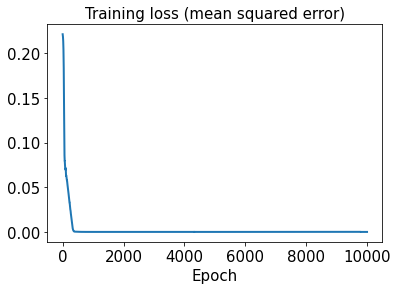

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

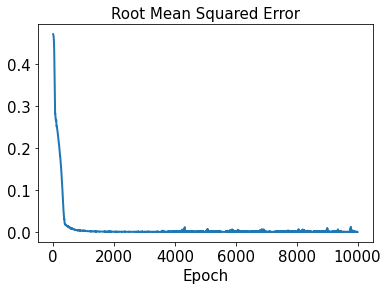

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
test_results1 = sd1.evaluate(t_test)

1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - rmse: 0.0000e+00


In [25]:
decoded_train1 = sd1.predict(t_train)

In [26]:
decoded_test1 = sd1.predict(t_test)

In [27]:
error_train_abs1 = np.abs(decoded_train1 - y_train1)

In [28]:
error_test_abs1 = np.abs(decoded_test1 - y_test1)

In [29]:
l2_error_train1 = np.sqrt(np.sum((decoded_train1 - y_train1)**2) / np.sum(y_train1**2))
print(l2_error_train1)

0.0011235000842431168


In [30]:
l2_error_test1 = np.sqrt(np.sum((decoded_test1 - y_test1)**2) / np.sum(y_test1**2))
print(l2_error_test1)

0.0018386940918864358


In [31]:
l2_error_train_list1 = []
for i in range(0, len(x_train1)):
    l2_error_train_data1 = np.sqrt(np.sum((decoded_train1[i] - y_train1[i])**2) / np.sum(y_train1[i]**2))
    l2_error_train_list1.append(l2_error_train_data1)
print(l2_error_train_list1)

[0.0004913820080446782, 0.00046147409196622833, 0.0020536752367578386, 0.001310087586451816, 0.001057060222807226, 0.0007084953019438408, 0.0011565795495404553, 0.0020146046855667532, 0.0014060872289384859, 0.002358271192106148, 0.0026199075507931636, 0.0006095651535999677, 0.0019922154306583465, 0.0003607957810037515, 0.0007453987034821203, 0.0008255583529707387, 0.0005649583898925819, 0.0005370630084408688, 0.0005477039169783154, 0.001338286317771137, 0.001806941870513445, 0.0009796574539918032, 0.0017716473203300974, 0.001276240389260033, 0.0024531642803851663, 0.0007854059542016548, 0.0007189905445969032, 0.0013432138671972014, 0.001363573000715374, 0.0007156004989145309, 0.0006315802209512609, 0.0014016572093788519, 0.0025013895041321884]


In [32]:
l2_error_test_list1 = []
for i in range(0, len(x_test1)):
    l2_error_test_data1 = np.sqrt(np.sum((decoded_test1[i] - y_test1[i])**2) / np.sum(y_test1[i]**2))
    l2_error_test_list1.append(l2_error_test_data1)
print(l2_error_test_list1)

[0.0013029168919402167, 0.0012784192136988154, 0.00043269923468534607, 0.0016099268445491082, 0.0009117727884325359, 0.006198447800659402, 0.0016533983278790919, 0.003617526741573538]


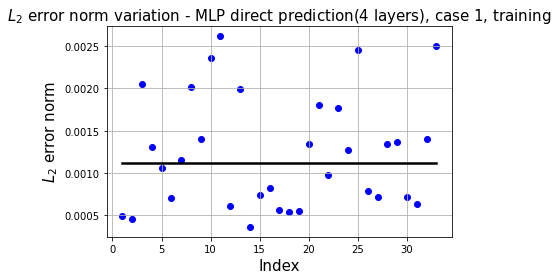

In [107]:
plt.plot(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train1*np.ones(x_train1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(4 layers), case 1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

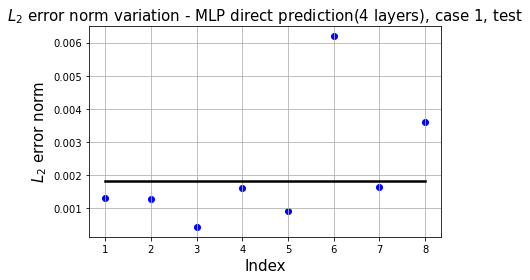

In [108]:
plt.plot(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test1*np.ones(x_test1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(4 layers), case 1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

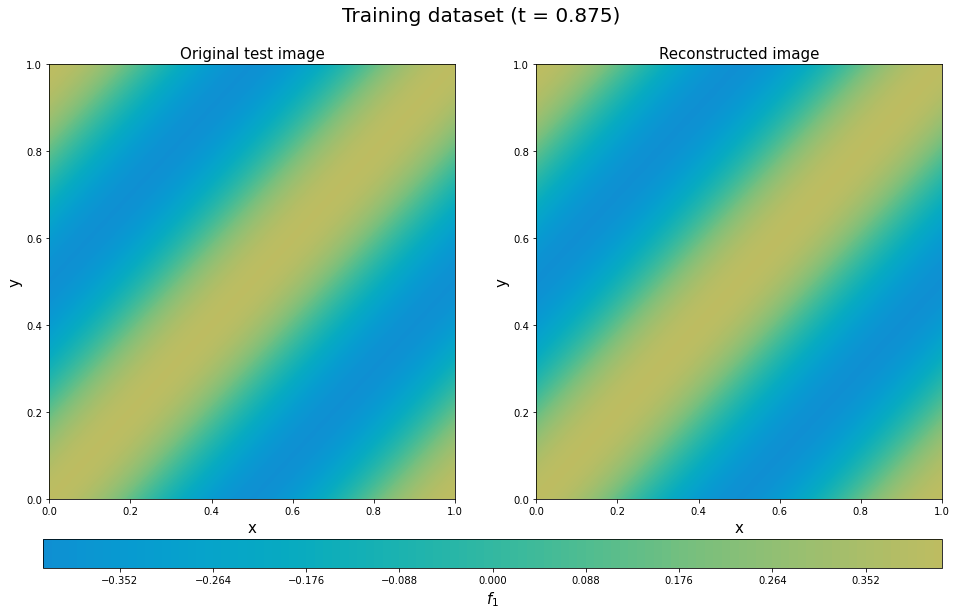

In [35]:
plt.figure(figsize=(16, 8))
y_train1_9_rotate = y_train1[9].T.reshape(101,101)
decoded_rotate1 = decoded_train1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_9_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[35]),fontsize=20)
plt.show()

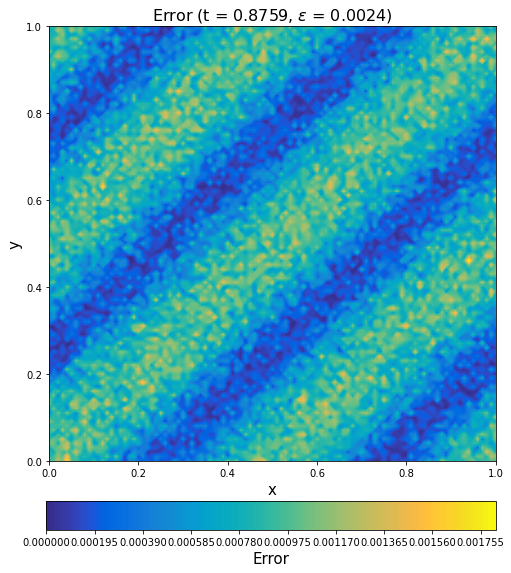

In [36]:
error_train_abs1_rotate9 = error_train_abs1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate9, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.8759, $\epsilon$ = %.4f)' %(l2_error_train_list1[9]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

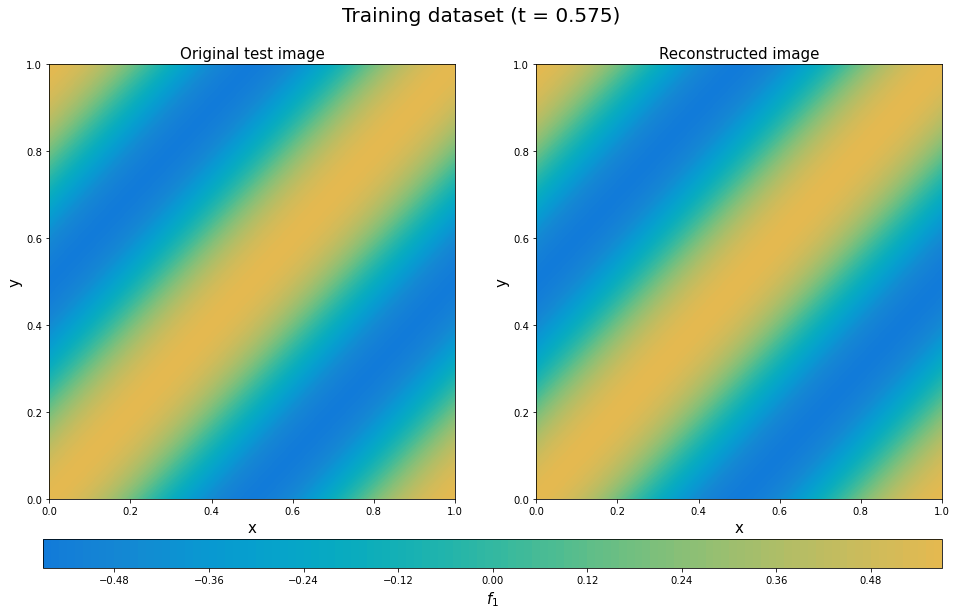

In [37]:
plt.figure(figsize=(16, 8))
y_train1_23_rotate = y_train1[23].T.reshape(101,101)
decoded_rotate1 = decoded_train1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_23_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[23]), fontsize=20)
plt.show()

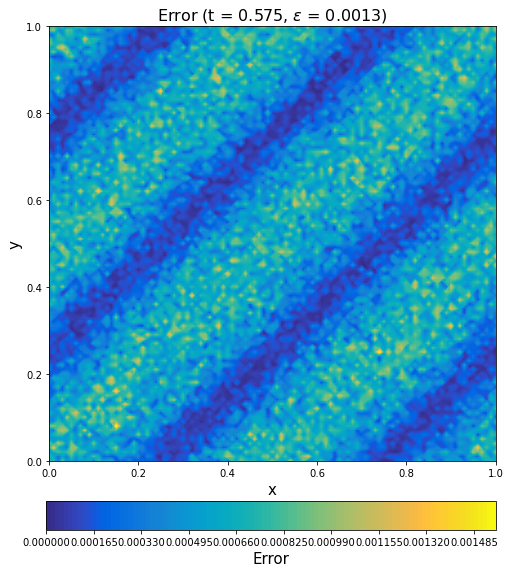

In [38]:
error_train_abs1_rotate23 = error_train_abs1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate23, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.575, $\epsilon$ = %.4f)' %(l2_error_train_list1[23]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

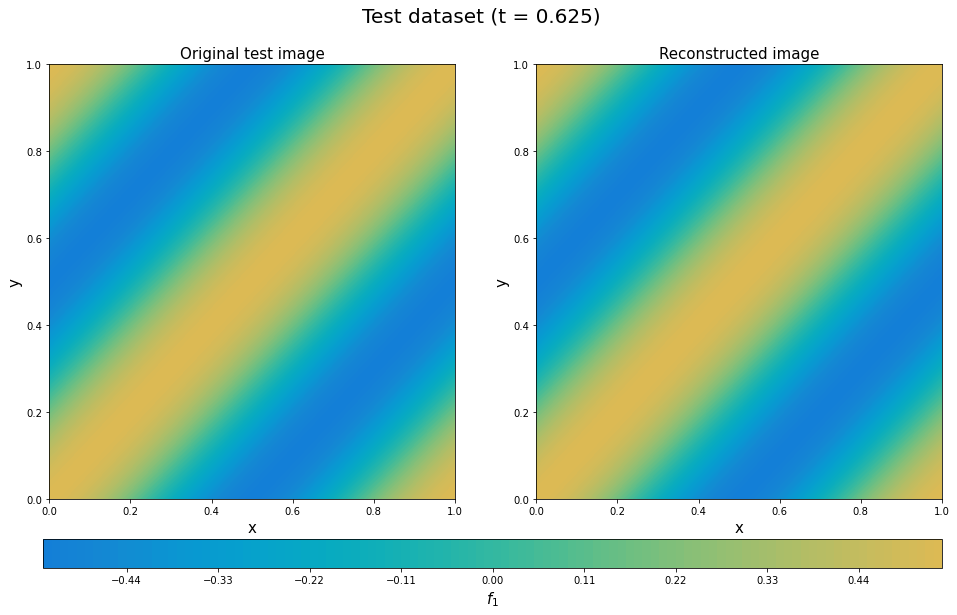

In [39]:
plt.figure(figsize=(16, 8))
y_test1_3_rotate = y_test1[3].T.reshape(101,101)
decoded_rotate1 = decoded_test1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[25]),fontsize=20)
plt.show()

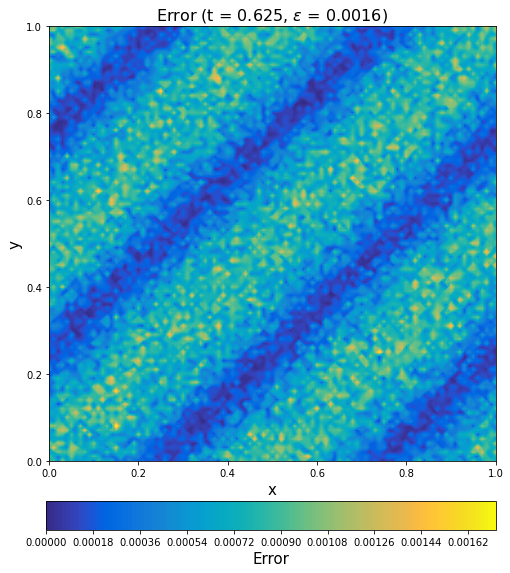

In [40]:
error_test_abs1_rotate3 = error_test_abs1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate3, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.625, $\epsilon$ = %.4f)' %(l2_error_test_list1[3]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

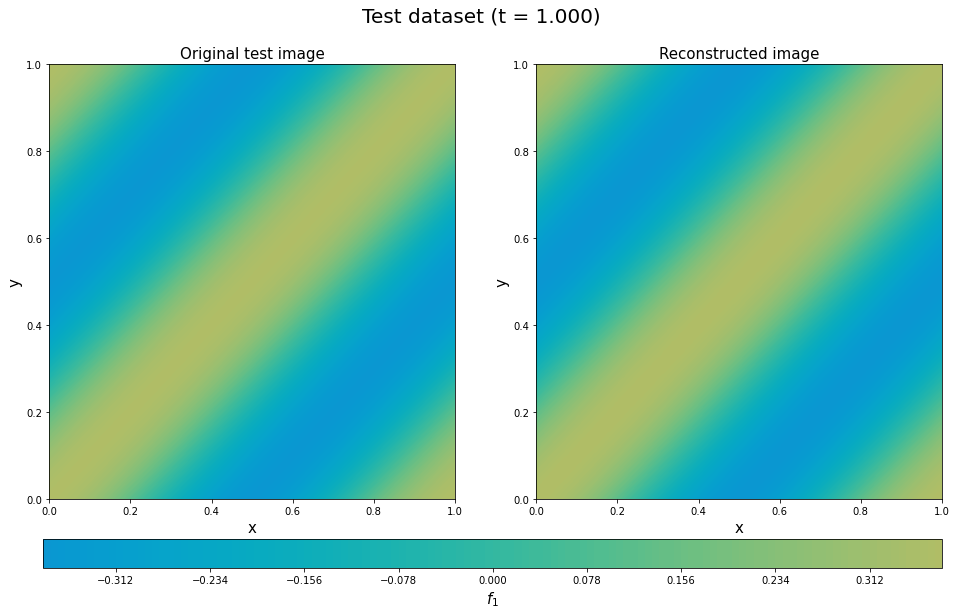

In [41]:
plt.figure(figsize=(16, 8))
y_test1_5_rotate = y_test1[5].T.reshape(101,101)
decoded_rotate1 = decoded_test1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_5_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[40]),fontsize=20)
plt.show()

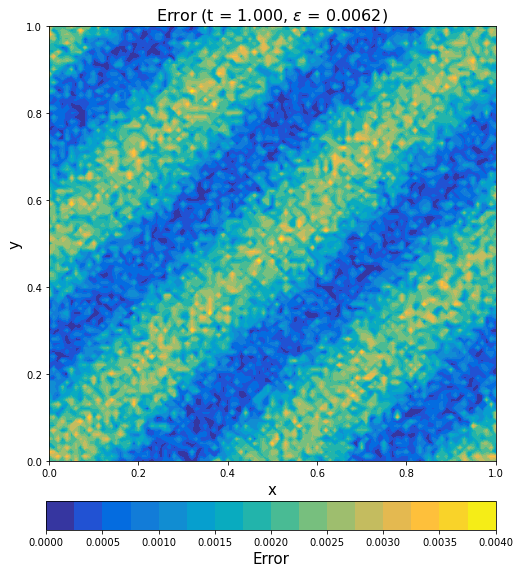

In [42]:
error_test_abs1_rotate5 = error_test_abs1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate5, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 1.000, $\epsilon$ = %.4f)' %(l2_error_test_list1[5]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 2: f2

In [43]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [44]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [45]:
sensor2 = sensor2.reshape((41, 16, 1))

In [46]:
sensor2.shape

(41, 16, 1)

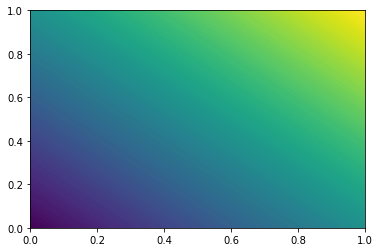

In [47]:
plt.contourf(xmesh, ymesh, out2[0,:,:], levels=128)

In [48]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [49]:
x_train2

array([[[1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945],
        [1.545],
        [1.745],
        [1.945],
        [2.145],
        [1.745],
        [1.945],
        [2.145],
        [2.345]],

       [[0.57 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.77 ]],

       [[1.07 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [2.27 ]],

       [[0.72 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [1.52 ],
        [1.12 ],
        [1.32 ],
        

In [50]:
x_test2

array([[[1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [2.22 ]],

       [[0.745],
        [0.945],
        [1.145],
        [1.345],
        [0.945],
        [1.145],
        [1.345],
        [1.545],
        [1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945]],

       [[0.62 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ]],

       [[1.045],
        [1.245],
        [1.445],
        [1.645],
        [1.245],
        [1.445],
        [1.645],
        [1.845],
        [1.445],
        [1.645],
        

In [51]:
sd2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [52]:
start2 = datetime.datetime.now()
history2 = sd2.fit(t_train, y_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.6987 - rmse: 1.6428
Epoch 2/10000
2/2 [==============================] - 0s 54ms/step - loss: 2.6694 - rmse: 1.6338
Epoch 3/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.6428 - rmse: 1.6257
Epoch 4/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6187 - rmse: 1.6182
Epoch 5/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5967 - rmse: 1.6114
Epoch 6/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5769 - rmse: 1.6053
Epoch 7/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5591 - rmse: 1.5997
Epoch 8/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5426 - rmse: 1.5946
Epoch 9/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5275 - rmse: 1.5898
Epoch 10/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5134 - rmse: 1.5854
Epoch 11/10000
2/2 [==========================

2/2 [==============================] - 0s 6ms/step - loss: 0.6961 - rmse: 0.8343
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6627 - rmse: 0.8141
Epoch 88/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6295 - rmse: 0.7934
Epoch 89/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5967 - rmse: 0.7724
Epoch 90/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5653 - rmse: 0.7519
Epoch 91/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5343 - rmse: 0.7309
Epoch 92/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5045 - rmse: 0.7103
Epoch 93/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4753 - rmse: 0.6894
Epoch 94/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4476 - rmse: 0.6690
Epoch 95/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4205 - rmse: 0.6484
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 6ms/step - loss: 0.0079 - rmse: 0.0891
Epoch 171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0891
Epoch 172/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0079 - rmse: 0.0890
Epoch 173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0887
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0882
Epoch 175/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0077 - rmse: 0.0879
Epoch 176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0077 - rmse: 0.0879
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0881
Epoch 178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0078 - rmse: 0.0882
Epoch 179/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0880
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 255/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 258/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 263/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0815
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0798
Epoch 339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0796
Epoch 340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0796
Epoch 341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0796
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0796
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 425/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0783
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0786
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0789
Epoch 428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0793
Epoch 430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 431/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0789
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 508/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 511/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0765
Epoch 512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0765
Epoch 513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0765
Epoch 514/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0058 - rmse: 0.0765
Epoch 515/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 595/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0751
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0751
Epoch 597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0751
Epoch 598/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0737
Epoch 677/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 680/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 683/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0737
Epoch 764/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0737
Epoch 765/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 766/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 767/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0704
Epoch 844/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0703
Epoch 845/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0703
Epoch 846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0703
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0702
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0702
Epoch 849/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0702
Epoch 850/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0702
Epoch 851/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0701
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 929/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 932/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0681
Epoch 933/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 935/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0682
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0666
Epoch 1011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 1012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 1013/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 1015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 1016/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0658
Epoch 1017/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 1018/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 1019/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 1094/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0627
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 1097/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0628
Epoch 1098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 1099/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 1100/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 1101/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 1177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 1178/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 1180/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 1181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 1183/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 1184/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 1185/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 1260/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 1261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 1263/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 1264/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 1265/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 1267/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 1268/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0405
Epoch 1344/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 1345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 1349/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 1350/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 9.1952e-04 - rmse: 0.0303
Epoch 1426/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1425e-04 - rmse: 0.0302
Epoch 1427/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0634e-04 - rmse: 0.0301
Epoch 1428/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9895e-04 - rmse: 0.0300
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9200e-04 - rmse: 0.0299
Epoch 1430/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.8436e-04 - rmse: 0.0297
Epoch 1431/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.8458e-04 - rmse: 0.0297
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8089e-04 - rmse: 0.0297
Epoch 1433/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6868e-04 - rmse: 0.0295
Epoch 1434/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5230e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 3.8740e-04 - rmse: 0.0197
Epoch 1506/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8120e-04 - rmse: 0.0195
Epoch 1507/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7406e-04 - rmse: 0.0193
Epoch 1508/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7034e-04 - rmse: 0.0192
Epoch 1509/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6832e-04 - rmse: 0.0192
Epoch 1510/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6492e-04 - rmse: 0.0191
Epoch 1511/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6172e-04 - rmse: 0.0190
Epoch 1512/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5778e-04 - rmse: 0.0189
Epoch 1513/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5137e-04 - rmse: 0.0187
Epoch 1514/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4523e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.4163e-04 - rmse: 0.0119
Epoch 1586/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3917e-04 - rmse: 0.0118
Epoch 1587/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3915e-04 - rmse: 0.0118
Epoch 1588/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3986e-04 - rmse: 0.0118
Epoch 1589/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4057e-04 - rmse: 0.0119
Epoch 1590/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4281e-04 - rmse: 0.0120
Epoch 1591/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4271e-04 - rmse: 0.0119
Epoch 1592/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3894e-04 - rmse: 0.0118
Epoch 1593/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3317e-04 - rmse: 0.0115
Epoch 1594/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2793e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 5.5473e-05 - rmse: 0.0074
Epoch 1666/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5013e-05 - rmse: 0.0074
Epoch 1667/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4659e-05 - rmse: 0.0074
Epoch 1668/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4550e-05 - rmse: 0.0074
Epoch 1669/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5424e-05 - rmse: 0.0074
Epoch 1670/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6698e-05 - rmse: 0.0075
Epoch 1671/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6976e-05 - rmse: 0.0075
Epoch 1672/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7073e-05 - rmse: 0.0076
Epoch 1673/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7289e-05 - rmse: 0.0076
Epoch 1674/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7108e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 2.3896e-05 - rmse: 0.0049
Epoch 1746/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3244e-05 - rmse: 0.0048
Epoch 1747/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2831e-05 - rmse: 0.0048
Epoch 1748/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2396e-05 - rmse: 0.0047
Epoch 1749/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2109e-05 - rmse: 0.0047
Epoch 1750/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1948e-05 - rmse: 0.0047
Epoch 1751/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1715e-05 - rmse: 0.0047
Epoch 1752/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1533e-05 - rmse: 0.0046
Epoch 1753/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1791e-05 - rmse: 0.0047
Epoch 1754/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2394e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.0848e-05 - rmse: 0.0033
Epoch 1826/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0900e-05 - rmse: 0.0033
Epoch 1827/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0979e-05 - rmse: 0.0033
Epoch 1828/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1195e-05 - rmse: 0.0033
Epoch 1829/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1476e-05 - rmse: 0.0034
Epoch 1830/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1514e-05 - rmse: 0.0034
Epoch 1831/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1368e-05 - rmse: 0.0034
Epoch 1832/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1137e-05 - rmse: 0.0033
Epoch 1833/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0793e-05 - rmse: 0.0033
Epoch 1834/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0438e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.9630e-06 - rmse: 0.0024
Epoch 1906/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8371e-06 - rmse: 0.0024
Epoch 1907/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6938e-06 - rmse: 0.0024
Epoch 1908/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7432e-06 - rmse: 0.0024
Epoch 1909/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7681e-06 - rmse: 0.0024
Epoch 1910/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6189e-06 - rmse: 0.0024
Epoch 1911/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4758e-06 - rmse: 0.0023
Epoch 1912/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5732e-06 - rmse: 0.0024
Epoch 1913/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5266e-06 - rmse: 0.0024
Epoch 1914/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2537e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.7940e-06 - rmse: 0.0017
Epoch 1986/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7680e-06 - rmse: 0.0017
Epoch 1987/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7606e-06 - rmse: 0.0017
Epoch 1988/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7649e-06 - rmse: 0.0017
Epoch 1989/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7394e-06 - rmse: 0.0017
Epoch 1990/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7122e-06 - rmse: 0.0016
Epoch 1991/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7015e-06 - rmse: 0.0016
Epoch 1992/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6909e-06 - rmse: 0.0016
Epoch 1993/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6088e-06 - rmse: 0.0016
Epoch 1994/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6113e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.3525e-06 - rmse: 0.0012
Epoch 2066/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3385e-06 - rmse: 0.0012
Epoch 2067/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3287e-06 - rmse: 0.0012
Epoch 2068/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3149e-06 - rmse: 0.0011
Epoch 2069/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3043e-06 - rmse: 0.0011
Epoch 2070/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4176e-06 - rmse: 0.0012
Epoch 2071/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4468e-06 - rmse: 0.0012
Epoch 2072/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3936e-06 - rmse: 0.0012
Epoch 2073/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5223e-06 - rmse: 0.0012
Epoch 2074/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3370e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 7.4023e-07 - rmse: 8.6037e-04
Epoch 2144/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3882e-07 - rmse: 8.5955e-04
Epoch 2145/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.6728e-07 - rmse: 8.7594e-04
Epoch 2146/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.9665e-07 - rmse: 8.9255e-04
Epoch 2147/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.7561e-07 - rmse: 8.8069e-04
Epoch 2148/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2310e-07 - rmse: 8.5035e-04
Epoch 2149/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9130e-07 - rmse: 8.3145e-04
Epoch 2150/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8013e-07 - rmse: 8.2470e-04
Epoch 2151/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8932e-07 - rmse: 8.3025e-04
Epoch 2152/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 5ms/step - loss: 4.1096e-07 - rmse: 6.4106e-04
Epoch 2221/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1199e-07 - rmse: 6.4186e-04
Epoch 2222/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0882e-07 - rmse: 6.3939e-04
Epoch 2223/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0413e-07 - rmse: 6.3571e-04
Epoch 2224/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9893e-07 - rmse: 6.3161e-04
Epoch 2225/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9684e-07 - rmse: 6.2996e-04
Epoch 2226/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9606e-07 - rmse: 6.2933e-04
Epoch 2227/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0009e-07 - rmse: 6.3253e-04
Epoch 2228/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0287e-07 - rmse: 6.3472e-04
Epoch 2229/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.7701e-07 - rmse: 5.2631e-04
Epoch 2298/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7473e-07 - rmse: 5.2415e-04
Epoch 2299/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7780e-07 - rmse: 5.2706e-04
Epoch 2300/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8620e-07 - rmse: 5.3497e-04
Epoch 2301/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8395e-07 - rmse: 5.3287e-04
Epoch 2302/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7463e-07 - rmse: 5.2405e-04
Epoch 2303/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6755e-07 - rmse: 5.1725e-04
Epoch 2304/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6059e-07 - rmse: 5.1048e-04
Epoch 2305/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6013e-07 - rmse: 5.1003e-04
Epoch 2306/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 5ms/step - loss: 2.0554e-07 - rmse: 4.5336e-04
Epoch 2375/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0702e-07 - rmse: 4.5500e-04
Epoch 2376/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1267e-07 - rmse: 4.6116e-04
Epoch 2377/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1146e-07 - rmse: 4.5985e-04
Epoch 2378/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0456e-07 - rmse: 4.5229e-04
Epoch 2379/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0605e-07 - rmse: 4.5393e-04
Epoch 2380/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1121e-07 - rmse: 4.5957e-04
Epoch 2381/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1158e-07 - rmse: 4.5998e-04
Epoch 2382/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0928e-07 - rmse: 4.5747e-04
Epoch 2383/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.0434e-07 - rmse: 4.5203e-04
Epoch 2452/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2259e-07 - rmse: 4.7179e-04
Epoch 2453/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0563e-07 - rmse: 4.5347e-04
Epoch 2454/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9271e-07 - rmse: 4.3898e-04
Epoch 2455/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7629e-07 - rmse: 4.1987e-04
Epoch 2456/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9297e-07 - rmse: 4.3928e-04
Epoch 2457/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6334e-07 - rmse: 5.1317e-04
Epoch 2458/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0446e-07 - rmse: 5.5178e-04
Epoch 2459/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8418e-07 - rmse: 5.3309e-04
Epoch 2460/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.9531e-07 - rmse: 4.4194e-04
Epoch 2529/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1920e-07 - rmse: 4.6819e-04
Epoch 2530/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5296e-07 - rmse: 5.0296e-04
Epoch 2531/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1482e-07 - rmse: 4.6348e-04
Epoch 2532/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7442e-07 - rmse: 4.1764e-04
Epoch 2533/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6798e-07 - rmse: 4.0986e-04
Epoch 2534/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6106e-07 - rmse: 4.0132e-04
Epoch 2535/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6254e-07 - rmse: 4.0316e-04
Epoch 2536/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5193e-07 - rmse: 3.8978e-04
Epoch 2537/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.4353e-07 - rmse: 3.7885e-04
Epoch 2606/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3699e-07 - rmse: 3.7013e-04
Epoch 2607/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3675e-07 - rmse: 3.6979e-04
Epoch 2608/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3705e-07 - rmse: 3.7020e-04
Epoch 2609/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3490e-07 - rmse: 3.6728e-04
Epoch 2610/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3534e-07 - rmse: 3.6788e-04
Epoch 2611/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3825e-07 - rmse: 3.7182e-04
Epoch 2612/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4109e-07 - rmse: 3.7562e-04
Epoch 2613/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4463e-07 - rmse: 3.8031e-04
Epoch 2614/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.2419e-07 - rmse: 3.5241e-04
Epoch 2683/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2775e-07 - rmse: 3.5743e-04
Epoch 2684/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3306e-07 - rmse: 3.6477e-04
Epoch 2685/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3122e-07 - rmse: 3.6225e-04
Epoch 2686/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3425e-07 - rmse: 3.6640e-04
Epoch 2687/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2626e-07 - rmse: 3.5533e-04
Epoch 2688/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2804e-07 - rmse: 3.5782e-04
Epoch 2689/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2597e-07 - rmse: 3.5493e-04
Epoch 2690/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3127e-07 - rmse: 3.6231e-04
Epoch 2691/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 1.4311e-07 - rmse: 3.7830e-04
Epoch 2760/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3445e-07 - rmse: 3.6668e-04
Epoch 2761/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2961e-07 - rmse: 3.6001e-04
Epoch 2762/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2170e-07 - rmse: 3.4886e-04
Epoch 2763/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2253e-07 - rmse: 3.5004e-04
Epoch 2764/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2055e-07 - rmse: 3.4720e-04
Epoch 2765/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2741e-07 - rmse: 3.5694e-04
Epoch 2766/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2433e-07 - rmse: 3.5260e-04
Epoch 2767/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2997e-07 - rmse: 3.6052e-04
Epoch 2768/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 5ms/step - loss: 1.2221e-07 - rmse: 3.4959e-04
Epoch 2837/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3566e-07 - rmse: 3.6832e-04
Epoch 2838/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4630e-07 - rmse: 3.8249e-04
Epoch 2839/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2983e-07 - rmse: 3.6032e-04
Epoch 2840/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2546e-07 - rmse: 3.5421e-04
Epoch 2841/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2689e-07 - rmse: 3.5621e-04
Epoch 2842/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2997e-07 - rmse: 3.6051e-04
Epoch 2843/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2807e-07 - rmse: 3.5786e-04
Epoch 2844/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2635e-07 - rmse: 3.5546e-04
Epoch 2845/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 5ms/step - loss: 1.3005e-07 - rmse: 3.6062e-04
Epoch 2914/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5755e-07 - rmse: 3.9692e-04
Epoch 2915/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1425e-07 - rmse: 3.3800e-04
Epoch 2916/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3536e-07 - rmse: 3.6792e-04
Epoch 2917/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1439e-07 - rmse: 3.3821e-04
Epoch 2918/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1331e-07 - rmse: 3.3661e-04
Epoch 2919/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1426e-07 - rmse: 3.3802e-04
Epoch 2920/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0824e-07 - rmse: 3.2900e-04
Epoch 2921/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8238e-07 - rmse: 4.2706e-04
Epoch 2922/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 5ms/step - loss: 1.3288e-07 - rmse: 3.6453e-04
Epoch 2991/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3452e-07 - rmse: 3.6677e-04
Epoch 2992/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6471e-07 - rmse: 4.0585e-04
Epoch 2993/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2152e-07 - rmse: 3.4860e-04
Epoch 2994/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5312e-07 - rmse: 3.9130e-04
Epoch 2995/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2094e-07 - rmse: 3.4777e-04
Epoch 2996/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3314e-07 - rmse: 3.6488e-04
Epoch 2997/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2537e-07 - rmse: 3.5407e-04
Epoch 2998/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0646e-07 - rmse: 3.2628e-04
Epoch 2999/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 6ms/step - loss: 1.0286e-07 - rmse: 3.2071e-04
Epoch 3068/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0760e-07 - rmse: 3.2803e-04
Epoch 3069/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0490e-07 - rmse: 3.2389e-04
Epoch 3070/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0570e-07 - rmse: 3.2511e-04
Epoch 3071/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0169e-07 - rmse: 3.1890e-04
Epoch 3072/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0031e-07 - rmse: 3.1672e-04
Epoch 3073/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0307e-07 - rmse: 3.2105e-04
Epoch 3074/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0893e-07 - rmse: 3.3005e-04
Epoch 3075/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1240e-07 - rmse: 3.3526e-04
Epoch 3076/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 5ms/step - loss: 1.0527e-07 - rmse: 3.2446e-04
Epoch 3145/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0423e-07 - rmse: 3.2284e-04
Epoch 3146/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1174e-07 - rmse: 3.3428e-04
Epoch 3147/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1860e-07 - rmse: 3.4439e-04
Epoch 3148/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1267e-07 - rmse: 3.3567e-04
Epoch 3149/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1556e-07 - rmse: 3.3994e-04
Epoch 3150/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1811e-07 - rmse: 3.4367e-04
Epoch 3151/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0735e-07 - rmse: 3.2764e-04
Epoch 3152/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2816e-07 - rmse: 3.5800e-04
Epoch 3153/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 9.7589e-08 - rmse: 3.1239e-04
Epoch 3222/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7481e-07 - rmse: 6.1221e-04
Epoch 3223/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3092e-07 - rmse: 3.6183e-04
Epoch 3224/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2459e-07 - rmse: 4.7391e-04
Epoch 3225/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1620e-07 - rmse: 4.6497e-04
Epoch 3226/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0918e-07 - rmse: 5.5604e-04
Epoch 3227/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4377e-07 - rmse: 4.9373e-04
Epoch 3228/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7185e-07 - rmse: 6.0980e-04
Epoch 3229/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6172e-07 - rmse: 5.1158e-04
Epoch 3230/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.1216e-07 - rmse: 3.3491e-04
Epoch 3299/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1180e-07 - rmse: 3.3436e-04
Epoch 3300/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5565e-07 - rmse: 3.9452e-04
Epoch 3301/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2859e-07 - rmse: 3.5860e-04
Epoch 3302/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1553e-07 - rmse: 3.3990e-04
Epoch 3303/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2993e-07 - rmse: 3.6046e-04
Epoch 3304/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0124e-07 - rmse: 3.1818e-04
Epoch 3305/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0451e-07 - rmse: 3.2327e-04
Epoch 3306/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1853e-07 - rmse: 3.4428e-04
Epoch 3307/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 6ms/step - loss: 9.9019e-08 - rmse: 3.1467e-04
Epoch 3376/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0309e-07 - rmse: 3.2108e-04
Epoch 3377/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0971e-07 - rmse: 3.3123e-04
Epoch 3378/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9942e-08 - rmse: 3.1614e-04
Epoch 3379/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4456e-07 - rmse: 3.8021e-04
Epoch 3380/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2763e-08 - rmse: 3.0457e-04
Epoch 3381/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0176e-07 - rmse: 3.1900e-04
Epoch 3382/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1441e-07 - rmse: 3.3824e-04
Epoch 3383/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0384e-07 - rmse: 3.2225e-04
Epoch 3384/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 5ms/step - loss: 2.0468e-07 - rmse: 4.5241e-04
Epoch 3453/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8653e-07 - rmse: 4.3190e-04
Epoch 3454/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4545e-07 - rmse: 3.8137e-04
Epoch 3455/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5785e-07 - rmse: 3.9730e-04
Epoch 3456/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4638e-07 - rmse: 3.8260e-04
Epoch 3457/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1993e-07 - rmse: 3.4631e-04
Epoch 3458/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1489e-07 - rmse: 3.3896e-04
Epoch 3459/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6146e-07 - rmse: 4.0182e-04
Epoch 3460/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1212e-07 - rmse: 3.3484e-04
Epoch 3461/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 5ms/step - loss: 1.4543e-07 - rmse: 3.8136e-04
Epoch 3530/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.5429e-08 - rmse: 3.0892e-04
Epoch 3531/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1822e-08 - rmse: 3.0302e-04
Epoch 3532/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2190e-07 - rmse: 3.4915e-04
Epoch 3533/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3516e-07 - rmse: 3.6765e-04
Epoch 3534/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2153e-07 - rmse: 3.4861e-04
Epoch 3535/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0925e-07 - rmse: 3.3052e-04
Epoch 3536/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0872e-08 - rmse: 3.0145e-04
Epoch 3537/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8198e-08 - rmse: 2.9698e-04
Epoch 3538/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 5ms/step - loss: 9.1915e-08 - rmse: 3.0318e-04
Epoch 3607/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0831e-07 - rmse: 3.2910e-04
Epoch 3608/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0559e-08 - rmse: 3.0093e-04
Epoch 3609/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0139e-07 - rmse: 3.1842e-04
Epoch 3610/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5094e-07 - rmse: 3.8850e-04
Epoch 3611/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4691e-07 - rmse: 3.8329e-04
Epoch 3612/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0363e-07 - rmse: 3.2191e-04
Epoch 3613/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4437e-07 - rmse: 3.7996e-04
Epoch 3614/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3498e-07 - rmse: 3.6739e-04
Epoch 3615/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.0575e-07 - rmse: 3.2519e-04
Epoch 3684/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6370e-07 - rmse: 4.0460e-04
Epoch 3685/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8712e-08 - rmse: 3.1419e-04
Epoch 3686/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3868e-07 - rmse: 3.7240e-04
Epoch 3687/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5067e-07 - rmse: 3.8816e-04
Epoch 3688/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4711e-08 - rmse: 3.0775e-04
Epoch 3689/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3140e-07 - rmse: 3.6249e-04
Epoch 3690/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5259e-07 - rmse: 3.9062e-04
Epoch 3691/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1899e-07 - rmse: 3.4495e-04
Epoch 3692/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.4775e-08 - rmse: 2.7345e-04
Epoch 3761/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.8100e-08 - rmse: 2.7946e-04
Epoch 3762/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.4138e-08 - rmse: 2.9007e-04
Epoch 3763/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.3888e-08 - rmse: 2.8963e-04
Epoch 3764/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9335e-08 - rmse: 2.8167e-04
Epoch 3765/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6701e-08 - rmse: 2.7695e-04
Epoch 3766/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7944e-08 - rmse: 2.7919e-04
Epoch 3767/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.6776e-08 - rmse: 3.1109e-04
Epoch 3768/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7839e-07 - rmse: 4.2236e-04
Epoch 3769/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 5ms/step - loss: 1.7365e-07 - rmse: 4.1672e-04
Epoch 3838/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3807e-07 - rmse: 3.7158e-04
Epoch 3839/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2577e-07 - rmse: 4.7515e-04
Epoch 3840/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1059e-07 - rmse: 4.5890e-04
Epoch 3841/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5067e-07 - rmse: 3.8816e-04
Epoch 3842/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0269e-07 - rmse: 4.5022e-04
Epoch 3843/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2192e-07 - rmse: 4.7109e-04
Epoch 3844/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4050e-07 - rmse: 3.7483e-04
Epoch 3845/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1939e-07 - rmse: 4.6839e-04
Epoch 3846/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 5ms/step - loss: 1.2241e-07 - rmse: 3.4987e-04
Epoch 3915/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0992e-07 - rmse: 3.3155e-04
Epoch 3916/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.7370e-08 - rmse: 2.9558e-04
Epoch 3917/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.4544e-08 - rmse: 3.0748e-04
Epoch 3918/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.6459e-08 - rmse: 2.9404e-04
Epoch 3919/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8139e-08 - rmse: 2.7953e-04
Epoch 3920/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7022e-07 - rmse: 4.1257e-04
Epoch 3921/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1170e-07 - rmse: 4.6011e-04
Epoch 3922/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1969e-07 - rmse: 3.4596e-04
Epoch 3923/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 5ms/step - loss: 8.1284e-08 - rmse: 2.8510e-04
Epoch 3992/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.7468e-08 - rmse: 2.7833e-04
Epoch 3993/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2227e-08 - rmse: 2.6875e-04
Epoch 3994/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9266e-08 - rmse: 2.6318e-04
Epoch 3995/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9131e-08 - rmse: 2.6293e-04
Epoch 3996/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0206e-08 - rmse: 2.6497e-04
Epoch 3997/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9706e-08 - rmse: 2.6402e-04
Epoch 3998/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0257e-08 - rmse: 2.6506e-04
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9919e-08 - rmse: 2.6442e-04
Epoch 4000/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 5ms/step - loss: 9.9742e-08 - rmse: 3.1582e-04
Epoch 4069/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2998e-07 - rmse: 3.6053e-04
Epoch 4070/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8449e-08 - rmse: 2.9740e-04
Epoch 4071/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.4958e-08 - rmse: 2.7378e-04
Epoch 4072/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5027e-07 - rmse: 3.8765e-04
Epoch 4073/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.2901e-08 - rmse: 3.0480e-04
Epoch 4074/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2741e-07 - rmse: 3.5695e-04
Epoch 4075/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2378e-07 - rmse: 3.5182e-04
Epoch 4076/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5939e-07 - rmse: 3.9924e-04
Epoch 4077/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 5ms/step - loss: 3.0125e-06 - rmse: 0.0017
Epoch 4147/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3956e-06 - rmse: 0.0018
Epoch 4148/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9446e-07 - rmse: 8.9132e-04
Epoch 4149/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2505e-06 - rmse: 0.0015
Epoch 4150/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8868e-06 - rmse: 0.0014
Epoch 4151/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5559e-07 - rmse: 5.0555e-04
Epoch 4152/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3983e-07 - rmse: 5.8295e-04
Epoch 4153/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3108e-07 - rmse: 5.7540e-04
Epoch 4154/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0355e-07 - rmse: 6.3526e-04
Epoch 4155/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0

2/2 [==============================] - 0s 4ms/step - loss: 1.2197e-07 - rmse: 3.4924e-04
Epoch 4224/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1065e-08 - rmse: 3.0177e-04
Epoch 4225/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1367e-07 - rmse: 3.3716e-04
Epoch 4226/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0709e-07 - rmse: 3.2724e-04
Epoch 4227/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2266e-07 - rmse: 3.5022e-04
Epoch 4228/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5724e-07 - rmse: 3.9654e-04
Epoch 4229/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0681e-07 - rmse: 3.2682e-04
Epoch 4230/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7291e-07 - rmse: 4.1583e-04
Epoch 4231/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4415e-07 - rmse: 3.7968e-04
Epoch 4232/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 6.9006e-08 - rmse: 2.6269e-04
Epoch 4301/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6955e-08 - rmse: 2.5876e-04
Epoch 4302/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5395e-07 - rmse: 3.9236e-04
Epoch 4303/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1816e-07 - rmse: 4.6708e-04
Epoch 4304/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9136e-08 - rmse: 3.1486e-04
Epoch 4305/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4451e-07 - rmse: 5.8695e-04
Epoch 4306/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0213e-07 - rmse: 3.1957e-04
Epoch 4307/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4205e-07 - rmse: 5.8485e-04
Epoch 4308/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6659e-07 - rmse: 8.1645e-04
Epoch 4309/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 6ms/step - loss: 1.6043e-06 - rmse: 0.0013
Epoch 4379/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8374e-07 - rmse: 9.4007e-04
Epoch 4380/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7257e-06 - rmse: 0.0013
Epoch 4381/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0211e-06 - rmse: 0.0014
Epoch 4382/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1204e-06 - rmse: 0.0015
Epoch 4383/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2847e-06 - rmse: 0.0015
Epoch 4384/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0432e-06 - rmse: 0.0014
Epoch 4385/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8353e-07 - rmse: 6.1930e-04
Epoch 4386/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3453e-07 - rmse: 8.5705e-04
Epoch 4387/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9137e-07 

2/2 [==============================] - 0s 4ms/step - loss: 6.5372e-08 - rmse: 2.5568e-04
Epoch 4458/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2140e-07 - rmse: 3.4842e-04
Epoch 4459/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.8537e-08 - rmse: 3.1391e-04
Epoch 4460/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3266e-07 - rmse: 3.6423e-04
Epoch 4461/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1337e-07 - rmse: 3.3671e-04
Epoch 4462/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3961e-07 - rmse: 3.7364e-04
Epoch 4463/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5009e-07 - rmse: 5.0009e-04
Epoch 4464/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0712e-07 - rmse: 4.5510e-04
Epoch 4465/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4413e-07 - rmse: 3.7965e-04
Epoch 4466/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.5528e-08 - rmse: 2.7482e-04
Epoch 4535/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9374e-08 - rmse: 2.8173e-04
Epoch 4536/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9307e-08 - rmse: 2.6326e-04
Epoch 4537/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9495e-08 - rmse: 2.4392e-04
Epoch 4538/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4848e-08 - rmse: 2.3420e-04
Epoch 4539/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4670e-08 - rmse: 2.3382e-04
Epoch 4540/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5625e-08 - rmse: 2.3585e-04
Epoch 4541/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8954e-08 - rmse: 2.4280e-04
Epoch 4542/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6886e-08 - rmse: 2.3851e-04
Epoch 4543/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.0956e-07 - rmse: 7.8074e-04
Epoch 4612/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1743e-07 - rmse: 3.4268e-04
Epoch 4613/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0128e-06 - rmse: 0.0010
Epoch 4614/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4596e-07 - rmse: 8.0372e-04
Epoch 4615/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5336e-06 - rmse: 0.0012
Epoch 4616/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6463e-06 - rmse: 0.0013
Epoch 4617/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1381e-07 - rmse: 7.8346e-04
Epoch 4618/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0978e-07 - rmse: 7.1399e-04
Epoch 4619/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7849e-07 - rmse: 8.2371e-04
Epoch 4620/10000
2/2 [==============================] - 0s 5ms/step - loss:

2/2 [==============================] - 0s 5ms/step - loss: 1.5128e-05 - rmse: 0.0039
Epoch 4690/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2153e-07 - rmse: 3.4861e-04
Epoch 4691/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8168e-06 - rmse: 0.0017
Epoch 4692/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5196e-06 - rmse: 0.0012
Epoch 4693/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2176e-06 - rmse: 0.0021
Epoch 4694/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2959e-06 - rmse: 0.0015
Epoch 4695/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0945e-06 - rmse: 0.0018
Epoch 4696/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8194e-05 - rmse: 0.0043
Epoch 4697/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4954e-05 - rmse: 0.0039
Epoch 4698/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5324e-06 - rmse: 

Epoch 4767/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2014e-08 - rmse: 2.2807e-04
Epoch 4768/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5192e-08 - rmse: 2.5533e-04
Epoch 4769/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2595e-08 - rmse: 2.2934e-04
Epoch 4770/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0836e-08 - rmse: 2.2547e-04
Epoch 4771/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2599e-08 - rmse: 2.2934e-04
Epoch 4772/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8070e-08 - rmse: 2.4098e-04
Epoch 4773/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2876e-08 - rmse: 2.2995e-04
Epoch 4774/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8660e-07 - rmse: 4.3198e-04
Epoch 4775/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7382e-07 - rmse: 4.1692e-04
Epoch 4776/10000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 1.1051e-06 - rmse: 0.0011
Epoch 4846/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9013e-08 - rmse: 2.2139e-04
Epoch 4847/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7286e-07 - rmse: 5.2236e-04
Epoch 4848/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6166e-07 - rmse: 5.1153e-04
Epoch 4849/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4682e-07 - rmse: 6.6844e-04
Epoch 4850/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0644e-07 - rmse: 5.5357e-04
Epoch 4851/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0955e-06 - rmse: 0.0014
Epoch 4852/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0858e-06 - rmse: 0.0010
Epoch 4853/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7841e-07 - rmse: 9.3724e-04
Epoch 4854/10000
2/2 [==============================] - 0s 4ms/step - loss:

2/2 [==============================] - 0s 7ms/step - loss: 2.0471e-06 - rmse: 0.0014
Epoch 4925/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7462e-05 - rmse: 0.0042
Epoch 4926/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1699e-07 - rmse: 9.0387e-04
Epoch 4927/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6754e-07 - rmse: 6.0625e-04
Epoch 4928/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7153e-05 - rmse: 0.0041
Epoch 4929/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7802e-06 - rmse: 0.0017
Epoch 4930/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.4079e-06 - rmse: 0.0021
Epoch 4931/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0891e-05 - rmse: 0.0033
Epoch 4932/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.7018e-07 - rmse: 8.7760e-04
Epoch 4933/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9852e-06 

2/2 [==============================] - 0s 5ms/step - loss: 9.8917e-07 - rmse: 9.9457e-04
Epoch 5002/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1058e-07 - rmse: 7.1455e-04
Epoch 5003/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2378e-07 - rmse: 7.2372e-04
Epoch 5004/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3841e-07 - rmse: 7.9900e-04
Epoch 5005/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.9842e-07 - rmse: 8.3572e-04
Epoch 5006/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8309e-07 - rmse: 8.8492e-04
Epoch 5007/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.9245e-07 - rmse: 9.4470e-04
Epoch 5008/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.8202e-07 - rmse: 9.3916e-04
Epoch 5009/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3588e-06 - rmse: 0.0012
Epoch 5010/10000
2/2 [==============================] - 0s 6ms/step

2/2 [==============================] - 0s 7ms/step - loss: 4.2538e-08 - rmse: 2.0625e-04
Epoch 5079/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6110e-08 - rmse: 2.1473e-04
Epoch 5080/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8707e-08 - rmse: 1.9674e-04
Epoch 5081/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8407e-08 - rmse: 2.2002e-04
Epoch 5082/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.2883e-08 - rmse: 2.0708e-04
Epoch 5083/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1916e-08 - rmse: 2.0473e-04
Epoch 5084/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0820e-08 - rmse: 2.0204e-04
Epoch 5085/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1208e-08 - rmse: 2.0300e-04
Epoch 5086/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9227e-08 - rmse: 1.9806e-04
Epoch 5087/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 6ms/step - loss: 6.2011e-07 - rmse: 7.8747e-04
Epoch 5156/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4659e-07 - rmse: 3.8287e-04
Epoch 5157/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0976e-06 - rmse: 0.0014
Epoch 5158/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7710e-06 - rmse: 0.0013
Epoch 5159/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1318e-07 - rmse: 6.4279e-04
Epoch 5160/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4634e-07 - rmse: 3.8255e-04
Epoch 5161/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2399e-07 - rmse: 3.5213e-04
Epoch 5162/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3613e-07 - rmse: 3.6896e-04
Epoch 5163/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3942e-07 - rmse: 4.8930e-04
Epoch 5164/10000
2/2 [==============================] - 0s 7ms/step - l

2/2 [==============================] - 0s 6ms/step - loss: 2.3791e-06 - rmse: 0.0015
Epoch 5234/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0636e-06 - rmse: 0.0018
Epoch 5235/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3032e-06 - rmse: 0.0011
Epoch 5236/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.9460e-06 - rmse: 0.0032
Epoch 5237/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.2664e-06 - rmse: 0.0027
Epoch 5238/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1956e-06 - rmse: 0.0027
Epoch 5239/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9086e-06 - rmse: 0.0014
Epoch 5240/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1792e-06 - rmse: 0.0020
Epoch 5241/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2562e-06 - rmse: 0.0011
Epoch 5242/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2712e-06 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 5.0392e-07 - rmse: 7.0987e-04
Epoch 5313/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8062e-07 - rmse: 7.6199e-04
Epoch 5314/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4948e-06 - rmse: 0.0012
Epoch 5315/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7079e-07 - rmse: 6.0892e-04
Epoch 5316/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9018e-07 - rmse: 6.2464e-04
Epoch 5317/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6255e-06 - rmse: 0.0013
Epoch 5318/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7141e-06 - rmse: 0.0013
Epoch 5319/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4470e-07 - rmse: 5.8711e-04
Epoch 5320/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7163e-06 - rmse: 0.0016
Epoch 5321/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0

2/2 [==============================] - 0s 4ms/step - loss: 8.5575e-08 - rmse: 2.9253e-04
Epoch 5391/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4690e-08 - rmse: 2.3386e-04
Epoch 5392/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.5786e-08 - rmse: 2.5649e-04
Epoch 5393/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8729e-08 - rmse: 2.2075e-04
Epoch 5394/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3161e-07 - rmse: 3.6278e-04
Epoch 5395/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6742e-08 - rmse: 3.1103e-04
Epoch 5396/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0405e-08 - rmse: 3.0067e-04
Epoch 5397/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4161e-08 - rmse: 2.7233e-04
Epoch 5398/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1169e-07 - rmse: 3.3420e-04
Epoch 5399/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 3ms/step - loss: 3.6343e-07 - rmse: 6.0285e-04
Epoch 5468/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7765e-07 - rmse: 5.2692e-04
Epoch 5469/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0504e-07 - rmse: 4.5281e-04
Epoch 5470/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4484e-08 - rmse: 2.5394e-04
Epoch 5471/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1984e-07 - rmse: 4.6887e-04
Epoch 5472/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0619e-07 - rmse: 3.2587e-04
Epoch 5473/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1788e-07 - rmse: 3.4333e-04
Epoch 5474/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9612e-08 - rmse: 2.2274e-04
Epoch 5475/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2908e-08 - rmse: 2.0714e-04
Epoch 5476/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.5057e-08 - rmse: 1.8724e-04
Epoch 5545/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0820e-08 - rmse: 1.7556e-04
Epoch 5546/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.2517e-08 - rmse: 1.8032e-04
Epoch 5547/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1746e-08 - rmse: 1.7818e-04
Epoch 5548/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6334e-08 - rmse: 1.9062e-04
Epoch 5549/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1839e-08 - rmse: 2.0454e-04
Epoch 5550/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1773e-08 - rmse: 1.7825e-04
Epoch 5551/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6094e-08 - rmse: 1.8999e-04
Epoch 5552/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7358e-08 - rmse: 1.9328e-04
Epoch 5553/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.6710e-08 - rmse: 2.5828e-04
Epoch 5622/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0436e-08 - rmse: 2.0109e-04
Epoch 5623/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1739e-08 - rmse: 2.0430e-04
Epoch 5624/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0841e-08 - rmse: 2.2548e-04
Epoch 5625/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6194e-08 - rmse: 2.1493e-04
Epoch 5626/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5304e-08 - rmse: 2.3517e-04
Epoch 5627/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0099e-08 - rmse: 2.0025e-04
Epoch 5628/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6837e-08 - rmse: 1.9193e-04
Epoch 5629/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1735e-08 - rmse: 2.4847e-04
Epoch 5630/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 3.7231e-08 - rmse: 1.9295e-04
Epoch 5699/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3942e-08 - rmse: 1.8423e-04
Epoch 5700/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1148e-08 - rmse: 1.7649e-04
Epoch 5701/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6322e-07 - rmse: 4.0400e-04
Epoch 5702/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8053e-07 - rmse: 5.2965e-04
Epoch 5703/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2593e-08 - rmse: 2.5019e-04
Epoch 5704/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0973e-07 - rmse: 3.3126e-04
Epoch 5705/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8170e-08 - rmse: 2.9693e-04
Epoch 5706/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2775e-08 - rmse: 2.0682e-04
Epoch 5707/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 5ms/step - loss: 1.8124e-07 - rmse: 4.2572e-04
Epoch 5776/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4994e-08 - rmse: 2.1212e-04
Epoch 5777/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5461e-07 - rmse: 3.9321e-04
Epoch 5778/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4517e-08 - rmse: 1.8579e-04
Epoch 5779/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3508e-08 - rmse: 2.3132e-04
Epoch 5780/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9637e-08 - rmse: 2.4421e-04
Epoch 5781/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7788e-08 - rmse: 1.9439e-04
Epoch 5782/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0165e-08 - rmse: 2.2398e-04
Epoch 5783/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0789e-08 - rmse: 2.2536e-04
Epoch 5784/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 5ms/step - loss: 1.9298e-07 - rmse: 4.3930e-04
Epoch 5853/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3115e-07 - rmse: 3.6215e-04
Epoch 5854/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7038e-07 - rmse: 4.1278e-04
Epoch 5855/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4047e-08 - rmse: 2.5307e-04
Epoch 5856/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3336e-08 - rmse: 2.3094e-04
Epoch 5857/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8295e-07 - rmse: 4.2772e-04
Epoch 5858/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1177e-07 - rmse: 3.3432e-04
Epoch 5859/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4642e-07 - rmse: 3.8265e-04
Epoch 5860/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5512e-07 - rmse: 3.9385e-04
Epoch 5861/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.2859e-08 - rmse: 2.2991e-04
Epoch 5930/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5355e-08 - rmse: 1.8803e-04
Epoch 5931/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7757e-08 - rmse: 1.9431e-04
Epoch 5932/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3784e-08 - rmse: 2.0925e-04
Epoch 5933/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.2027e-08 - rmse: 2.0501e-04
Epoch 5934/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1434e-08 - rmse: 2.2679e-04
Epoch 5935/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2358e-08 - rmse: 2.0581e-04
Epoch 5936/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2624e-08 - rmse: 2.2940e-04
Epoch 5937/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.5067e-08 - rmse: 2.1229e-04
Epoch 5938/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 8ms/step - loss: 2.5140e-08 - rmse: 1.5856e-04
Epoch 6007/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7492e-08 - rmse: 2.7837e-04
Epoch 6008/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7927e-08 - rmse: 2.1892e-04
Epoch 6009/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4394e-08 - rmse: 1.8546e-04
Epoch 6010/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.3314e-08 - rmse: 1.8252e-04
Epoch 6011/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6030e-08 - rmse: 2.1455e-04
Epoch 6012/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9908e-08 - rmse: 1.7294e-04
Epoch 6013/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1947e-08 - rmse: 2.6823e-04
Epoch 6014/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6396e-08 - rmse: 2.1540e-04
Epoch 6015/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 5ms/step - loss: 1.3889e-07 - rmse: 3.7268e-04
Epoch 6084/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0504e-07 - rmse: 3.2409e-04
Epoch 6085/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4921e-07 - rmse: 3.8627e-04
Epoch 6086/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4664e-07 - rmse: 3.8293e-04
Epoch 6087/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3082e-07 - rmse: 4.8044e-04
Epoch 6088/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5596e-07 - rmse: 7.4563e-04
Epoch 6089/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2239e-07 - rmse: 4.7159e-04
Epoch 6090/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7519e-07 - rmse: 7.5841e-04
Epoch 6091/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5438e-07 - rmse: 7.4456e-04
Epoch 6092/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.2797e-07 - rmse: 3.5773e-04
Epoch 6162/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4227e-07 - rmse: 5.8504e-04
Epoch 6163/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4237e-07 - rmse: 3.7732e-04
Epoch 6164/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5988e-07 - rmse: 3.9985e-04
Epoch 6165/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5296e-07 - rmse: 3.9109e-04
Epoch 6166/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8106e-08 - rmse: 2.7947e-04
Epoch 6167/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0756e-07 - rmse: 3.2796e-04
Epoch 6168/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3323e-07 - rmse: 3.6500e-04
Epoch 6169/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1623e-07 - rmse: 4.6501e-04
Epoch 6170/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 5.4225e-08 - rmse: 2.3286e-04
Epoch 6239/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4543e-08 - rmse: 1.8586e-04
Epoch 6240/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1682e-07 - rmse: 7.1890e-04
Epoch 6241/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4333e-08 - rmse: 2.7264e-04
Epoch 6242/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1598e-07 - rmse: 6.4496e-04
Epoch 6243/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2399e-07 - rmse: 5.6920e-04
Epoch 6244/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0139e-07 - rmse: 3.1842e-04
Epoch 6245/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0028e-07 - rmse: 6.3267e-04
Epoch 6246/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0472e-07 - rmse: 3.2360e-04
Epoch 6247/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.4116e-07 - rmse: 3.7571e-04
Epoch 6316/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1551e-07 - rmse: 3.3987e-04
Epoch 6317/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3331e-07 - rmse: 4.8302e-04
Epoch 6318/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1374e-07 - rmse: 3.3726e-04
Epoch 6319/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1009e-07 - rmse: 3.3180e-04
Epoch 6320/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1561e-07 - rmse: 4.6433e-04
Epoch 6321/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1815e-07 - rmse: 4.6706e-04
Epoch 6322/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4191e-07 - rmse: 5.8473e-04
Epoch 6323/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6302e-07 - rmse: 7.5034e-04
Epoch 6324/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.5472e-05 - rmse: 0.0039
Epoch 6395/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3825e-05 - rmse: 0.0037
Epoch 6396/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2000e-06 - rmse: 0.0023
Epoch 6397/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2322e-05 - rmse: 0.0065
Epoch 6398/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0515e-05 - rmse: 0.0045
Epoch 6399/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7051e-06 - rmse: 0.0028
Epoch 6400/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8785e-06 - rmse: 0.0031
Epoch 6401/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4795e-06 - rmse: 0.0016
Epoch 6402/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0867e-06 - rmse: 0.0018
Epoch 6403/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7821e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.0521e-07 - rmse: 3.2436e-04
Epoch 6473/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2973e-07 - rmse: 3.6018e-04
Epoch 6474/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7144e-07 - rmse: 7.5594e-04
Epoch 6475/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6422e-07 - rmse: 4.0524e-04
Epoch 6476/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5517e-08 - rmse: 2.1335e-04
Epoch 6477/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9673e-08 - rmse: 2.4428e-04
Epoch 6478/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5344e-08 - rmse: 3.0878e-04
Epoch 6479/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5136e-07 - rmse: 9.2269e-04
Epoch 6480/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9075e-06 - rmse: 0.0014
Epoch 6481/10000
2/2 [==============================] - 0s 7ms/step

2/2 [==============================] - 0s 4ms/step - loss: 4.2707e-06 - rmse: 0.0021
Epoch 6551/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0368e-05 - rmse: 0.0045
Epoch 6552/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6988e-05 - rmse: 0.0069
Epoch 6553/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9167e-05 - rmse: 0.0044
Epoch 6554/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1068e-07 - rmse: 6.4084e-04
Epoch 6555/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0474e-05 - rmse: 0.0032
Epoch 6556/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3422e-05 - rmse: 0.0037
Epoch 6557/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8273e-05 - rmse: 0.0043
Epoch 6558/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6823e-06 - rmse: 0.0031
Epoch 6559/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6558e-06 - rmse: 

2/2 [==============================] - 0s 4ms/step - loss: 4.2609e-08 - rmse: 2.0642e-04
Epoch 6629/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2316e-08 - rmse: 2.0571e-04
Epoch 6630/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1492e-08 - rmse: 2.0370e-04
Epoch 6631/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3509e-08 - rmse: 2.0859e-04
Epoch 6632/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9852e-08 - rmse: 2.4465e-04
Epoch 6633/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2725e-08 - rmse: 1.8090e-04
Epoch 6634/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4652e-08 - rmse: 2.3378e-04
Epoch 6635/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7499e-07 - rmse: 4.1832e-04
Epoch 6636/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1105e-07 - rmse: 3.3325e-04
Epoch 6637/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 3.9852e-08 - rmse: 1.9963e-04
Epoch 6706/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5916e-08 - rmse: 2.3647e-04
Epoch 6707/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9845e-08 - rmse: 1.9961e-04
Epoch 6708/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7725e-07 - rmse: 8.2295e-04
Epoch 6709/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5447e-07 - rmse: 5.9537e-04
Epoch 6710/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9521e-07 - rmse: 5.4333e-04
Epoch 6711/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4566e-07 - rmse: 3.8165e-04
Epoch 6712/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2415e-07 - rmse: 5.6934e-04
Epoch 6713/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5264e-07 - rmse: 3.9069e-04
Epoch 6714/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.3989e-06 - rmse: 0.0015
Epoch 6783/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5974e-06 - rmse: 0.0016
Epoch 6784/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4272e-06 - rmse: 0.0029
Epoch 6785/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1921e-06 - rmse: 0.0015
Epoch 6786/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3267e-06 - rmse: 0.0023
Epoch 6787/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0765e-06 - rmse: 0.0010
Epoch 6788/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1795e-06 - rmse: 0.0011
Epoch 6789/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7524e-05 - rmse: 0.0042
Epoch 6790/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2328e-06 - rmse: 0.0029
Epoch 6791/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7474e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 3.1369e-06 - rmse: 0.0018
Epoch 6863/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6847e-06 - rmse: 0.0024
Epoch 6864/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4368e-05 - rmse: 0.0038
Epoch 6865/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6187e-05 - rmse: 0.0040
Epoch 6866/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9349e-06 - rmse: 0.0030
Epoch 6867/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1653e-06 - rmse: 0.0015
Epoch 6868/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1285e-06 - rmse: 0.0023
Epoch 6869/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1049e-05 - rmse: 0.0056
Epoch 6870/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.7234e-05 - rmse: 0.0088
Epoch 6871/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3418e-05 - rmse: 0.00

Epoch 6941/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1441e-07 - rmse: 3.3824e-04
Epoch 6942/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8814e-08 - rmse: 2.2094e-04
Epoch 6943/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5314e-08 - rmse: 1.5910e-04
Epoch 6944/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0548e-08 - rmse: 1.4335e-04
Epoch 6945/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6168e-08 - rmse: 1.6177e-04
Epoch 6946/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3392e-08 - rmse: 1.5294e-04
Epoch 6947/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1143e-08 - rmse: 1.4541e-04
Epoch 6948/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1628e-08 - rmse: 1.4707e-04
Epoch 6949/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5908e-08 - rmse: 1.6096e-04
Epoch 6950/10000
2/2 [========================

2/2 [==============================] - 0s 7ms/step - loss: 1.3400e-07 - rmse: 3.6606e-04
Epoch 7019/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6112e-08 - rmse: 1.9003e-04
Epoch 7020/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1880e-08 - rmse: 2.2777e-04
Epoch 7021/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9061e-08 - rmse: 1.9764e-04
Epoch 7022/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4582e-08 - rmse: 1.5679e-04
Epoch 7023/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.4307e-08 - rmse: 1.8522e-04
Epoch 7024/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0260e-08 - rmse: 2.2419e-04
Epoch 7025/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1694e-08 - rmse: 2.2736e-04
Epoch 7026/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5111e-08 - rmse: 1.8738e-04
Epoch 7027/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.8453e-07 - rmse: 4.2957e-04
Epoch 7096/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6350e-07 - rmse: 6.8081e-04
Epoch 7097/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3714e-07 - rmse: 3.7033e-04
Epoch 7098/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9072e-07 - rmse: 4.3671e-04
Epoch 7099/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6363e-08 - rmse: 2.7634e-04
Epoch 7100/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8606e-08 - rmse: 2.4209e-04
Epoch 7101/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7789e-08 - rmse: 3.1271e-04
Epoch 7102/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3290e-07 - rmse: 3.6455e-04
Epoch 7103/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0329e-08 - rmse: 2.8342e-04
Epoch 7104/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.4668e-08 - rmse: 1.2111e-04
Epoch 7173/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3179e-08 - rmse: 1.1480e-04
Epoch 7174/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7357e-08 - rmse: 1.3174e-04
Epoch 7175/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9646e-08 - rmse: 1.4017e-04
Epoch 7176/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7982e-08 - rmse: 1.3410e-04
Epoch 7177/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0362e-08 - rmse: 1.7425e-04
Epoch 7178/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2761e-08 - rmse: 1.1296e-04
Epoch 7179/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7532e-08 - rmse: 1.3241e-04
Epoch 7180/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1164e-08 - rmse: 1.4548e-04
Epoch 7181/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.5409e-08 - rmse: 1.2413e-04
Epoch 7250/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0160e-07 - rmse: 3.1875e-04
Epoch 7251/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0009e-08 - rmse: 1.4145e-04
Epoch 7252/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7112e-07 - rmse: 4.1367e-04
Epoch 7253/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1829e-08 - rmse: 2.0452e-04
Epoch 7254/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7307e-08 - rmse: 1.9315e-04
Epoch 7255/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.1362e-08 - rmse: 2.0338e-04
Epoch 7256/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1328e-08 - rmse: 2.4765e-04
Epoch 7257/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2590e-08 - rmse: 1.8053e-04
Epoch 7258/10000
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 5.6168e-08 - rmse: 2.3700e-04
Epoch 7327/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3866e-08 - rmse: 2.0944e-04
Epoch 7328/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2752e-08 - rmse: 2.2968e-04
Epoch 7329/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6470e-08 - rmse: 2.1557e-04
Epoch 7330/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.9654e-08 - rmse: 2.4424e-04
Epoch 7331/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9132e-08 - rmse: 1.9782e-04
Epoch 7332/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1933e-08 - rmse: 1.7870e-04
Epoch 7333/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5786e-08 - rmse: 2.9289e-04
Epoch 7334/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0496e-08 - rmse: 2.6551e-04
Epoch 7335/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.2352e-07 - rmse: 3.5145e-04
Epoch 7404/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2819e-08 - rmse: 1.8116e-04
Epoch 7405/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1195e-07 - rmse: 3.3459e-04
Epoch 7406/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6852e-08 - rmse: 1.6387e-04
Epoch 7407/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6570e-08 - rmse: 1.6300e-04
Epoch 7408/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5440e-08 - rmse: 1.5950e-04
Epoch 7409/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2272e-08 - rmse: 2.4954e-04
Epoch 7410/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3355e-07 - rmse: 3.6545e-04
Epoch 7411/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5856e-07 - rmse: 3.9820e-04
Epoch 7412/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.3511e-08 - rmse: 2.7113e-04
Epoch 7481/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6528e-07 - rmse: 4.0655e-04
Epoch 7482/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1363e-08 - rmse: 2.4772e-04
Epoch 7483/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4526e-08 - rmse: 2.1101e-04
Epoch 7484/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5603e-08 - rmse: 1.6001e-04
Epoch 7485/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1521e-07 - rmse: 3.3942e-04
Epoch 7486/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.3044e-08 - rmse: 2.7027e-04
Epoch 7487/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2857e-08 - rmse: 2.2991e-04
Epoch 7488/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7789e-08 - rmse: 2.6036e-04
Epoch 7489/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 4ms/step - loss: 6.7559e-08 - rmse: 2.5992e-04
Epoch 7558/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4446e-08 - rmse: 1.8560e-04
Epoch 7559/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0439e-08 - rmse: 2.2459e-04
Epoch 7560/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4102e-08 - rmse: 1.1875e-04
Epoch 7561/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9387e-08 - rmse: 1.3924e-04
Epoch 7562/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1969e-08 - rmse: 2.4894e-04
Epoch 7563/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5495e-08 - rmse: 2.3557e-04
Epoch 7564/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4255e-08 - rmse: 2.5349e-04
Epoch 7565/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9274e-08 - rmse: 2.2198e-04
Epoch 7566/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 6ms/step - loss: 2.4944e-08 - rmse: 1.5794e-04
Epoch 7635/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5298e-07 - rmse: 3.9112e-04
Epoch 7636/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0832e-07 - rmse: 3.2913e-04
Epoch 7637/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3131e-07 - rmse: 6.5674e-04
Epoch 7638/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1695e-07 - rmse: 5.6298e-04
Epoch 7639/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9364e-07 - rmse: 7.7048e-04
Epoch 7640/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1223e-07 - rmse: 7.1570e-04
Epoch 7641/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1552e-07 - rmse: 4.6424e-04
Epoch 7642/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7922e-07 - rmse: 6.9226e-04
Epoch 7643/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.9223e-09 - rmse: 8.9007e-05
Epoch 7713/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1140e-09 - rmse: 7.8192e-05
Epoch 7714/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4826e-09 - rmse: 7.4045e-05
Epoch 7715/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4948e-09 - rmse: 9.2167e-05
Epoch 7716/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4521e-09 - rmse: 8.0325e-05
Epoch 7717/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0673e-09 - rmse: 7.7893e-05
Epoch 7718/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9286e-09 - rmse: 7.6998e-05
Epoch 7719/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9984e-09 - rmse: 7.7449e-05
Epoch 7720/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4637e-09 - rmse: 7.3917e-05
Epoch 7721/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.1004e-09 - rmse: 7.1417e-05
Epoch 7790/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3718e-09 - rmse: 6.6120e-05
Epoch 7791/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6395e-09 - rmse: 6.8114e-05
Epoch 7792/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7448e-09 - rmse: 6.8883e-05
Epoch 7793/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2212e-09 - rmse: 7.2258e-05
Epoch 7794/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4367e-09 - rmse: 6.6609e-05
Epoch 7795/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4417e-09 - rmse: 6.6646e-05
Epoch 7796/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0060e-09 - rmse: 7.0753e-05
Epoch 7797/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0840e-08 - rmse: 1.7561e-04
Epoch 7798/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.7196e-08 - rmse: 1.9286e-04
Epoch 7867/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3939e-08 - rmse: 1.5472e-04
Epoch 7868/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7186e-08 - rmse: 2.3914e-04
Epoch 7869/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4061e-08 - rmse: 2.7214e-04
Epoch 7870/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7309e-08 - rmse: 1.9315e-04
Epoch 7871/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9415e-07 - rmse: 4.4062e-04
Epoch 7872/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6491e-07 - rmse: 4.0609e-04
Epoch 7873/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0120e-07 - rmse: 4.4855e-04
Epoch 7874/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3193e-07 - rmse: 4.8159e-04
Epoch 7875/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.0441e-05 - rmse: 0.0084
Epoch 7945/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8918e-05 - rmse: 0.0077
Epoch 7946/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8860e-05 - rmse: 0.0070
Epoch 7947/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4152e-04 - rmse: 0.0155
Epoch 7948/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7063e-04 - rmse: 0.0131
Epoch 7949/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4934e-05 - rmse: 0.0050
Epoch 7950/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1223e-06 - rmse: 0.0028
Epoch 7951/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4293e-06 - rmse: 0.0019
Epoch 7952/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2052e-05 - rmse: 0.0079
Epoch 7953/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1522e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1759e-07 - rmse: 3.4291e-04
Epoch 8025/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4955e-08 - rmse: 2.3442e-04
Epoch 8026/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6409e-08 - rmse: 1.9081e-04
Epoch 8027/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9925e-08 - rmse: 1.9981e-04
Epoch 8028/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5761e-08 - rmse: 2.3614e-04
Epoch 8029/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3309e-07 - rmse: 3.6482e-04
Epoch 8030/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1292e-07 - rmse: 3.3603e-04
Epoch 8031/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.1361e-08 - rmse: 2.6714e-04
Epoch 8032/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.8433e-08 - rmse: 3.1374e-04
Epoch 8033/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 7ms/step - loss: 4.2064e-09 - rmse: 6.4856e-05
Epoch 8102/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1904e-08 - rmse: 1.0910e-04
Epoch 8103/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0335e-08 - rmse: 1.0166e-04
Epoch 8104/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0504e-08 - rmse: 1.0249e-04
Epoch 8105/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1761e-09 - rmse: 9.0422e-05
Epoch 8106/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0234e-08 - rmse: 1.0116e-04
Epoch 8107/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.7230e-09 - rmse: 9.8606e-05
Epoch 8108/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8286e-09 - rmse: 7.6345e-05
Epoch 8109/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.9957e-09 - rmse: 8.9419e-05
Epoch 8110/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 6ms/step - loss: 8.4926e-09 - rmse: 9.2155e-05
Epoch 8179/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4294e-09 - rmse: 7.3684e-05
Epoch 8180/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6180e-09 - rmse: 8.1351e-05
Epoch 8181/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3986e-08 - rmse: 1.5487e-04
Epoch 8182/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2221e-09 - rmse: 9.0676e-05
Epoch 8183/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6009e-08 - rmse: 1.2653e-04
Epoch 8184/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8406e-09 - rmse: 9.9200e-05
Epoch 8185/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1645e-09 - rmse: 9.5731e-05
Epoch 8186/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0514e-09 - rmse: 8.3973e-05
Epoch 8187/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 3.5181e-09 - rmse: 5.9314e-05
Epoch 8256/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5947e-09 - rmse: 5.9956e-05
Epoch 8257/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9740e-09 - rmse: 5.4534e-05
Epoch 8258/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3083e-09 - rmse: 5.7517e-05
Epoch 8259/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8730e-09 - rmse: 5.3601e-05
Epoch 8260/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1668e-09 - rmse: 5.6274e-05
Epoch 8261/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8280e-09 - rmse: 6.1871e-05
Epoch 8262/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7937e-09 - rmse: 6.1593e-05
Epoch 8263/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0645e-09 - rmse: 6.3753e-05
Epoch 8264/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 3.4330e-09 - rmse: 5.8591e-05
Epoch 8333/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0632e-09 - rmse: 8.4043e-05
Epoch 8334/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.4204e-09 - rmse: 5.8484e-05
Epoch 8335/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6870e-09 - rmse: 6.0721e-05
Epoch 8336/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4803e-09 - rmse: 5.8994e-05
Epoch 8337/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9910e-09 - rmse: 5.4690e-05
Epoch 8338/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5246e-09 - rmse: 5.9368e-05
Epoch 8339/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9011e-09 - rmse: 5.3862e-05
Epoch 8340/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1229e-09 - rmse: 5.5883e-05
Epoch 8341/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 4.5992e-09 - rmse: 6.7817e-05
Epoch 8410/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3150e-08 - rmse: 1.1467e-04
Epoch 8411/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.5725e-09 - rmse: 8.7020e-05
Epoch 8412/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.7738e-09 - rmse: 9.8863e-05
Epoch 8413/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3813e-09 - rmse: 7.9883e-05
Epoch 8414/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6315e-09 - rmse: 8.7358e-05
Epoch 8415/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1217e-09 - rmse: 7.8242e-05
Epoch 8416/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2572e-09 - rmse: 7.2506e-05
Epoch 8417/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2575e-09 - rmse: 8.5191e-05
Epoch 8418/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 7ms/step - loss: 3.8588e-09 - rmse: 6.2119e-05
Epoch 8487/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2233e-09 - rmse: 7.2272e-05
Epoch 8488/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0857e-09 - rmse: 6.3920e-05
Epoch 8489/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0750e-09 - rmse: 5.5453e-05
Epoch 8490/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6069e-09 - rmse: 5.1058e-05
Epoch 8491/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9386e-09 - rmse: 5.4209e-05
Epoch 8492/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6318e-09 - rmse: 5.1301e-05
Epoch 8493/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6652e-09 - rmse: 5.1626e-05
Epoch 8494/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5090e-09 - rmse: 5.0090e-05
Epoch 8495/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 5ms/step - loss: 2.1530e-08 - rmse: 1.4673e-04
Epoch 8564/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2189e-08 - rmse: 1.1040e-04
Epoch 8565/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1216e-08 - rmse: 1.4566e-04
Epoch 8566/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1060e-08 - rmse: 1.0517e-04
Epoch 8567/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1818e-08 - rmse: 1.0871e-04
Epoch 8568/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6954e-08 - rmse: 1.3021e-04
Epoch 8569/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4706e-08 - rmse: 1.2127e-04
Epoch 8570/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9104e-09 - rmse: 7.6879e-05
Epoch 8571/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.4453e-09 - rmse: 8.0282e-05
Epoch 8572/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 4ms/step - loss: 2.6441e-07 - rmse: 5.1420e-04
Epoch 8641/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1449e-07 - rmse: 3.3837e-04
Epoch 8642/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3902e-06 - rmse: 0.0012
Epoch 8643/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3332e-06 - rmse: 0.0015
Epoch 8644/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4898e-06 - rmse: 0.0016
Epoch 8645/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5552e-06 - rmse: 0.0012
Epoch 8646/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4009e-07 - rmse: 4.8999e-04
Epoch 8647/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5047e-07 - rmse: 5.9200e-04
Epoch 8648/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2593e-06 - rmse: 0.0015
Epoch 8649/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8892e

2/2 [==============================] - 0s 3ms/step - loss: 1.5685e-08 - rmse: 1.2524e-04
Epoch 8719/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2117e-07 - rmse: 3.4809e-04
Epoch 8720/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9964e-08 - rmse: 3.1617e-04
Epoch 8721/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6137e-08 - rmse: 2.7593e-04
Epoch 8722/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2263e-08 - rmse: 1.7962e-04
Epoch 8723/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7267e-09 - rmse: 6.8751e-05
Epoch 8724/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5984e-08 - rmse: 1.2643e-04
Epoch 8725/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0125e-08 - rmse: 2.2389e-04
Epoch 8726/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9165e-08 - rmse: 2.2173e-04
Epoch 8727/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 8.3551e-09 - rmse: 9.1406e-05
Epoch 8796/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6274e-08 - rmse: 1.2757e-04
Epoch 8797/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6706e-08 - rmse: 1.2925e-04
Epoch 8798/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2337e-08 - rmse: 1.1107e-04
Epoch 8799/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6581e-08 - rmse: 1.6304e-04
Epoch 8800/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9163e-08 - rmse: 1.9790e-04
Epoch 8801/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2884e-08 - rmse: 1.1351e-04
Epoch 8802/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1516e-09 - rmse: 7.1774e-05
Epoch 8803/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2540e-08 - rmse: 1.5013e-04
Epoch 8804/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 1.3475e-07 - rmse: 3.6708e-04
Epoch 8873/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6426e-08 - rmse: 2.7645e-04
Epoch 8874/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5130e-08 - rmse: 1.2301e-04
Epoch 8875/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7032e-08 - rmse: 1.9244e-04
Epoch 8876/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9066e-08 - rmse: 1.3808e-04
Epoch 8877/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3319e-08 - rmse: 2.0813e-04
Epoch 8878/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1291e-08 - rmse: 1.7689e-04
Epoch 8879/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6541e-08 - rmse: 1.2861e-04
Epoch 8880/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1915e-08 - rmse: 1.0916e-04
Epoch 8881/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 5ms/step - loss: 1.1769e-08 - rmse: 1.0849e-04
Epoch 8950/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3948e-08 - rmse: 1.1810e-04
Epoch 8951/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0912e-09 - rmse: 8.4209e-05
Epoch 8952/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4118e-09 - rmse: 6.6422e-05
Epoch 8953/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0991e-09 - rmse: 6.4024e-05
Epoch 8954/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0065e-09 - rmse: 8.9479e-05
Epoch 8955/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2346e-09 - rmse: 7.2350e-05
Epoch 8956/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6523e-09 - rmse: 7.5182e-05
Epoch 8957/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3407e-09 - rmse: 8.5678e-05
Epoch 8958/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 6ms/step - loss: 2.7264e-08 - rmse: 1.6512e-04
Epoch 9027/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1874e-08 - rmse: 1.4790e-04
Epoch 9028/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6205e-08 - rmse: 2.9361e-04
Epoch 9029/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4073e-08 - rmse: 2.3254e-04
Epoch 9030/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1781e-08 - rmse: 2.0440e-04
Epoch 9031/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2914e-08 - rmse: 2.0716e-04
Epoch 9032/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8408e-08 - rmse: 1.9598e-04
Epoch 9033/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2222e-08 - rmse: 1.7950e-04
Epoch 9034/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4141e-09 - rmse: 9.1729e-05
Epoch 9035/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 4ms/step - loss: 5.1930e-06 - rmse: 0.0023
Epoch 9106/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1982e-06 - rmse: 0.0020
Epoch 9107/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4537e-06 - rmse: 0.0031
Epoch 9108/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5507e-06 - rmse: 0.0012
Epoch 9109/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6444e-06 - rmse: 0.0013
Epoch 9110/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1222e-06 - rmse: 0.0011
Epoch 9111/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8014e-07 - rmse: 9.3816e-04
Epoch 9112/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5545e-06 - rmse: 0.0016
Epoch 9113/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6839e-06 - rmse: 0.0016
Epoch 9114/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3001e-06 - rmse: 

2/2 [==============================] - 0s 4ms/step - loss: 3.1115e-08 - rmse: 1.7639e-04
Epoch 9183/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1558e-08 - rmse: 1.0751e-04
Epoch 9184/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0298e-08 - rmse: 1.0148e-04
Epoch 9185/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1285e-08 - rmse: 1.0623e-04
Epoch 9186/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4461e-08 - rmse: 1.2025e-04
Epoch 9187/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8028e-08 - rmse: 1.3427e-04
Epoch 9188/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9748e-09 - rmse: 8.9302e-05
Epoch 9189/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.8872e-09 - rmse: 8.8810e-05
Epoch 9190/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3137e-09 - rmse: 9.6507e-05
Epoch 9191/10000
2/2 [==============================] - 0s 6ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.1575e-08 - rmse: 2.6754e-04
Epoch 9260/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3299e-08 - rmse: 2.3087e-04
Epoch 9261/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3215e-08 - rmse: 2.3068e-04
Epoch 9262/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3262e-08 - rmse: 2.5152e-04
Epoch 9263/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1065e-08 - rmse: 2.8472e-04
Epoch 9264/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2416e-08 - rmse: 2.0595e-04
Epoch 9265/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5955e-08 - rmse: 2.7560e-04
Epoch 9266/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6420e-08 - rmse: 1.2814e-04
Epoch 9267/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.1569e-08 - rmse: 2.8560e-04
Epoch 9268/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 4ms/step - loss: 7.8358e-06 - rmse: 0.0028
Epoch 9338/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3563e-06 - rmse: 0.0012
Epoch 9339/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0204e-06 - rmse: 0.0020
Epoch 9340/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3777e-06 - rmse: 0.0018
Epoch 9341/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1886e-07 - rmse: 9.0491e-04
Epoch 9342/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8176e-06 - rmse: 0.0013
Epoch 9343/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1015e-06 - rmse: 0.0027
Epoch 9344/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5487e-07 - rmse: 5.0485e-04
Epoch 9345/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7777e-07 - rmse: 6.1463e-04
Epoch 9346/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2009e-07 

2/2 [==============================] - 0s 5ms/step - loss: 6.5726e-07 - rmse: 8.1072e-04
Epoch 9417/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0895e-07 - rmse: 7.1341e-04
Epoch 9418/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2383e-07 - rmse: 3.5190e-04
Epoch 9419/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8626e-07 - rmse: 4.3157e-04
Epoch 9420/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5344e-07 - rmse: 5.0342e-04
Epoch 9421/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1881e-07 - rmse: 6.4715e-04
Epoch 9422/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2434e-08 - rmse: 3.0403e-04
Epoch 9423/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5018e-07 - rmse: 5.9176e-04
Epoch 9424/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6102e-07 - rmse: 6.0085e-04
Epoch 9425/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 5ms/step - loss: 4.3085e-08 - rmse: 2.0757e-04
Epoch 9494/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0228e-08 - rmse: 1.4222e-04
Epoch 9495/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2322e-08 - rmse: 1.4941e-04
Epoch 9496/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4396e-08 - rmse: 2.5376e-04
Epoch 9497/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2728e-07 - rmse: 3.5676e-04
Epoch 9498/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8573e-07 - rmse: 5.3454e-04
Epoch 9499/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2926e-09 - rmse: 9.1064e-05
Epoch 9500/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3946e-07 - rmse: 9.1622e-04
Epoch 9501/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4388e-07 - rmse: 7.3748e-04
Epoch 9502/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 5ms/step - loss: 5.8992e-07 - rmse: 7.6806e-04
Epoch 9572/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7972e-07 - rmse: 5.2889e-04
Epoch 9573/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2646e-08 - rmse: 2.5029e-04
Epoch 9574/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0809e-07 - rmse: 3.2878e-04
Epoch 9575/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8358e-08 - rmse: 1.3549e-04
Epoch 9576/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3150e-07 - rmse: 4.8114e-04
Epoch 9577/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6652e-07 - rmse: 6.8302e-04
Epoch 9578/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5601e-07 - rmse: 5.9666e-04
Epoch 9579/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9481e-08 - rmse: 2.8192e-04
Epoch 9580/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 8ms/step - loss: 3.1232e-08 - rmse: 1.7673e-04
Epoch 9649/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5663e-08 - rmse: 1.8885e-04
Epoch 9650/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3803e-08 - rmse: 1.1748e-04
Epoch 9651/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1840e-09 - rmse: 8.4759e-05
Epoch 9652/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1012e-08 - rmse: 1.0494e-04
Epoch 9653/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4660e-09 - rmse: 9.7294e-05
Epoch 9654/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1312e-09 - rmse: 8.4446e-05
Epoch 9655/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5313e-08 - rmse: 1.8792e-04
Epoch 9656/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1683e-08 - rmse: 1.4725e-04
Epoch 9657/10000
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 6ms/step - loss: 3.4907e-09 - rmse: 5.9082e-05
Epoch 9726/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9134e-09 - rmse: 6.2557e-05
Epoch 9727/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2127e-09 - rmse: 5.6681e-05
Epoch 9728/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0390e-09 - rmse: 7.0986e-05
Epoch 9729/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2614e-09 - rmse: 5.7108e-05
Epoch 9730/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.7446e-09 - rmse: 8.8004e-05
Epoch 9731/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5303e-09 - rmse: 9.7623e-05
Epoch 9732/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5398e-08 - rmse: 1.5937e-04
Epoch 9733/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3188e-08 - rmse: 1.1484e-04
Epoch 9734/10000
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 3ms/step - loss: 1.1114e-08 - rmse: 1.0543e-04
Epoch 9803/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0638e-08 - rmse: 2.6578e-04
Epoch 9804/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1407e-07 - rmse: 3.3774e-04
Epoch 9805/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.2926e-07 - rmse: 5.7382e-04
Epoch 9806/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3237e-07 - rmse: 6.5754e-04
Epoch 9807/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3402e-07 - rmse: 4.8376e-04
Epoch 9808/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5266e-08 - rmse: 1.2356e-04
Epoch 9809/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7772e-08 - rmse: 1.3331e-04
Epoch 9810/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5300e-08 - rmse: 1.2370e-04
Epoch 9811/10000
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 6ms/step - loss: 1.1332e-07 - rmse: 3.3664e-04
Epoch 9880/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1040e-07 - rmse: 3.3226e-04
Epoch 9881/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0456e-06 - rmse: 0.0010
Epoch 9882/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2077e-07 - rmse: 8.4898e-04
Epoch 9883/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2416e-08 - rmse: 2.4983e-04
Epoch 9884/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8941e-08 - rmse: 1.9733e-04
Epoch 9885/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1325e-08 - rmse: 2.2655e-04
Epoch 9886/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2733e-07 - rmse: 4.7679e-04
Epoch 9887/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1755e-07 - rmse: 6.4618e-04
Epoch 9888/10000
2/2 [==============================] - 0s 6ms/step

2/2 [==============================] - 0s 4ms/step - loss: 6.2012e-07 - rmse: 7.8747e-04
Epoch 9957/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2192e-07 - rmse: 8.4966e-04
Epoch 9958/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0717e-07 - rmse: 8.4094e-04
Epoch 9959/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8051e-07 - rmse: 9.3835e-04
Epoch 9960/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.0382e-07 - rmse: 9.5069e-04
Epoch 9961/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3728e-06 - rmse: 0.0012
Epoch 9962/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4892e-06 - rmse: 0.0012
Epoch 9963/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3622e-07 - rmse: 9.1445e-04
Epoch 9964/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5743e-07 - rmse: 8.7030e-04
Epoch 9965/10000
2/2 [==============================] - 0s 4ms/step - l

In [53]:
time2 = end2 - start2
print("Training time (Case 2):", time2)

Training time (Case 2): 0:01:47.803341


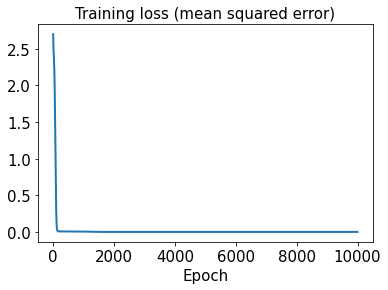

In [54]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

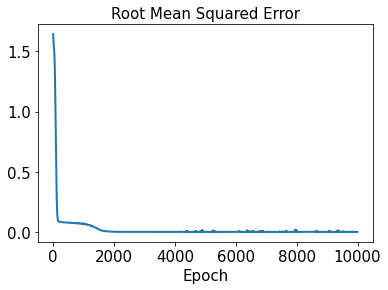

In [55]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [56]:
test_results2 = sd2.evaluate(t_test)

1/1 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - rmse: 0.0000e+00


In [57]:
decoded_train2 = sd2.predict(t_train)

In [58]:
decoded_test2 = sd2.predict(t_test)

In [59]:
error_train_abs2 = np.abs(decoded_train2 - y_train2)

In [60]:
error_test_abs2 = np.abs(decoded_test2 - y_test2)

In [61]:
l2_error_train2 = np.sqrt(np.sum((decoded_train2 - y_train2)**2) / np.sum(y_train2**2))
print(l2_error_train2)

5.1519678024452385e-05


In [62]:
l2_error_test2 = np.sqrt(np.sum((decoded_test2 - y_test2)**2) / np.sum(y_test2**2))
print(l2_error_test2)

0.0011266085435387152


In [63]:
l2_error_train_list2 = []
for i in range(0, len(x_train2)):
    l2_error_train_data2 = np.sqrt(np.sum((decoded_train2[i] - y_train2[i])**2) / np.sum(y_train2[i]**2))
    l2_error_train_list2.append(l2_error_train_data2)
print(l2_error_train_list2)

[3.854302959336314e-05, 7.619959143719816e-05, 4.172938033895064e-05, 6.287179929825081e-05, 5.3935602732506325e-05, 6.914884093091462e-05, 5.731303338529274e-05, 3.577075295305285e-05, 5.559451102421566e-05, 3.333513679268923e-05, 3.409968007580005e-05, 0.0001391877128339104, 4.062261925986015e-05, 7.876180135104111e-05, 6.487132617135938e-05, 7.958377372889734e-05, 3.7572544102674854e-05, 4.797744315727386e-05, 7.161294240162945e-05, 3.665068949705773e-05, 3.191557259615427e-05, 8.418033557227291e-05, 3.262646339344683e-05, 4.5335374934249336e-05, 3.4915553635544595e-05, 6.697505725809707e-05, 4.661050608617536e-05, 5.237091232114304e-05, 4.937540121341502e-05, 7.375831576669912e-05, 5.909308475531646e-05, 3.955968515415992e-05, 3.583112875265367e-05]


In [64]:
l2_error_test_list2 = []
for i in range(0, len(x_test2)):
    l2_error_test_data2 = np.sqrt(np.sum((decoded_test2[i] - y_test2[i])**2) / np.sum(y_test2[i]**2))
    l2_error_test_list2.append(l2_error_test_data2)
print(l2_error_test_list2)

[4.405915741467684e-05, 6.094448200684452e-05, 7.139256077716796e-05, 4.2867941988625e-05, 8.141862264358835e-05, 0.00241146750806098, 5.084523860864533e-05, 0.0007706913299810971]


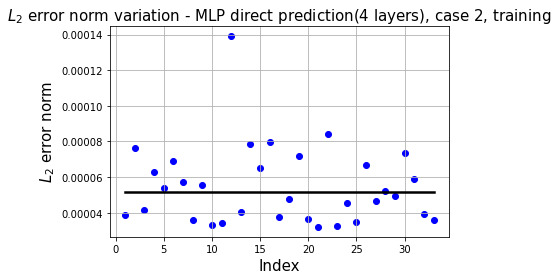

In [110]:
plt.plot(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train2*np.ones(x_train2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(4 layers), case 2, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

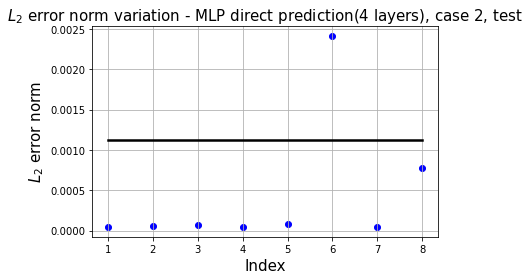

In [109]:
plt.plot(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test2*np.ones(x_test2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(4 layers), case 2, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

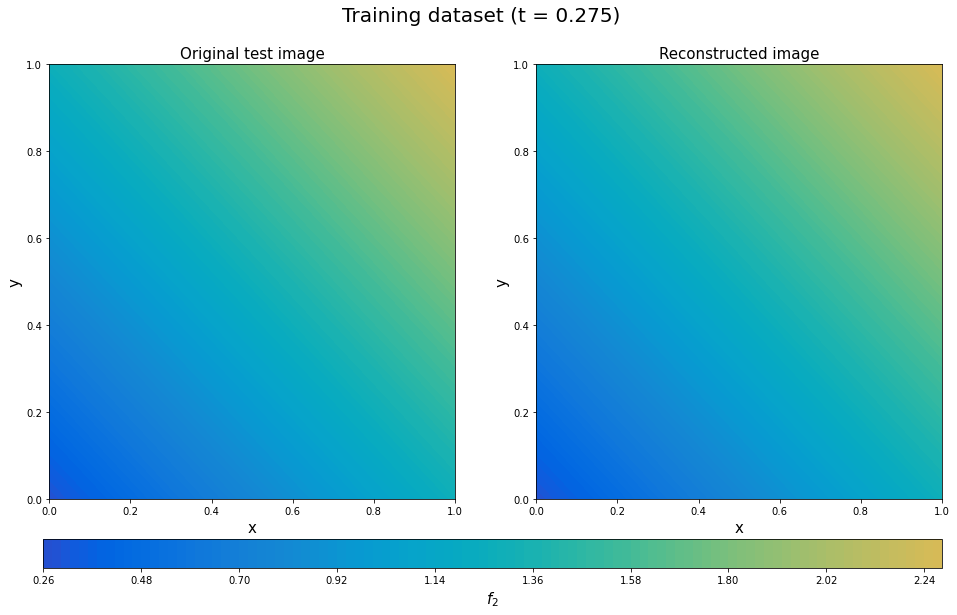

In [67]:
plt.figure(figsize=(16, 8))
y_train2_14_rotate = y_train2[14].T.reshape(101,101)
decoded_rotate2 = decoded_train2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_14_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[11]),fontsize=20)
plt.show()

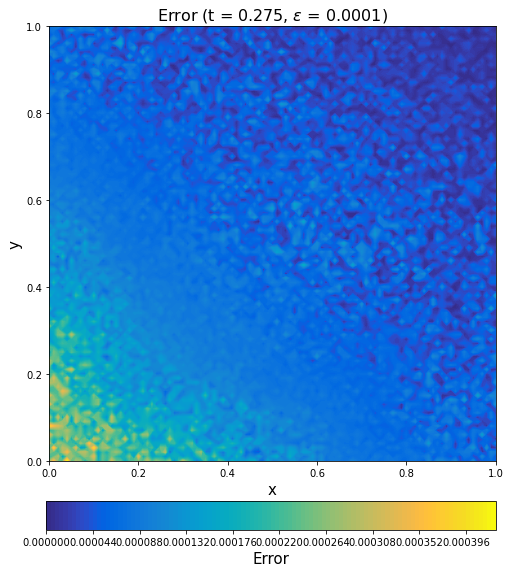

In [68]:
error_train_abs2_rotate14 = error_train_abs2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate14, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.275, $\epsilon$ = %.4f)' %(l2_error_train_list2[14]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

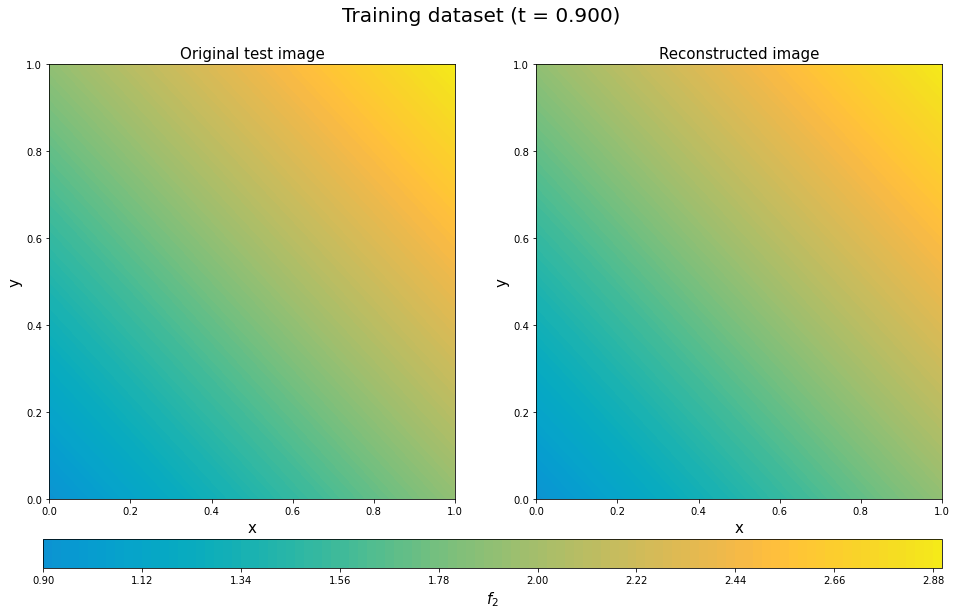

In [69]:
plt.figure(figsize=(16, 8))
y_train2_22_rotate = y_train2[22].T.reshape(101,101)
decoded_rotate2 = decoded_train2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_22_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[36]), fontsize=20)
plt.show()

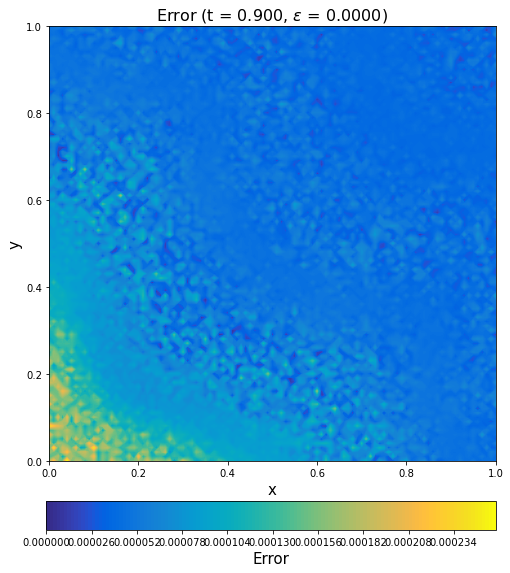

In [70]:
error_train_abs2_rotate22 = error_train_abs2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate22, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.900, $\epsilon$ = %.4f)' %(l2_error_train_list2[22]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

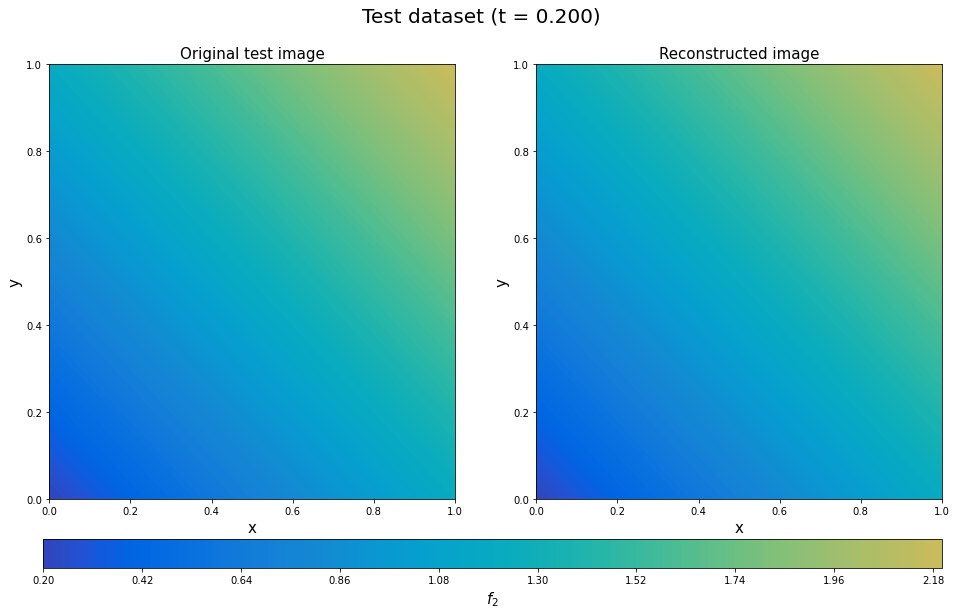

In [71]:
plt.figure(figsize=(16, 8))
y_test2_2_rotate = y_test2[2].T.reshape(101,101)
decoded_rotate2 = decoded_test2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

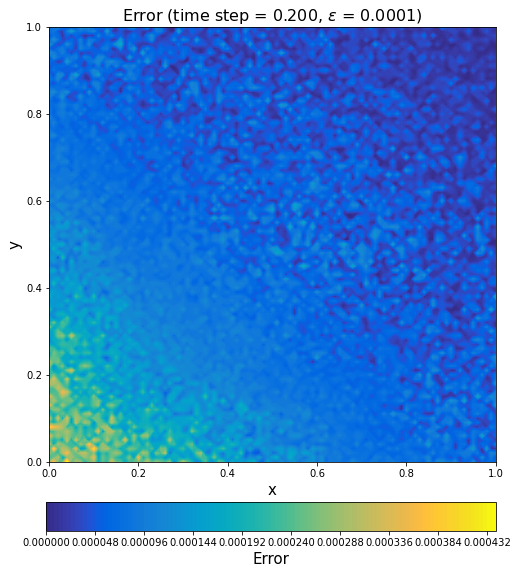

In [72]:
error_test_abs2_rotate2 = error_test_abs2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list2[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

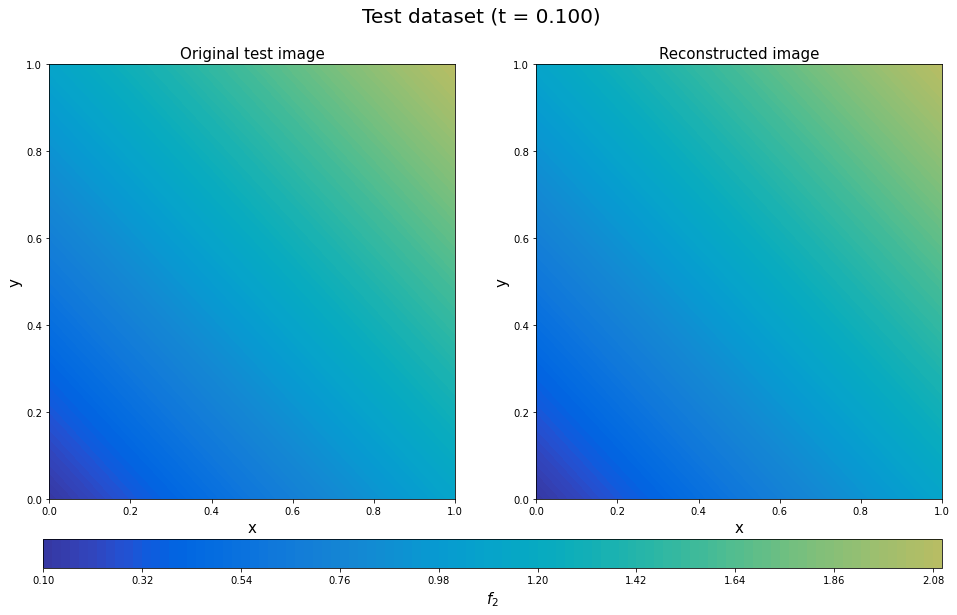

In [73]:
plt.figure(figsize=(16, 8))
y_test2_4_rotate = y_test2[4].T.reshape(101,101)
decoded_rotate2 = decoded_test2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[4]),fontsize=20)
plt.show()

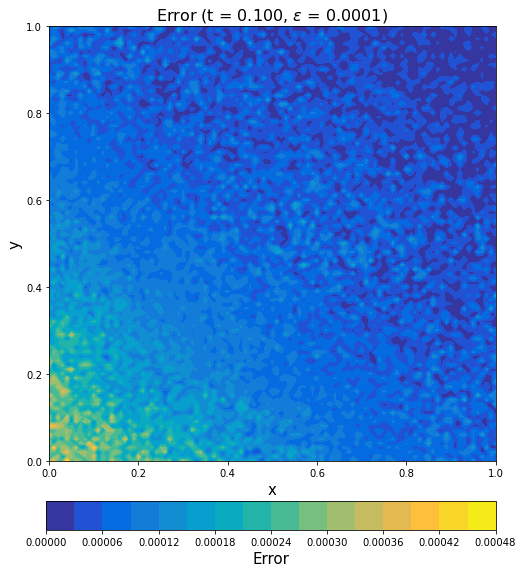

In [74]:
error_test_abs2_rotate4 = error_test_abs2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate4, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.100, $\epsilon$ = %.4f)' %(l2_error_test_list2[4]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 3: f3

In [75]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [76]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [77]:
sensor3 = sensor3.reshape((41, 16, 1))

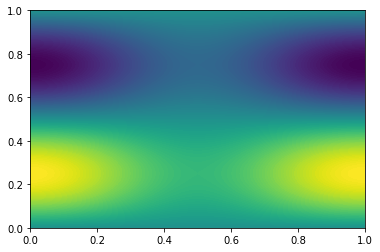

In [78]:
plt.contourf(xmesh, ymesh, out3[0,:,:], levels=128)

In [79]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [80]:
x_test3

array([[[ 1.19533543],
        [ 0.61432027],
        [ 0.65355792],
        [ 1.25882328],
        [ 0.66126769],
        [ 0.33984615],
        [ 0.36155269],
        [ 0.6963896 ],
        [-0.78664952],
        [-0.4042838 ],
        [-0.43010607],
        [-0.82843084],
        [-1.14744383],
        [-0.58970728],
        [-0.62737286],
        [-1.20838802]],

       [[ 1.57369576],
        [ 0.80877148],
        [ 0.86042905],
        [ 1.65727946],
        [ 0.8705792 ],
        [ 0.44741788],
        [ 0.4759952 ],
        [ 0.91681827],
        [-1.03564822],
        [-0.53225202],
        [-0.56624783],
        [-1.09065461],
        [-1.510645  ],
        [-0.77636772],
        [-0.82595561],
        [-1.59087989]],

       [[ 1.78323092],
        [ 0.91645815],
        [ 0.97499384],
        [ 1.87794366],
        [ 0.98649548],
        [ 0.50699088],
        [ 0.53937323],
        [ 1.03889121],
        [-1.17354318],
        [-0.60312055],
        [-0.64164286],
       

In [81]:
sd3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [82]:
start3 = datetime.datetime.now()
history3 = sd3.fit(t_train, y_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.8742 - rmse: 1.9683
Epoch 2/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7111 - rmse: 1.9264
Epoch 3/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5595 - rmse: 1.8867
Epoch 4/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4185 - rmse: 1.8489
Epoch 5/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2864 - rmse: 1.8128
Epoch 6/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1598 - rmse: 1.7776
Epoch 7/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0396 - rmse: 1.7434
Epoch 8/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9250 - rmse: 1.7103
Epoch 9/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8169 - rmse: 1.6784
Epoch 10/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7152 - rmse: 1.6478
Epoch 11/10000
2/2 [============================

2/2 [==============================] - 0s 4ms/step - loss: 0.8994 - rmse: 0.9484
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8933 - rmse: 0.9451
Epoch 88/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8873 - rmse: 0.9420
Epoch 89/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8813 - rmse: 0.9388
Epoch 90/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8754 - rmse: 0.9356
Epoch 91/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8697 - rmse: 0.9326
Epoch 92/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8640 - rmse: 0.9295
Epoch 93/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.8586 - rmse: 0.9266
Epoch 94/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.8531 - rmse: 0.9236
Epoch 95/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.8477 - rmse: 0.9207
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.5145 - rmse: 0.7173
Epoch 171/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5106 - rmse: 0.7146
Epoch 172/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5068 - rmse: 0.7119
Epoch 173/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5031 - rmse: 0.7093
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4993 - rmse: 0.7066
Epoch 175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4957 - rmse: 0.7041
Epoch 176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4921 - rmse: 0.7015
Epoch 177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4886 - rmse: 0.6990
Epoch 178/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4850 - rmse: 0.6964
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4813 - rmse: 0.6938
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2312 - rmse: 0.4808
Epoch 255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2292 - rmse: 0.4788
Epoch 256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2273 - rmse: 0.4768
Epoch 257/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2253 - rmse: 0.4747
Epoch 258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2232 - rmse: 0.4724
Epoch 259/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2210 - rmse: 0.4701
Epoch 260/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2188 - rmse: 0.4678
Epoch 261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2168 - rmse: 0.4657
Epoch 262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2149 - rmse: 0.4636
Epoch 263/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2129 - rmse: 0.4614
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0908 - rmse: 0.3013
Epoch 339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0892 - rmse: 0.2987
Epoch 340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0876 - rmse: 0.2959
Epoch 341/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0862 - rmse: 0.2936
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0850 - rmse: 0.2916
Epoch 343/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0839 - rmse: 0.2897
Epoch 344/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0829 - rmse: 0.2880
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0820 - rmse: 0.2864
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0812 - rmse: 0.2850
Epoch 347/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0804 - rmse: 0.2836
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0261 - rmse: 0.1616
Epoch 423/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0256 - rmse: 0.1601
Epoch 424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0250 - rmse: 0.1581
Epoch 425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0244 - rmse: 0.1563
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0239 - rmse: 0.1547
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0235 - rmse: 0.1532
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0230 - rmse: 0.1518
Epoch 429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0226 - rmse: 0.1504
Epoch 430/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0222 - rmse: 0.1488
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0216 - rmse: 0.1470
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0722
Epoch 508/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0716
Epoch 509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0711
Epoch 510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0702
Epoch 512/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0696
Epoch 513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 514/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0681
Epoch 515/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 595/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 596/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0430
Epoch 598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0428
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 675/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9320e-04 - rmse: 0.0315
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7146e-04 - rmse: 0.0312
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5661e-04 - rmse: 0.0309
Epoch 678/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.4895e-04 - rmse: 0.0308
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4277e-04 - rmse: 0.0307
Epoch 680/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3509e-04 - rmse: 0.0306
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2651e-04 - rmse: 0.0304
Epoch 682/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1800e-04 - rmse: 0.0303
Epoch 683/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1033e-04 - rmse: 0.0302
Epoch 684/

2/2 [==============================] - 0s 4ms/step - loss: 5.7729e-04 - rmse: 0.0240
Epoch 756/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7460e-04 - rmse: 0.0240
Epoch 757/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7063e-04 - rmse: 0.0239
Epoch 758/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6833e-04 - rmse: 0.0238
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6627e-04 - rmse: 0.0238
Epoch 760/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6547e-04 - rmse: 0.0238
Epoch 761/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6466e-04 - rmse: 0.0238
Epoch 762/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6226e-04 - rmse: 0.0237
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5766e-04 - rmse: 0.0236
Epoch 764/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5208e-04 - rmse: 0.0235
Epoch 

2/2 [==============================] - 0s 5ms/step - loss: 3.9303e-04 - rmse: 0.0198
Epoch 837/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0045e-04 - rmse: 0.0200
Epoch 838/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0699e-04 - rmse: 0.0202
Epoch 839/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1205e-04 - rmse: 0.0203
Epoch 840/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1015e-04 - rmse: 0.0203
Epoch 841/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0121e-04 - rmse: 0.0200
Epoch 842/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9311e-04 - rmse: 0.0198
Epoch 843/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8456e-04 - rmse: 0.0196
Epoch 844/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7933e-04 - rmse: 0.0195
Epoch 845/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7057e-04 - rmse: 0.0193
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 2.8117e-04 - rmse: 0.0168
Epoch 918/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7870e-04 - rmse: 0.0167
Epoch 919/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7824e-04 - rmse: 0.0167
Epoch 920/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7728e-04 - rmse: 0.0167
Epoch 921/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7547e-04 - rmse: 0.0166
Epoch 922/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7289e-04 - rmse: 0.0165
Epoch 923/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6788e-04 - rmse: 0.0164
Epoch 924/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6216e-04 - rmse: 0.0162
Epoch 925/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5810e-04 - rmse: 0.0161
Epoch 926/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5601e-04 - rmse: 0.0160
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 2.1637e-04 - rmse: 0.0147
Epoch 999/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1949e-04 - rmse: 0.0148
Epoch 1000/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2053e-04 - rmse: 0.0149
Epoch 1001/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1896e-04 - rmse: 0.0148
Epoch 1002/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1510e-04 - rmse: 0.0147
Epoch 1003/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1107e-04 - rmse: 0.0145
Epoch 1004/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0813e-04 - rmse: 0.0144
Epoch 1005/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0761e-04 - rmse: 0.0144
Epoch 1006/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0744e-04 - rmse: 0.0144
Epoch 1007/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0675e-04 - rmse: 0.014

2/2 [==============================] - 0s 4ms/step - loss: 1.5708e-04 - rmse: 0.0125
Epoch 1079/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5964e-04 - rmse: 0.0126
Epoch 1080/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6965e-04 - rmse: 0.0130
Epoch 1081/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8276e-04 - rmse: 0.0135
Epoch 1082/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8912e-04 - rmse: 0.0138
Epoch 1083/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8300e-04 - rmse: 0.0135
Epoch 1084/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7028e-04 - rmse: 0.0130
Epoch 1085/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5933e-04 - rmse: 0.0126
Epoch 1086/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5529e-04 - rmse: 0.0125
Epoch 1087/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5598e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.2253e-04 - rmse: 0.0111
Epoch 1159/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2355e-04 - rmse: 0.0111
Epoch 1160/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2582e-04 - rmse: 0.0112
Epoch 1161/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2512e-04 - rmse: 0.0112
Epoch 1162/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2238e-04 - rmse: 0.0111
Epoch 1163/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1981e-04 - rmse: 0.0109
Epoch 1164/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1778e-04 - rmse: 0.0109
Epoch 1165/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1839e-04 - rmse: 0.0109
Epoch 1166/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2038e-04 - rmse: 0.0110
Epoch 1167/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2115e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 9.6321e-05 - rmse: 0.0098
Epoch 1239/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5447e-05 - rmse: 0.0098
Epoch 1240/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6291e-05 - rmse: 0.0098
Epoch 1241/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6315e-05 - rmse: 0.0098
Epoch 1242/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5664e-05 - rmse: 0.0098
Epoch 1243/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4278e-05 - rmse: 0.0097
Epoch 1244/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4087e-05 - rmse: 0.0097
Epoch 1245/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.9024e-05 - rmse: 0.0100
Epoch 1246/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0374e-04 - rmse: 0.0102
Epoch 1247/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0488e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 7.8745e-05 - rmse: 0.0089
Epoch 1319/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5634e-05 - rmse: 0.0087
Epoch 1320/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5673e-05 - rmse: 0.0087
Epoch 1321/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.0098e-05 - rmse: 0.0089
Epoch 1322/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6704e-05 - rmse: 0.0093
Epoch 1323/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.3146e-05 - rmse: 0.0097
Epoch 1324/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.3801e-05 - rmse: 0.0097
Epoch 1325/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.4775e-05 - rmse: 0.0092
Epoch 1326/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5018e-05 - rmse: 0.0087
Epoch 1327/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.2387e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.7387e-05 - rmse: 0.0076
Epoch 1399/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4751e-05 - rmse: 0.0074
Epoch 1400/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7270e-05 - rmse: 0.0076
Epoch 1401/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.5085e-05 - rmse: 0.0081
Epoch 1402/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7654e-05 - rmse: 0.0082
Epoch 1403/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2812e-05 - rmse: 0.0079
Epoch 1404/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7701e-05 - rmse: 0.0076
Epoch 1405/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5043e-05 - rmse: 0.0074
Epoch 1406/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4252e-05 - rmse: 0.0074
Epoch 1407/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7573e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.2939e-05 - rmse: 0.0066
Epoch 1479/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2822e-05 - rmse: 0.0065
Epoch 1480/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2877e-05 - rmse: 0.0065
Epoch 1481/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.2463e-05 - rmse: 0.0065
Epoch 1482/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1683e-05 - rmse: 0.0065
Epoch 1483/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1442e-05 - rmse: 0.0064
Epoch 1484/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1810e-05 - rmse: 0.0065
Epoch 1485/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3496e-05 - rmse: 0.0066
Epoch 1486/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7514e-05 - rmse: 0.0069
Epoch 1487/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9192e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.4036e-05 - rmse: 0.0058
Epoch 1559/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3986e-05 - rmse: 0.0058
Epoch 1560/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4069e-05 - rmse: 0.0058
Epoch 1561/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3992e-05 - rmse: 0.0058
Epoch 1562/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3924e-05 - rmse: 0.0058
Epoch 1563/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5239e-05 - rmse: 0.0059
Epoch 1564/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9768e-05 - rmse: 0.0063
Epoch 1565/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4874e-05 - rmse: 0.0067
Epoch 1566/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5825e-05 - rmse: 0.0068
Epoch 1567/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1189e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.5794e-05 - rmse: 0.0051
Epoch 1639/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5503e-05 - rmse: 0.0051
Epoch 1640/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6357e-05 - rmse: 0.0051
Epoch 1641/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8969e-05 - rmse: 0.0054
Epoch 1642/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0468e-05 - rmse: 0.0055
Epoch 1643/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9729e-05 - rmse: 0.0055
Epoch 1644/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7227e-05 - rmse: 0.0052
Epoch 1645/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5137e-05 - rmse: 0.0050
Epoch 1646/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4953e-05 - rmse: 0.0050
Epoch 1647/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5349e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 2.0649e-05 - rmse: 0.0045
Epoch 1719/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3977e-05 - rmse: 0.0049
Epoch 1720/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8744e-05 - rmse: 0.0054
Epoch 1721/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9134e-05 - rmse: 0.0054
Epoch 1722/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6317e-05 - rmse: 0.0051
Epoch 1723/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4693e-05 - rmse: 0.0050
Epoch 1724/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2994e-05 - rmse: 0.0048
Epoch 1725/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1028e-05 - rmse: 0.0046
Epoch 1726/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0274e-05 - rmse: 0.0045
Epoch 1727/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0543e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 2.1324e-05 - rmse: 0.0046
Epoch 1799/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8973e-05 - rmse: 0.0044
Epoch 1800/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7190e-05 - rmse: 0.0041
Epoch 1801/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6391e-05 - rmse: 0.0040
Epoch 1802/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6338e-05 - rmse: 0.0040
Epoch 1803/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8365e-05 - rmse: 0.0043
Epoch 1804/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1938e-05 - rmse: 0.0047
Epoch 1805/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3882e-05 - rmse: 0.0049
Epoch 1806/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3883e-05 - rmse: 0.0049
Epoch 1807/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0254e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.3913e-05 - rmse: 0.0037
Epoch 1879/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3619e-05 - rmse: 0.0037
Epoch 1880/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3523e-05 - rmse: 0.0037
Epoch 1881/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3499e-05 - rmse: 0.0037
Epoch 1882/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3453e-05 - rmse: 0.0037
Epoch 1883/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3675e-05 - rmse: 0.0037
Epoch 1884/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3814e-05 - rmse: 0.0037
Epoch 1885/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3310e-05 - rmse: 0.0036
Epoch 1886/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3439e-05 - rmse: 0.0037
Epoch 1887/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4406e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.2542e-05 - rmse: 0.0035
Epoch 1959/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2783e-05 - rmse: 0.0036
Epoch 1960/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3061e-05 - rmse: 0.0036
Epoch 1961/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3054e-05 - rmse: 0.0036
Epoch 1962/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1755e-05 - rmse: 0.0034
Epoch 1963/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1466e-05 - rmse: 0.0034
Epoch 1964/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2779e-05 - rmse: 0.0036
Epoch 1965/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3806e-05 - rmse: 0.0037
Epoch 1966/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3836e-05 - rmse: 0.0037
Epoch 1967/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3104e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 9.8511e-06 - rmse: 0.0031
Epoch 2039/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.8284e-06 - rmse: 0.0031
Epoch 2040/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0562e-05 - rmse: 0.0032
Epoch 2041/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0486e-05 - rmse: 0.0032
Epoch 2042/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0320e-05 - rmse: 0.0032
Epoch 2043/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.7418e-06 - rmse: 0.0031
Epoch 2044/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.5764e-06 - rmse: 0.0031
Epoch 2045/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0720e-05 - rmse: 0.0033
Epoch 2046/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0861e-05 - rmse: 0.0033
Epoch 2047/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0057e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 9.9785e-06 - rmse: 0.0032
Epoch 2119/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1794e-05 - rmse: 0.0034
Epoch 2120/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0710e-05 - rmse: 0.0033
Epoch 2121/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.9958e-06 - rmse: 0.0030
Epoch 2122/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6660e-06 - rmse: 0.0029
Epoch 2123/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6031e-06 - rmse: 0.0029
Epoch 2124/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4588e-06 - rmse: 0.0029
Epoch 2125/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.1895e-06 - rmse: 0.0029
Epoch 2126/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.0265e-06 - rmse: 0.0028
Epoch 2127/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0789e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 7.7477e-06 - rmse: 0.0028
Epoch 2199/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9256e-06 - rmse: 0.0026
Epoch 2200/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.7138e-06 - rmse: 0.0026
Epoch 2201/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8911e-06 - rmse: 0.0026
Epoch 2202/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9209e-06 - rmse: 0.0026
Epoch 2203/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3215e-06 - rmse: 0.0027
Epoch 2204/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6913e-06 - rmse: 0.0028
Epoch 2205/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.5453e-06 - rmse: 0.0027
Epoch 2206/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4825e-06 - rmse: 0.0027
Epoch 2207/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.7177e-06 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 6.2663e-06 - rmse: 0.0025
Epoch 2279/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2750e-06 - rmse: 0.0025
Epoch 2280/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4068e-06 - rmse: 0.0025
Epoch 2281/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4332e-06 - rmse: 0.0025
Epoch 2282/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3598e-06 - rmse: 0.0025
Epoch 2283/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3467e-06 - rmse: 0.0025
Epoch 2284/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0580e-06 - rmse: 0.0025
Epoch 2285/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8819e-06 - rmse: 0.0024
Epoch 2286/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9325e-06 - rmse: 0.0024
Epoch 2287/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9370e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 7.1654e-06 - rmse: 0.0027
Epoch 2359/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2299e-06 - rmse: 0.0027
Epoch 2360/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.5572e-06 - rmse: 0.0027
Epoch 2361/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2541e-06 - rmse: 0.0029
Epoch 2362/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.7195e-06 - rmse: 0.0030
Epoch 2363/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.6461e-06 - rmse: 0.0029
Epoch 2364/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4414e-06 - rmse: 0.0027
Epoch 2365/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5838e-06 - rmse: 0.0026
Epoch 2366/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0737e-06 - rmse: 0.0025
Epoch 2367/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.9707e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 5.4540e-06 - rmse: 0.0023
Epoch 2439/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0397e-06 - rmse: 0.0022
Epoch 2440/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.1352e-06 - rmse: 0.0023
Epoch 2441/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2681e-06 - rmse: 0.0023
Epoch 2442/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2594e-06 - rmse: 0.0023
Epoch 2443/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8203e-06 - rmse: 0.0022
Epoch 2444/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7857e-06 - rmse: 0.0022
Epoch 2445/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4568e-06 - rmse: 0.0023
Epoch 2446/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2339e-06 - rmse: 0.0023
Epoch 2447/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8197e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 4.3993e-06 - rmse: 0.0021
Epoch 2519/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2757e-06 - rmse: 0.0021
Epoch 2520/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5062e-06 - rmse: 0.0021
Epoch 2521/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4184e-06 - rmse: 0.0021
Epoch 2522/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1892e-06 - rmse: 0.0020
Epoch 2523/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1883e-06 - rmse: 0.0020
Epoch 2524/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3246e-06 - rmse: 0.0021
Epoch 2525/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3397e-06 - rmse: 0.0021
Epoch 2526/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2959e-06 - rmse: 0.0021
Epoch 2527/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1952e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.1917e-06 - rmse: 0.0020
Epoch 2599/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2365e-06 - rmse: 0.0021
Epoch 2600/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1967e-06 - rmse: 0.0020
Epoch 2601/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0357e-06 - rmse: 0.0020
Epoch 2602/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8539e-06 - rmse: 0.0020
Epoch 2603/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9371e-06 - rmse: 0.0020
Epoch 2604/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1261e-06 - rmse: 0.0020
Epoch 2605/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1671e-06 - rmse: 0.0020
Epoch 2606/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1726e-06 - rmse: 0.0020
Epoch 2607/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0705e-06 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.8246e-06 - rmse: 0.0020
Epoch 2679/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0551e-06 - rmse: 0.0020
Epoch 2680/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0525e-06 - rmse: 0.0020
Epoch 2681/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9117e-06 - rmse: 0.0020
Epoch 2682/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8255e-06 - rmse: 0.0020
Epoch 2683/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7327e-06 - rmse: 0.0019
Epoch 2684/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6935e-06 - rmse: 0.0019
Epoch 2685/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6114e-06 - rmse: 0.0019
Epoch 2686/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5625e-06 - rmse: 0.0019
Epoch 2687/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8345e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.5100e-06 - rmse: 0.0019
Epoch 2759/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6174e-06 - rmse: 0.0019
Epoch 2760/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5550e-06 - rmse: 0.0019
Epoch 2761/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5000e-06 - rmse: 0.0019
Epoch 2762/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4289e-06 - rmse: 0.0019
Epoch 2763/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6478e-06 - rmse: 0.0019
Epoch 2764/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6592e-06 - rmse: 0.0022
Epoch 2765/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3304e-06 - rmse: 0.0021
Epoch 2766/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5601e-06 - rmse: 0.0019
Epoch 2767/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5223e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.8574e-06 - rmse: 0.0020
Epoch 2839/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6090e-06 - rmse: 0.0019
Epoch 2840/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8113e-06 - rmse: 0.0020
Epoch 2841/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1302e-06 - rmse: 0.0020
Epoch 2842/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0933e-06 - rmse: 0.0018
Epoch 2843/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6877e-06 - rmse: 0.0024
Epoch 2844/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.6917e-06 - rmse: 0.0029
Epoch 2845/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3666e-06 - rmse: 0.0025
Epoch 2846/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.0297e-06 - rmse: 0.0025
Epoch 2847/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2274e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 3.0409e-06 - rmse: 0.0017
Epoch 2919/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3165e-06 - rmse: 0.0018
Epoch 2920/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1275e-06 - rmse: 0.0018
Epoch 2921/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4563e-06 - rmse: 0.0019
Epoch 2922/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5029e-06 - rmse: 0.0023
Epoch 2923/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3374e-06 - rmse: 0.0025
Epoch 2924/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9886e-06 - rmse: 0.0020
Epoch 2925/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2678e-06 - rmse: 0.0025
Epoch 2926/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1231e-06 - rmse: 0.0030
Epoch 2927/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8286e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.5311e-06 - rmse: 0.0019
Epoch 2999/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4791e-06 - rmse: 0.0019
Epoch 3000/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8577e-06 - rmse: 0.0017
Epoch 3001/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5435e-06 - rmse: 0.0019
Epoch 3002/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2421e-06 - rmse: 0.0021
Epoch 3003/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3748e-06 - rmse: 0.0023
Epoch 3004/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9735e-06 - rmse: 0.0024
Epoch 3005/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7869e-06 - rmse: 0.0022
Epoch 3006/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3792e-06 - rmse: 0.0021
Epoch 3007/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8611e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 3.3136e-06 - rmse: 0.0018
Epoch 3079/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0868e-06 - rmse: 0.0018
Epoch 3080/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8881e-06 - rmse: 0.0017
Epoch 3081/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8120e-06 - rmse: 0.0017
Epoch 3082/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9017e-06 - rmse: 0.0017
Epoch 3083/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9435e-06 - rmse: 0.0017
Epoch 3084/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8921e-06 - rmse: 0.0017
Epoch 3085/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9562e-06 - rmse: 0.0017
Epoch 3086/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9577e-06 - rmse: 0.0017
Epoch 3087/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0772e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.6106e-06 - rmse: 0.0021
Epoch 3159/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6675e-06 - rmse: 0.0016
Epoch 3160/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8598e-06 - rmse: 0.0020
Epoch 3161/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0390e-06 - rmse: 0.0017
Epoch 3162/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0901e-06 - rmse: 0.0018
Epoch 3163/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2617e-06 - rmse: 0.0021
Epoch 3164/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8572e-06 - rmse: 0.0017
Epoch 3165/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1038e-06 - rmse: 0.0020
Epoch 3166/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1108e-06 - rmse: 0.0020
Epoch 3167/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7180e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.5922e-06 - rmse: 0.0016
Epoch 3239/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7213e-06 - rmse: 0.0016
Epoch 3240/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8494e-06 - rmse: 0.0017
Epoch 3241/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9796e-06 - rmse: 0.0017
Epoch 3242/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0924e-06 - rmse: 0.0018
Epoch 3243/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0235e-06 - rmse: 0.0017
Epoch 3244/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4484e-06 - rmse: 0.0019
Epoch 3245/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2686e-06 - rmse: 0.0021
Epoch 3246/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0586e-06 - rmse: 0.0017
Epoch 3247/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7993e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.5796e-06 - rmse: 0.0021
Epoch 3319/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2507e-06 - rmse: 0.0027
Epoch 3320/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6785e-06 - rmse: 0.0019
Epoch 3321/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6570e-06 - rmse: 0.0022
Epoch 3322/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1259e-06 - rmse: 0.0023
Epoch 3323/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2594e-06 - rmse: 0.0021
Epoch 3324/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5962e-06 - rmse: 0.0021
Epoch 3325/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1249e-06 - rmse: 0.0020
Epoch 3326/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7234e-06 - rmse: 0.0019
Epoch 3327/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4752e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.8913e-06 - rmse: 0.0017
Epoch 3399/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3951e-06 - rmse: 0.0015
Epoch 3400/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0621e-06 - rmse: 0.0017
Epoch 3401/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5699e-06 - rmse: 0.0019
Epoch 3402/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4742e-06 - rmse: 0.0016
Epoch 3403/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.4177e-06 - rmse: 0.0016
Epoch 3404/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9509e-06 - rmse: 0.0017
Epoch 3405/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2546e-06 - rmse: 0.0015
Epoch 3406/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3562e-06 - rmse: 0.0018
Epoch 3407/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9805e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 3.4610e-06 - rmse: 0.0019
Epoch 3479/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5404e-06 - rmse: 0.0024
Epoch 3480/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.8961e-06 - rmse: 0.0017
Epoch 3481/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.1503e-06 - rmse: 0.0020
Epoch 3482/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5777e-06 - rmse: 0.0021
Epoch 3483/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5741e-06 - rmse: 0.0019
Epoch 3484/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3922e-06 - rmse: 0.0015
Epoch 3485/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7579e-06 - rmse: 0.0022
Epoch 3486/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9977e-06 - rmse: 0.0020
Epoch 3487/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1988e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 3.9589e-06 - rmse: 0.0020
Epoch 3559/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7043e-06 - rmse: 0.0016
Epoch 3560/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1866e-06 - rmse: 0.0020
Epoch 3561/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9693e-06 - rmse: 0.0017
Epoch 3562/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7184e-06 - rmse: 0.0022
Epoch 3563/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9727e-06 - rmse: 0.0024
Epoch 3564/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7374e-06 - rmse: 0.0017
Epoch 3565/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.6217e-06 - rmse: 0.0019
Epoch 3566/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7872e-06 - rmse: 0.0017
Epoch 3567/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5854e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.4046e-06 - rmse: 0.0016
Epoch 3639/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6282e-06 - rmse: 0.0016
Epoch 3640/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7199e-06 - rmse: 0.0016
Epoch 3641/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1976e-06 - rmse: 0.0015
Epoch 3642/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4776e-06 - rmse: 0.0016
Epoch 3643/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2384e-06 - rmse: 0.0015
Epoch 3644/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7585e-06 - rmse: 0.0017
Epoch 3645/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5094e-06 - rmse: 0.0016
Epoch 3646/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4554e-06 - rmse: 0.0016
Epoch 3647/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0932e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.8266e-06 - rmse: 0.0024
Epoch 3719/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6795e-06 - rmse: 0.0019
Epoch 3720/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4975e-06 - rmse: 0.0027
Epoch 3721/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.3418e-06 - rmse: 0.0031
Epoch 3722/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9262e-06 - rmse: 0.0020
Epoch 3723/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1054e-06 - rmse: 0.0023
Epoch 3724/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1614e-06 - rmse: 0.0023
Epoch 3725/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4213e-06 - rmse: 0.0016
Epoch 3726/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.8012e-06 - rmse: 0.0019
Epoch 3727/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5389e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.3237e-06 - rmse: 0.0015
Epoch 3799/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3870e-06 - rmse: 0.0015
Epoch 3800/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0178e-06 - rmse: 0.0014
Epoch 3801/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1661e-06 - rmse: 0.0015
Epoch 3802/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8580e-06 - rmse: 0.0017
Epoch 3803/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3839e-06 - rmse: 0.0015
Epoch 3804/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6061e-06 - rmse: 0.0016
Epoch 3805/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5947e-06 - rmse: 0.0019
Epoch 3806/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9681e-06 - rmse: 0.0017
Epoch 3807/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6005e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.1683e-06 - rmse: 0.0015
Epoch 3879/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4092e-06 - rmse: 0.0021
Epoch 3880/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3490e-06 - rmse: 0.0021
Epoch 3881/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7408e-06 - rmse: 0.0019
Epoch 3882/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4876e-05 - rmse: 0.0039
Epoch 3883/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3959e-06 - rmse: 0.0023
Epoch 3884/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0723e-06 - rmse: 0.0030
Epoch 3885/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0673e-06 - rmse: 0.0025
Epoch 3886/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3155e-06 - rmse: 0.0023
Epoch 3887/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3894e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.0153e-06 - rmse: 0.0014
Epoch 3959/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1072e-06 - rmse: 0.0015
Epoch 3960/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2466e-06 - rmse: 0.0015
Epoch 3961/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9026e-06 - rmse: 0.0014
Epoch 3962/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3687e-06 - rmse: 0.0015
Epoch 3963/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.3212e-06 - rmse: 0.0015
Epoch 3964/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2570e-06 - rmse: 0.0015
Epoch 3965/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1044e-06 - rmse: 0.0015
Epoch 3966/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2510e-06 - rmse: 0.0015
Epoch 3967/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9330e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 4.0585e-06 - rmse: 0.0020
Epoch 4039/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3341e-06 - rmse: 0.0023
Epoch 4040/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0021e-06 - rmse: 0.0024
Epoch 4041/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3864e-06 - rmse: 0.0021
Epoch 4042/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0635e-06 - rmse: 0.0018
Epoch 4043/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8803e-06 - rmse: 0.0017
Epoch 4044/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1805e-06 - rmse: 0.0015
Epoch 4045/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2315e-06 - rmse: 0.0015
Epoch 4046/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1624e-06 - rmse: 0.0015
Epoch 4047/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8530e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.1768e-06 - rmse: 0.0018
Epoch 4119/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1020e-06 - rmse: 0.0014
Epoch 4120/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1619e-06 - rmse: 0.0015
Epoch 4121/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5627e-06 - rmse: 0.0019
Epoch 4122/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6043e-06 - rmse: 0.0019
Epoch 4123/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.8740e-06 - rmse: 0.0028
Epoch 4124/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8359e-06 - rmse: 0.0020
Epoch 4125/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3654e-06 - rmse: 0.0025
Epoch 4126/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9599e-06 - rmse: 0.0014
Epoch 4127/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2231e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 8.7186e-06 - rmse: 0.0030
Epoch 4199/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9518e-06 - rmse: 0.0014
Epoch 4200/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3437e-06 - rmse: 0.0021
Epoch 4201/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0908e-06 - rmse: 0.0014
Epoch 4202/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1550e-06 - rmse: 0.0023
Epoch 4203/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1413e-06 - rmse: 0.0015
Epoch 4204/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5353e-06 - rmse: 0.0024
Epoch 4205/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.5122e-06 - rmse: 0.0031
Epoch 4206/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8315e-06 - rmse: 0.0017
Epoch 4207/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2323e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.6662e-06 - rmse: 0.0016
Epoch 4279/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8312e-06 - rmse: 0.0014
Epoch 4280/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2194e-06 - rmse: 0.0015
Epoch 4281/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8186e-06 - rmse: 0.0013
Epoch 4282/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8982e-06 - rmse: 0.0014
Epoch 4283/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8399e-06 - rmse: 0.0014
Epoch 4284/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8759e-06 - rmse: 0.0014
Epoch 4285/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4796e-06 - rmse: 0.0016
Epoch 4286/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0337e-06 - rmse: 0.0014
Epoch 4287/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0724e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 1.2664e-05 - rmse: 0.0036
Epoch 4359/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6574e-06 - rmse: 0.0019
Epoch 4360/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2373e-05 - rmse: 0.0035
Epoch 4361/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3401e-06 - rmse: 0.0023
Epoch 4362/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1530e-05 - rmse: 0.0034
Epoch 4363/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.2075e-06 - rmse: 0.0025
Epoch 4364/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5375e-06 - rmse: 0.0024
Epoch 4365/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1570e-06 - rmse: 0.0025
Epoch 4366/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.6513e-06 - rmse: 0.0016
Epoch 4367/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9346e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 4.1842e-06 - rmse: 0.0020
Epoch 4439/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3353e-06 - rmse: 0.0023
Epoch 4440/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0869e-06 - rmse: 0.0020
Epoch 4441/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.0298e-06 - rmse: 0.0014
Epoch 4442/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2083e-06 - rmse: 0.0018
Epoch 4443/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.5014e-06 - rmse: 0.0025
Epoch 4444/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1768e-05 - rmse: 0.0034
Epoch 4445/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3138e-05 - rmse: 0.0036
Epoch 4446/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0980e-05 - rmse: 0.0033
Epoch 4447/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.6114e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.1629e-06 - rmse: 0.0027
Epoch 4519/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2636e-05 - rmse: 0.0036
Epoch 4520/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6622e-05 - rmse: 0.0041
Epoch 4521/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6025e-06 - rmse: 0.0031
Epoch 4522/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3535e-05 - rmse: 0.0049
Epoch 4523/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6186e-06 - rmse: 0.0019
Epoch 4524/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4241e-05 - rmse: 0.0038
Epoch 4525/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6756e-06 - rmse: 0.0019
Epoch 4526/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5142e-06 - rmse: 0.0029
Epoch 4527/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8787e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.1875e-06 - rmse: 0.0015
Epoch 4599/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.7393e-06 - rmse: 0.0030
Epoch 4600/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1385e-06 - rmse: 0.0018
Epoch 4601/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6617e-06 - rmse: 0.0022
Epoch 4602/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9755e-06 - rmse: 0.0014
Epoch 4603/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0453e-06 - rmse: 0.0027
Epoch 4604/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7611e-06 - rmse: 0.0031
Epoch 4605/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.6207e-06 - rmse: 0.0028
Epoch 4606/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0834e-06 - rmse: 0.0027
Epoch 4607/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8447e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 7.2251e-06 - rmse: 0.0027
Epoch 4679/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2501e-05 - rmse: 0.0035
Epoch 4680/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2381e-06 - rmse: 0.0021
Epoch 4681/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4129e-05 - rmse: 0.0038
Epoch 4682/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.5660e-06 - rmse: 0.0026
Epoch 4683/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4664e-05 - rmse: 0.0038
Epoch 4684/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8219e-06 - rmse: 0.0026
Epoch 4685/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9924e-06 - rmse: 0.0032
Epoch 4686/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.2885e-06 - rmse: 0.0027
Epoch 4687/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2289e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.5129e-06 - rmse: 0.0016
Epoch 4759/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1913e-06 - rmse: 0.0025
Epoch 4760/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7572e-06 - rmse: 0.0030
Epoch 4761/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0992e-06 - rmse: 0.0030
Epoch 4762/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4978e-06 - rmse: 0.0031
Epoch 4763/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3574e-05 - rmse: 0.0037
Epoch 4764/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.6571e-06 - rmse: 0.0029
Epoch 4765/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9314e-06 - rmse: 0.0014
Epoch 4766/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.7100e-06 - rmse: 0.0028
Epoch 4767/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.0407e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.9016e-06 - rmse: 0.0014
Epoch 4839/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9882e-06 - rmse: 0.0014
Epoch 4840/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4444e-06 - rmse: 0.0016
Epoch 4841/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7876e-06 - rmse: 0.0017
Epoch 4842/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8040e-06 - rmse: 0.0020
Epoch 4843/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1671e-06 - rmse: 0.0015
Epoch 4844/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7403e-06 - rmse: 0.0017
Epoch 4845/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.0797e-06 - rmse: 0.0023
Epoch 4846/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4408e-06 - rmse: 0.0016
Epoch 4847/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9242e-06 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.9558e-05 - rmse: 0.0044
Epoch 4919/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3016e-06 - rmse: 0.0018
Epoch 4920/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.2382e-06 - rmse: 0.0030
Epoch 4921/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5548e-06 - rmse: 0.0016
Epoch 4922/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9522e-06 - rmse: 0.0024
Epoch 4923/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5403e-06 - rmse: 0.0016
Epoch 4924/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.5015e-06 - rmse: 0.0019
Epoch 4925/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9145e-06 - rmse: 0.0031
Epoch 4926/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6049e-06 - rmse: 0.0024
Epoch 4927/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8617e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.5578e-06 - rmse: 0.0016
Epoch 4999/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2109e-06 - rmse: 0.0021
Epoch 5000/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9888e-06 - rmse: 0.0014
Epoch 5001/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4611e-06 - rmse: 0.0019
Epoch 5002/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3217e-06 - rmse: 0.0015
Epoch 5003/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6367e-06 - rmse: 0.0016
Epoch 5004/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8038e-06 - rmse: 0.0013
Epoch 5005/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0072e-06 - rmse: 0.0017
Epoch 5006/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7148e-06 - rmse: 0.0013
Epoch 5007/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1128e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.2624e-06 - rmse: 0.0015
Epoch 5079/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7304e-06 - rmse: 0.0017
Epoch 5080/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8435e-06 - rmse: 0.0014
Epoch 5081/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8852e-06 - rmse: 0.0014
Epoch 5082/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3701e-06 - rmse: 0.0015
Epoch 5083/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2047e-06 - rmse: 0.0015
Epoch 5084/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8312e-06 - rmse: 0.0017
Epoch 5085/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4729e-06 - rmse: 0.0016
Epoch 5086/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0768e-06 - rmse: 0.0014
Epoch 5087/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0047e-06 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 6.5057e-06 - rmse: 0.0026
Epoch 5159/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9959e-06 - rmse: 0.0014
Epoch 5160/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1938e-06 - rmse: 0.0015
Epoch 5161/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0207e-06 - rmse: 0.0022
Epoch 5162/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3570e-06 - rmse: 0.0023
Epoch 5163/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1140e-06 - rmse: 0.0015
Epoch 5164/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1160e-06 - rmse: 0.0015
Epoch 5165/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5090e-06 - rmse: 0.0016
Epoch 5166/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8869e-06 - rmse: 0.0014
Epoch 5167/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1870e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.4072e-05 - rmse: 0.0038
Epoch 5239/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.6665e-06 - rmse: 0.0024
Epoch 5240/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0457e-06 - rmse: 0.0017
Epoch 5241/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8479e-06 - rmse: 0.0014
Epoch 5242/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6559e-06 - rmse: 0.0013
Epoch 5243/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1936e-06 - rmse: 0.0015
Epoch 5244/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5728e-06 - rmse: 0.0016
Epoch 5245/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3453e-06 - rmse: 0.0018
Epoch 5246/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5166e-06 - rmse: 0.0019
Epoch 5247/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6223e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 8.3689e-06 - rmse: 0.0029
Epoch 5319/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1470e-06 - rmse: 0.0015
Epoch 5320/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1231e-05 - rmse: 0.0046
Epoch 5321/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5169e-05 - rmse: 0.0039
Epoch 5322/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4964e-05 - rmse: 0.0059
Epoch 5323/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3778e-05 - rmse: 0.0058
Epoch 5324/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.0212e-06 - rmse: 0.0028
Epoch 5325/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6039e-05 - rmse: 0.0081
Epoch 5326/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5656e-05 - rmse: 0.0040
Epoch 5327/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3994e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 6.8098e-06 - rmse: 0.0026
Epoch 5399/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6697e-06 - rmse: 0.0016
Epoch 5400/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6627e-06 - rmse: 0.0022
Epoch 5401/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8042e-06 - rmse: 0.0017
Epoch 5402/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3847e-06 - rmse: 0.0015
Epoch 5403/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8607e-06 - rmse: 0.0020
Epoch 5404/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6990e-06 - rmse: 0.0013
Epoch 5405/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8647e-06 - rmse: 0.0017
Epoch 5406/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7658e-06 - rmse: 0.0022
Epoch 5407/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2211e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.5339e-06 - rmse: 0.0016
Epoch 5479/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6493e-06 - rmse: 0.0016
Epoch 5480/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.8688e-06 - rmse: 0.0031
Epoch 5481/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8521e-06 - rmse: 0.0017
Epoch 5482/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8828e-06 - rmse: 0.0026
Epoch 5483/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6015e-06 - rmse: 0.0013
Epoch 5484/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.7372e-06 - rmse: 0.0017
Epoch 5485/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8317e-06 - rmse: 0.0020
Epoch 5486/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6533e-06 - rmse: 0.0013
Epoch 5487/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8194e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 2.5607e-06 - rmse: 0.0016
Epoch 5559/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9656e-06 - rmse: 0.0017
Epoch 5560/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3478e-06 - rmse: 0.0018
Epoch 5561/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5606e-06 - rmse: 0.0016
Epoch 5562/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8527e-06 - rmse: 0.0014
Epoch 5563/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3004e-06 - rmse: 0.0018
Epoch 5564/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6242e-06 - rmse: 0.0022
Epoch 5565/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8114e-06 - rmse: 0.0026
Epoch 5566/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1473e-05 - rmse: 0.0034
Epoch 5567/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7068e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.5807e-06 - rmse: 0.0024
Epoch 5639/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0174e-06 - rmse: 0.0014
Epoch 5640/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6608e-06 - rmse: 0.0019
Epoch 5641/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.3104e-06 - rmse: 0.0015
Epoch 5642/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4208e-06 - rmse: 0.0016
Epoch 5643/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.7210e-06 - rmse: 0.0016
Epoch 5644/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0999e-06 - rmse: 0.0014
Epoch 5645/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0312e-06 - rmse: 0.0014
Epoch 5646/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.1677e-06 - rmse: 0.0018
Epoch 5647/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7187e-06 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 1.7904e-05 - rmse: 0.0042
Epoch 5719/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1944e-06 - rmse: 0.0023
Epoch 5720/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4932e-06 - rmse: 0.0023
Epoch 5721/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5723e-06 - rmse: 0.0029
Epoch 5722/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6240e-06 - rmse: 0.0019
Epoch 5723/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1289e-05 - rmse: 0.0034
Epoch 5724/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9842e-06 - rmse: 0.0020
Epoch 5725/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2936e-06 - rmse: 0.0025
Epoch 5726/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5773e-06 - rmse: 0.0024
Epoch 5727/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1262e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 2.0133e-05 - rmse: 0.0045
Epoch 5799/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0970e-05 - rmse: 0.0056
Epoch 5800/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0848e-05 - rmse: 0.0046
Epoch 5801/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3034e-05 - rmse: 0.0048
Epoch 5802/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9065e-06 - rmse: 0.0026
Epoch 5803/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4886e-05 - rmse: 0.0039
Epoch 5804/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0653e-06 - rmse: 0.0025
Epoch 5805/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8920e-06 - rmse: 0.0024
Epoch 5806/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9198e-06 - rmse: 0.0028
Epoch 5807/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.5118e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.9742e-06 - rmse: 0.0014
Epoch 5879/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3926e-06 - rmse: 0.0015
Epoch 5880/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.8339e-06 - rmse: 0.0020
Epoch 5881/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8540e-06 - rmse: 0.0020
Epoch 5882/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.7372e-06 - rmse: 0.0019
Epoch 5883/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3870e-06 - rmse: 0.0015
Epoch 5884/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.0092e-06 - rmse: 0.0014
Epoch 5885/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1167e-06 - rmse: 0.0015
Epoch 5886/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7798e-06 - rmse: 0.0017
Epoch 5887/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5832e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 2.1856e-06 - rmse: 0.0015
Epoch 5959/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9246e-06 - rmse: 0.0014
Epoch 5960/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6179e-06 - rmse: 0.0016
Epoch 5961/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8469e-06 - rmse: 0.0014
Epoch 5962/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0991e-06 - rmse: 0.0014
Epoch 5963/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4898e-06 - rmse: 0.0016
Epoch 5964/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9796e-06 - rmse: 0.0014
Epoch 5965/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4626e-06 - rmse: 0.0016
Epoch 5966/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1108e-06 - rmse: 0.0015
Epoch 5967/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1229e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 6.5485e-06 - rmse: 0.0026
Epoch 6039/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3582e-06 - rmse: 0.0018
Epoch 6040/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0775e-06 - rmse: 0.0014
Epoch 6041/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4188e-06 - rmse: 0.0018
Epoch 6042/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9855e-06 - rmse: 0.0020
Epoch 6043/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3914e-06 - rmse: 0.0015
Epoch 6044/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6658e-06 - rmse: 0.0019
Epoch 6045/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5921e-06 - rmse: 0.0021
Epoch 6046/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3311e-06 - rmse: 0.0018
Epoch 6047/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5416e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.5167e-06 - rmse: 0.0016
Epoch 6119/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0937e-06 - rmse: 0.0014
Epoch 6120/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4532e-06 - rmse: 0.0016
Epoch 6121/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6902e-06 - rmse: 0.0013
Epoch 6122/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7438e-06 - rmse: 0.0013
Epoch 6123/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9219e-06 - rmse: 0.0024
Epoch 6124/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7925e-06 - rmse: 0.0013
Epoch 6125/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7629e-06 - rmse: 0.0013
Epoch 6126/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7494e-06 - rmse: 0.0024
Epoch 6127/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7428e-06 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 5.8688e-06 - rmse: 0.0024
Epoch 6199/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0619e-06 - rmse: 0.0020
Epoch 6200/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6618e-06 - rmse: 0.0016
Epoch 6201/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8360e-06 - rmse: 0.0031
Epoch 6202/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3642e-06 - rmse: 0.0015
Epoch 6203/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8367e-06 - rmse: 0.0020
Epoch 6204/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6474e-06 - rmse: 0.0029
Epoch 6205/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2872e-06 - rmse: 0.0015
Epoch 6206/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0617e-06 - rmse: 0.0020
Epoch 6207/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7232e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.1069e-05 - rmse: 0.0071
Epoch 6279/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0092e-05 - rmse: 0.0032
Epoch 6280/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0887e-06 - rmse: 0.0020
Epoch 6281/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2372e-05 - rmse: 0.0035
Epoch 6282/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5896e-06 - rmse: 0.0021
Epoch 6283/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7468e-06 - rmse: 0.0019
Epoch 6284/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7825e-06 - rmse: 0.0030
Epoch 6285/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0461e-06 - rmse: 0.0020
Epoch 6286/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4816e-06 - rmse: 0.0023
Epoch 6287/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.5324e-06 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 2.1870e-06 - rmse: 0.0015
Epoch 6359/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5134e-06 - rmse: 0.0016
Epoch 6360/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2221e-06 - rmse: 0.0015
Epoch 6361/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1134e-06 - rmse: 0.0015
Epoch 6362/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1441e-06 - rmse: 0.0015
Epoch 6363/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5170e-06 - rmse: 0.0016
Epoch 6364/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2310e-06 - rmse: 0.0018
Epoch 6365/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8982e-06 - rmse: 0.0014
Epoch 6366/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6051e-06 - rmse: 0.0013
Epoch 6367/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9166e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.0778e-06 - rmse: 0.0020
Epoch 6439/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3732e-06 - rmse: 0.0021
Epoch 6440/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0566e-06 - rmse: 0.0020
Epoch 6441/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2478e-06 - rmse: 0.0015
Epoch 6442/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7201e-06 - rmse: 0.0016
Epoch 6443/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8358e-06 - rmse: 0.0014
Epoch 6444/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1276e-06 - rmse: 0.0018
Epoch 6445/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4950e-06 - rmse: 0.0021
Epoch 6446/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9667e-06 - rmse: 0.0017
Epoch 6447/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9110e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.9140e-06 - rmse: 0.0020
Epoch 6519/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.9898e-05 - rmse: 0.0055
Epoch 6520/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2766e-06 - rmse: 0.0025
Epoch 6521/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0238e-05 - rmse: 0.0045
Epoch 6522/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8993e-05 - rmse: 0.0044
Epoch 6523/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.3648e-05 - rmse: 0.0049
Epoch 6524/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1810e-05 - rmse: 0.0047
Epoch 6525/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6517e-05 - rmse: 0.0041
Epoch 6526/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1348e-06 - rmse: 0.0015
Epoch 6527/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0778e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 3.2976e-06 - rmse: 0.0018
Epoch 6599/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0476e-05 - rmse: 0.0032
Epoch 6600/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7931e-06 - rmse: 0.0017
Epoch 6601/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.3444e-06 - rmse: 0.0018
Epoch 6602/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9616e-06 - rmse: 0.0022
Epoch 6603/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6009e-06 - rmse: 0.0016
Epoch 6604/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4954e-06 - rmse: 0.0025
Epoch 6605/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7511e-06 - rmse: 0.0022
Epoch 6606/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.5298e-06 - rmse: 0.0021
Epoch 6607/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7352e-06 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.2118e-06 - rmse: 0.0018
Epoch 6679/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7971e-06 - rmse: 0.0017
Epoch 6680/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6822e-06 - rmse: 0.0013
Epoch 6681/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6897e-06 - rmse: 0.0013
Epoch 6682/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2445e-06 - rmse: 0.0015
Epoch 6683/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4551e-06 - rmse: 0.0019
Epoch 6684/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6605e-06 - rmse: 0.0016
Epoch 6685/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1200e-06 - rmse: 0.0018
Epoch 6686/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0709e-05 - rmse: 0.0033
Epoch 6687/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1428e-06 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.3775e-05 - rmse: 0.0037
Epoch 6759/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0240e-05 - rmse: 0.0045
Epoch 6760/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4347e-05 - rmse: 0.0067
Epoch 6761/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4280e-05 - rmse: 0.0038
Epoch 6762/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9108e-05 - rmse: 0.0054
Epoch 6763/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2196e-05 - rmse: 0.0047
Epoch 6764/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4220e-06 - rmse: 0.0031
Epoch 6765/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2846e-05 - rmse: 0.0048
Epoch 6766/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2649e-06 - rmse: 0.0025
Epoch 6767/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0023e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.6458e-06 - rmse: 0.0016
Epoch 6839/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2818e-06 - rmse: 0.0015
Epoch 6840/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6996e-06 - rmse: 0.0016
Epoch 6841/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8220e-06 - rmse: 0.0013
Epoch 6842/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6344e-06 - rmse: 0.0016
Epoch 6843/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3630e-06 - rmse: 0.0015
Epoch 6844/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0608e-06 - rmse: 0.0014
Epoch 6845/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8252e-06 - rmse: 0.0022
Epoch 6846/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7980e-06 - rmse: 0.0013
Epoch 6847/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9619e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.5094e-06 - rmse: 0.0019
Epoch 6919/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4303e-06 - rmse: 0.0019
Epoch 6920/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3239e-06 - rmse: 0.0021
Epoch 6921/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4774e-06 - rmse: 0.0016
Epoch 6922/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6583e-06 - rmse: 0.0013
Epoch 6923/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5641e-06 - rmse: 0.0021
Epoch 6924/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8987e-06 - rmse: 0.0020
Epoch 6925/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2588e-06 - rmse: 0.0015
Epoch 6926/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0218e-06 - rmse: 0.0022
Epoch 6927/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.9491e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 5.7414e-06 - rmse: 0.0024
Epoch 6999/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2803e-06 - rmse: 0.0015
Epoch 7000/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1337e-06 - rmse: 0.0018
Epoch 7001/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6809e-06 - rmse: 0.0016
Epoch 7002/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.7134e-06 - rmse: 0.0019
Epoch 7003/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9381e-06 - rmse: 0.0014
Epoch 7004/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0260e-06 - rmse: 0.0027
Epoch 7005/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0914e-06 - rmse: 0.0018
Epoch 7006/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.2716e-06 - rmse: 0.0025
Epoch 7007/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1283e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.7857e-06 - rmse: 0.0019
Epoch 7079/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2839e-06 - rmse: 0.0021
Epoch 7080/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.1057e-06 - rmse: 0.0027
Epoch 7081/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9581e-06 - rmse: 0.0022
Epoch 7082/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8008e-06 - rmse: 0.0022
Epoch 7083/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8282e-06 - rmse: 0.0014
Epoch 7084/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2507e-06 - rmse: 0.0023
Epoch 7085/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8653e-06 - rmse: 0.0014
Epoch 7086/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.1564e-06 - rmse: 0.0020
Epoch 7087/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.0069e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 6.3138e-06 - rmse: 0.0025
Epoch 7159/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8677e-05 - rmse: 0.0043
Epoch 7160/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2324e-05 - rmse: 0.0035
Epoch 7161/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5386e-05 - rmse: 0.0059
Epoch 7162/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6226e-05 - rmse: 0.0060
Epoch 7163/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1531e-05 - rmse: 0.0046
Epoch 7164/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1583e-05 - rmse: 0.0034
Epoch 7165/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7688e-05 - rmse: 0.0069
Epoch 7166/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2315e-05 - rmse: 0.0035
Epoch 7167/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4936e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.5326e-06 - rmse: 0.0012
Epoch 7239/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6951e-06 - rmse: 0.0013
Epoch 7240/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1962e-06 - rmse: 0.0011
Epoch 7241/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9869e-06 - rmse: 0.0017
Epoch 7242/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5052e-06 - rmse: 0.0012
Epoch 7243/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8683e-06 - rmse: 0.0017
Epoch 7244/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4575e-06 - rmse: 0.0012
Epoch 7245/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6485e-06 - rmse: 0.0013
Epoch 7246/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8555e-06 - rmse: 0.0014
Epoch 7247/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4842e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 3.0712e-06 - rmse: 0.0018
Epoch 7319/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7334e-06 - rmse: 0.0017
Epoch 7320/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4314e-06 - rmse: 0.0021
Epoch 7321/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.5994e-06 - rmse: 0.0021
Epoch 7322/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3938e-06 - rmse: 0.0023
Epoch 7323/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1910e-05 - rmse: 0.0035
Epoch 7324/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1734e-06 - rmse: 0.0023
Epoch 7325/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.4394e-06 - rmse: 0.0025
Epoch 7326/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1340e-06 - rmse: 0.0030
Epoch 7327/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5560e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.5820e-06 - rmse: 0.0013
Epoch 7399/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6907e-06 - rmse: 0.0013
Epoch 7400/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8840e-06 - rmse: 0.0014
Epoch 7401/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8615e-06 - rmse: 0.0017
Epoch 7402/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5378e-06 - rmse: 0.0016
Epoch 7403/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8073e-06 - rmse: 0.0017
Epoch 7404/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7534e-06 - rmse: 0.0013
Epoch 7405/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0602e-06 - rmse: 0.0014
Epoch 7406/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3226e-06 - rmse: 0.0015
Epoch 7407/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3938e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 1.9019e-06 - rmse: 0.0014
Epoch 7479/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6280e-06 - rmse: 0.0013
Epoch 7480/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2215e-06 - rmse: 0.0011
Epoch 7481/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6054e-06 - rmse: 0.0013
Epoch 7482/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6218e-06 - rmse: 0.0013
Epoch 7483/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6514e-06 - rmse: 0.0016
Epoch 7484/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7851e-06 - rmse: 0.0013
Epoch 7485/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6803e-06 - rmse: 0.0013
Epoch 7486/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8378e-06 - rmse: 0.0014
Epoch 7487/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6452e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.1777e-06 - rmse: 0.0027
Epoch 7559/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4093e-06 - rmse: 0.0031
Epoch 7560/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.0051e-06 - rmse: 0.0026
Epoch 7561/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5881e-06 - rmse: 0.0019
Epoch 7562/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9786e-06 - rmse: 0.0017
Epoch 7563/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6017e-06 - rmse: 0.0016
Epoch 7564/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3914e-06 - rmse: 0.0023
Epoch 7565/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4991e-06 - rmse: 0.0021
Epoch 7566/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0577e-05 - rmse: 0.0033
Epoch 7567/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2730e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.9888e-06 - rmse: 0.0014
Epoch 7639/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7649e-06 - rmse: 0.0013
Epoch 7640/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1221e-06 - rmse: 0.0011
Epoch 7641/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6096e-06 - rmse: 0.0016
Epoch 7642/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6122e-06 - rmse: 0.0013
Epoch 7643/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2336e-06 - rmse: 0.0015
Epoch 7644/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7683e-06 - rmse: 0.0013
Epoch 7645/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8526e-06 - rmse: 0.0014
Epoch 7646/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7488e-06 - rmse: 0.0022
Epoch 7647/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5337e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.2996e-06 - rmse: 0.0011
Epoch 7719/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8998e-06 - rmse: 0.0014
Epoch 7720/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8525e-06 - rmse: 0.0014
Epoch 7721/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8152e-06 - rmse: 0.0017
Epoch 7722/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.3275e-06 - rmse: 0.0018
Epoch 7723/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5093e-06 - rmse: 0.0019
Epoch 7724/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3790e-06 - rmse: 0.0015
Epoch 7725/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.6784e-06 - rmse: 0.0016
Epoch 7726/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4513e-06 - rmse: 0.0012
Epoch 7727/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3733e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.4388e-06 - rmse: 0.0016
Epoch 7799/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.3088e-06 - rmse: 0.0029
Epoch 7800/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1516e-06 - rmse: 0.0025
Epoch 7801/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4110e-05 - rmse: 0.0038
Epoch 7802/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1524e-05 - rmse: 0.0034
Epoch 7803/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3138e-06 - rmse: 0.0023
Epoch 7804/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4046e-06 - rmse: 0.0029
Epoch 7805/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7886e-06 - rmse: 0.0019
Epoch 7806/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.9880e-06 - rmse: 0.0032
Epoch 7807/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.9343e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.2483e-06 - rmse: 0.0011
Epoch 7879/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1029e-06 - rmse: 0.0011
Epoch 7880/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1816e-06 - rmse: 0.0011
Epoch 7881/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1240e-06 - rmse: 0.0011
Epoch 7882/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3561e-06 - rmse: 0.0012
Epoch 7883/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8293e-06 - rmse: 0.0014
Epoch 7884/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2099e-06 - rmse: 0.0011
Epoch 7885/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3577e-06 - rmse: 0.0015
Epoch 7886/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7690e-06 - rmse: 0.0019
Epoch 7887/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8916e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.3447e-06 - rmse: 0.0015
Epoch 7959/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7872e-06 - rmse: 0.0013
Epoch 7960/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3295e-06 - rmse: 0.0015
Epoch 7961/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6155e-06 - rmse: 0.0013
Epoch 7962/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6627e-06 - rmse: 0.0013
Epoch 7963/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4813e-06 - rmse: 0.0012
Epoch 7964/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1139e-06 - rmse: 0.0025
Epoch 7965/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2885e-06 - rmse: 0.0015
Epoch 7966/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0138e-06 - rmse: 0.0022
Epoch 7967/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0548e-06 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 2.6185e-05 - rmse: 0.0051
Epoch 8039/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1227e-06 - rmse: 0.0030
Epoch 8040/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9451e-06 - rmse: 0.0024
Epoch 8041/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2371e-05 - rmse: 0.0035
Epoch 8042/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2494e-06 - rmse: 0.0023
Epoch 8043/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3914e-06 - rmse: 0.0021
Epoch 8044/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6646e-05 - rmse: 0.0041
Epoch 8045/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5022e-06 - rmse: 0.0016
Epoch 8046/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3364e-06 - rmse: 0.0015
Epoch 8047/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7218e-05 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.0495e-05 - rmse: 0.0055
Epoch 8119/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4659e-06 - rmse: 0.0019
Epoch 8120/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6753e-05 - rmse: 0.0052
Epoch 8121/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4887e-05 - rmse: 0.0039
Epoch 8122/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.4846e-06 - rmse: 0.0029
Epoch 8123/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7952e-05 - rmse: 0.0053
Epoch 8124/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2274e-06 - rmse: 0.0018
Epoch 8125/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.2148e-06 - rmse: 0.0030
Epoch 8126/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6007e-06 - rmse: 0.0024
Epoch 8127/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9748e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.3942e-06 - rmse: 0.0012
Epoch 8199/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3458e-06 - rmse: 0.0012
Epoch 8200/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4724e-06 - rmse: 0.0012
Epoch 8201/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2721e-06 - rmse: 0.0011
Epoch 8202/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5984e-06 - rmse: 0.0013
Epoch 8203/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4449e-06 - rmse: 0.0012
Epoch 8204/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6679e-06 - rmse: 0.0013
Epoch 8205/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6030e-06 - rmse: 0.0016
Epoch 8206/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9915e-06 - rmse: 0.0014
Epoch 8207/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8167e-06 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 4.1241e-06 - rmse: 0.0020
Epoch 8279/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.4902e-05 - rmse: 0.0081
Epoch 8280/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2954e-05 - rmse: 0.0036
Epoch 8281/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4754e-05 - rmse: 0.0050
Epoch 8282/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.5703e-06 - rmse: 0.0029
Epoch 8283/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0337e-05 - rmse: 0.0032
Epoch 8284/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.2552e-06 - rmse: 0.0021
Epoch 8285/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5351e-06 - rmse: 0.0016
Epoch 8286/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.2919e-06 - rmse: 0.0025
Epoch 8287/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.9747e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 9.8907e-06 - rmse: 0.0031
Epoch 8359/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.3841e-06 - rmse: 0.0018
Epoch 8360/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5379e-06 - rmse: 0.0029
Epoch 8361/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7024e-06 - rmse: 0.0013
Epoch 8362/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6725e-06 - rmse: 0.0016
Epoch 8363/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9707e-06 - rmse: 0.0017
Epoch 8364/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4835e-06 - rmse: 0.0012
Epoch 8365/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5710e-06 - rmse: 0.0019
Epoch 8366/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7356e-06 - rmse: 0.0013
Epoch 8367/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1066e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 8.4330e-06 - rmse: 0.0029
Epoch 8439/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9383e-06 - rmse: 0.0017
Epoch 8440/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3783e-06 - rmse: 0.0012
Epoch 8441/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8706e-06 - rmse: 0.0026
Epoch 8442/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1159e-06 - rmse: 0.0025
Epoch 8443/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0570e-06 - rmse: 0.0014
Epoch 8444/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6561e-05 - rmse: 0.0041
Epoch 8445/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7731e-06 - rmse: 0.0030
Epoch 8446/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8328e-05 - rmse: 0.0062
Epoch 8447/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1124e-05 - rmse: 0.00

2/2 [==============================] - 0s 8ms/step - loss: 1.0621e-04 - rmse: 0.0103
Epoch 8519/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6575e-05 - rmse: 0.0068
Epoch 8520/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4490e-05 - rmse: 0.0097
Epoch 8521/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0740e-06 - rmse: 0.0023
Epoch 8522/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0224e-04 - rmse: 0.0101
Epoch 8523/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0410e-05 - rmse: 0.0064
Epoch 8524/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1831e-04 - rmse: 0.0148
Epoch 8525/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5772e-05 - rmse: 0.0075
Epoch 8526/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2371e-05 - rmse: 0.0091
Epoch 8527/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7992e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.8160e-06 - rmse: 0.0017
Epoch 8599/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7031e-06 - rmse: 0.0013
Epoch 8600/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4483e-06 - rmse: 0.0019
Epoch 8601/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7233e-06 - rmse: 0.0013
Epoch 8602/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5895e-06 - rmse: 0.0021
Epoch 8603/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4486e-06 - rmse: 0.0012
Epoch 8604/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7064e-06 - rmse: 0.0024
Epoch 8605/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6023e-06 - rmse: 0.0013
Epoch 8606/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7174e-06 - rmse: 0.0016
Epoch 8607/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.6915e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.9627e-06 - rmse: 0.0024
Epoch 8679/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9717e-06 - rmse: 0.0014
Epoch 8680/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4753e-06 - rmse: 0.0019
Epoch 8681/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0646e-05 - rmse: 0.0033
Epoch 8682/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4942e-06 - rmse: 0.0016
Epoch 8683/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2483e-05 - rmse: 0.0035
Epoch 8684/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6771e-06 - rmse: 0.0026
Epoch 8685/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4312e-05 - rmse: 0.0038
Epoch 8686/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6539e-05 - rmse: 0.0041
Epoch 8687/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.1020e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.2096e-06 - rmse: 0.0011
Epoch 8759/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0415e-06 - rmse: 0.0010
Epoch 8760/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2815e-06 - rmse: 0.0011
Epoch 8761/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2686e-06 - rmse: 0.0011
Epoch 8762/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2205e-06 - rmse: 0.0011
Epoch 8763/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2502e-06 - rmse: 0.0011
Epoch 8764/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5687e-06 - rmse: 0.0013
Epoch 8765/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2255e-06 - rmse: 0.0011
Epoch 8766/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2359e-06 - rmse: 0.0011
Epoch 8767/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0340e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 6.6632e-06 - rmse: 0.0026
Epoch 8839/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2599e-06 - rmse: 0.0015
Epoch 8840/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7815e-06 - rmse: 0.0017
Epoch 8841/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3856e-06 - rmse: 0.0012
Epoch 8842/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7624e-06 - rmse: 0.0017
Epoch 8843/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.5746e-06 - rmse: 0.0013
Epoch 8844/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4582e-06 - rmse: 0.0019
Epoch 8845/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5362e-06 - rmse: 0.0019
Epoch 8846/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2882e-05 - rmse: 0.0036
Epoch 8847/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.7525e-06 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 3.6674e-06 - rmse: 0.0019
Epoch 8919/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6976e-06 - rmse: 0.0013
Epoch 8920/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.7461e-06 - rmse: 0.0030
Epoch 8921/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3033e-06 - rmse: 0.0011
Epoch 8922/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2472e-06 - rmse: 0.0018
Epoch 8923/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6243e-06 - rmse: 0.0019
Epoch 8924/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6639e-06 - rmse: 0.0016
Epoch 8925/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.1221e-06 - rmse: 0.0018
Epoch 8926/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6732e-06 - rmse: 0.0013
Epoch 8927/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8494e-06 - rmse: 0.00

2/2 [==============================] - 0s 7ms/step - loss: 1.6979e-06 - rmse: 0.0013
Epoch 8999/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4939e-06 - rmse: 0.0016
Epoch 9000/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1574e-06 - rmse: 0.0011
Epoch 9001/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3749e-06 - rmse: 0.0025
Epoch 9002/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7158e-06 - rmse: 0.0013
Epoch 9003/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5861e-06 - rmse: 0.0019
Epoch 9004/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6608e-06 - rmse: 0.0013
Epoch 9005/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1826e-06 - rmse: 0.0011
Epoch 9006/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5483e-06 - rmse: 0.0016
Epoch 9007/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0686e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.6102e-06 - rmse: 0.0013
Epoch 9079/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1636e-06 - rmse: 0.0015
Epoch 9080/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1380e-06 - rmse: 0.0011
Epoch 9081/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8805e-06 - rmse: 0.0017
Epoch 9082/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5254e-06 - rmse: 0.0016
Epoch 9083/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9657e-06 - rmse: 0.0017
Epoch 9084/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6299e-06 - rmse: 0.0013
Epoch 9085/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0469e-06 - rmse: 0.0010
Epoch 9086/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0925e-06 - rmse: 0.0014
Epoch 9087/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3747e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.8342e-06 - rmse: 0.0017
Epoch 9159/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7941e-06 - rmse: 0.0017
Epoch 9160/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3278e-07 - rmse: 9.6580e-04
Epoch 9161/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0453e-06 - rmse: 0.0022
Epoch 9162/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0732e-06 - rmse: 0.0018
Epoch 9163/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2074e-06 - rmse: 0.0015
Epoch 9164/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9145e-06 - rmse: 0.0020
Epoch 9165/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9025e-06 - rmse: 0.0020
Epoch 9166/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.0331e-06 - rmse: 0.0025
Epoch 9167/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.6713e-06 - rmse

2/2 [==============================] - 0s 5ms/step - loss: 3.3485e-06 - rmse: 0.0018
Epoch 9239/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.7268e-06 - rmse: 0.0013
Epoch 9240/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9829e-06 - rmse: 0.0017
Epoch 9241/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2238e-06 - rmse: 0.0011
Epoch 9242/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2998e-06 - rmse: 0.0011
Epoch 9243/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0760e-06 - rmse: 0.0010
Epoch 9244/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2150e-06 - rmse: 0.0011
Epoch 9245/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2782e-06 - rmse: 0.0011
Epoch 9246/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2438e-06 - rmse: 0.0011
Epoch 9247/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1152e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.7117e-05 - rmse: 0.0041
Epoch 9319/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8737e-05 - rmse: 0.0043
Epoch 9320/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4397e-06 - rmse: 0.0023
Epoch 9321/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1697e-06 - rmse: 0.0018
Epoch 9322/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7058e-05 - rmse: 0.0041
Epoch 9323/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4352e-05 - rmse: 0.0038
Epoch 9324/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1976e-05 - rmse: 0.0047
Epoch 9325/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4767e-05 - rmse: 0.0038
Epoch 9326/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0417e-06 - rmse: 0.0020
Epoch 9327/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.6614e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.1740e-05 - rmse: 0.0047
Epoch 9399/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5098e-06 - rmse: 0.0023
Epoch 9400/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6293e-06 - rmse: 0.0019
Epoch 9401/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7679e-06 - rmse: 0.0013
Epoch 9402/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0391e-06 - rmse: 0.0025
Epoch 9403/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.5117e-06 - rmse: 0.0021
Epoch 9404/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2146e-06 - rmse: 0.0021
Epoch 9405/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.4183e-06 - rmse: 0.0023
Epoch 9406/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1220e-06 - rmse: 0.0027
Epoch 9407/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.3363e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 7.4995e-06 - rmse: 0.0027
Epoch 9479/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5404e-06 - rmse: 0.0012
Epoch 9480/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.6127e-06 - rmse: 0.0028
Epoch 9481/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9831e-06 - rmse: 0.0022
Epoch 9482/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0878e-06 - rmse: 0.0023
Epoch 9483/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.6538e-06 - rmse: 0.0029
Epoch 9484/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3787e-06 - rmse: 0.0015
Epoch 9485/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8457e-06 - rmse: 0.0022
Epoch 9486/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7011e-06 - rmse: 0.0013
Epoch 9487/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0701e-06 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 2.1295e-06 - rmse: 0.0015
Epoch 9559/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3119e-06 - rmse: 0.0011
Epoch 9560/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.0251e-06 - rmse: 0.0020
Epoch 9561/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.2993e-06 - rmse: 0.0011
Epoch 9562/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.6960e-07 - rmse: 9.8468e-04
Epoch 9563/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0024e-06 - rmse: 0.0017
Epoch 9564/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6280e-06 - rmse: 0.0016
Epoch 9565/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.0746e-06 - rmse: 0.0025
Epoch 9566/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4549e-06 - rmse: 0.0016
Epoch 9567/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8534e-06 - rmse: 

2/2 [==============================] - 0s 7ms/step - loss: 1.5055e-06 - rmse: 0.0012
Epoch 9639/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9427e-05 - rmse: 0.0044
Epoch 9640/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0939e-05 - rmse: 0.0033
Epoch 9641/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1101e-05 - rmse: 0.0071
Epoch 9642/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6403e-06 - rmse: 0.0026
Epoch 9643/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.6145e-05 - rmse: 0.0060
Epoch 9644/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.6516e-05 - rmse: 0.0068
Epoch 9645/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.7110e-05 - rmse: 0.0061
Epoch 9646/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.7426e-05 - rmse: 0.0082
Epoch 9647/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.1408e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 1.3724e-06 - rmse: 0.0012
Epoch 9719/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.7131e-07 - rmse: 9.3344e-04
Epoch 9720/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1436e-06 - rmse: 0.0015
Epoch 9721/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.2083e-07 - rmse: 9.5960e-04
Epoch 9722/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.7715e-06 - rmse: 0.0013
Epoch 9723/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0141e-06 - rmse: 0.0010
Epoch 9724/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8028e-06 - rmse: 0.0013
Epoch 9725/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9698e-07 - rmse: 9.4709e-04
Epoch 9726/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.9227e-07 - rmse: 9.4460e-04
Epoch 9727/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0288e

2/2 [==============================] - 0s 4ms/step - loss: 2.2179e-06 - rmse: 0.0015
Epoch 9799/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1920e-05 - rmse: 0.0035
Epoch 9800/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5853e-05 - rmse: 0.0040
Epoch 9801/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8849e-06 - rmse: 0.0020
Epoch 9802/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1190e-05 - rmse: 0.0046
Epoch 9803/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.1535e-06 - rmse: 0.0025
Epoch 9804/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.6165e-06 - rmse: 0.0019
Epoch 9805/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3651e-05 - rmse: 0.0037
Epoch 9806/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.6100e-06 - rmse: 0.0016
Epoch 9807/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.8239e-06 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 1.6617e-06 - rmse: 0.0013
Epoch 9879/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1240e-06 - rmse: 0.0011
Epoch 9880/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9059e-06 - rmse: 0.0014
Epoch 9881/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3058e-06 - rmse: 0.0011
Epoch 9882/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0639e-06 - rmse: 0.0014
Epoch 9883/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1427e-06 - rmse: 0.0015
Epoch 9884/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.2651e-06 - rmse: 0.0021
Epoch 9885/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.7297e-06 - rmse: 0.0017
Epoch 9886/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.2675e-06 - rmse: 0.0027
Epoch 9887/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.9988e-06 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 2.1100e-06 - rmse: 0.0015
Epoch 9959/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.2995e-06 - rmse: 0.0015
Epoch 9960/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6240e-06 - rmse: 0.0022
Epoch 9961/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.9375e-06 - rmse: 0.0026
Epoch 9962/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5144e-06 - rmse: 0.0027
Epoch 9963/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3794e-06 - rmse: 0.0015
Epoch 9964/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8205e-06 - rmse: 0.0013
Epoch 9965/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2867e-06 - rmse: 0.0015
Epoch 9966/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.3510e-06 - rmse: 0.0015
Epoch 9967/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4570e-06 - rmse: 0.00

In [83]:
time3 = end3 - start3
print("Training time (Case 3):", time3)

Training time (Case 3): 0:01:46.880260


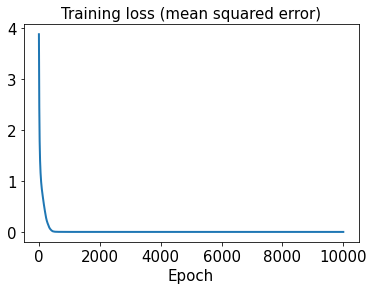

In [84]:
hist3 = history3.history
plt.plot(hist3['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

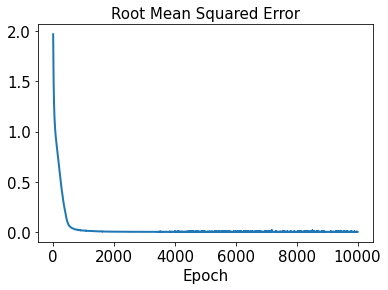

In [85]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [86]:
test_results3 = sd3.evaluate(t_test)

1/1 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - rmse: 0.0000e+00


In [87]:
decoded_train3 = sd3.predict(t_train)

In [88]:
decoded_test3 = sd3.predict(t_test)

In [89]:
error_train_abs3 = np.abs(decoded_train3 - y_train3)

In [90]:
error_test_abs3 = np.abs(decoded_test3 - y_test3)

In [91]:
l2_error_train3 = np.sqrt(np.sum((decoded_train3 - y_train3)**2) / np.sum(y_train3**2))
print(l2_error_train3)

0.0022991316675932474


In [92]:
l2_error_test3 = np.sqrt(np.sum((decoded_test3 - y_test3)**2) / np.sum(y_test3**2))
print(l2_error_test3)

0.011476349656984585


In [93]:
l2_error_train_list3 = []
for i in range(0, len(x_train3)):
    l2_error_train_data3 = np.sqrt(np.sum((decoded_train3[i] - y_train3[i])**2) / np.sum(y_train3[i]**2))
    l2_error_train_list3.append(l2_error_train_data3)
print(l2_error_train_list3)

[0.00323622870383377, 0.0017012091943343624, 0.0026297144300708028, 0.0022535753569343096, 0.0019409772004560268, 0.0007468175523093538, 0.0016746252481252741, 0.0031815769220451457, 0.0015592773619825008, 0.004217626924097218, 0.0034339677063062895, 0.0006797516848241285, 0.0028712171747893515, 0.002370994225446143, 0.0022385017821597046, 0.0015336141145908587, 0.003254498033264337, 0.003176576326733629, 0.002105551339953195, 0.0034611238528929208, 0.004517703550830706, 0.002205330948339083, 0.00465521610483101, 0.0022971151191653813, 0.0032446565200702367, 0.0016613459993827925, 0.002599927877594409, 0.0026308925565487937, 0.0031673175781544998, 0.0007537012470012388, 0.0018101322942499643, 0.0028005534142595176, 0.004188574070997274]


In [94]:
l2_error_test_list3 = []
for i in range(0, len(x_test3)):
    l2_error_test_data3 = np.sqrt(np.sum((decoded_test3[i] - y_test3[i])**2) / np.sum(y_test3[i]**2))
    l2_error_test_list3.append(l2_error_test_data3)
print(l2_error_test_list3)

[0.0017011503569985887, 0.0017025110965371295, 0.0015656055789480632, 0.002195253379382336, 0.002454194722179033, 0.05025680453534415, 0.0030020150148550246, 0.02282624111133401]


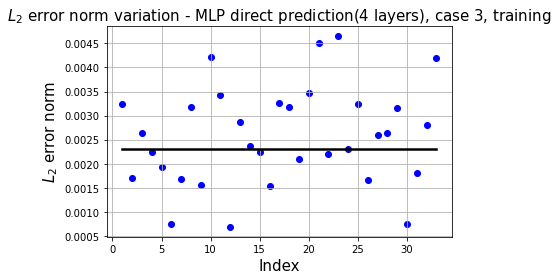

In [105]:
plt.plot(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train3*np.ones(x_train3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(4 layers), case 3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

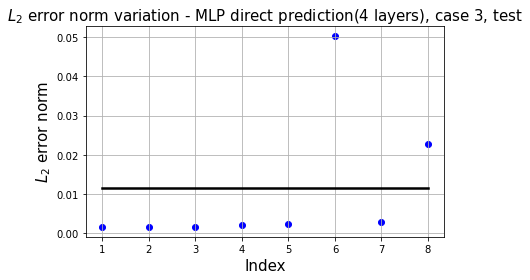

In [106]:
plt.plot(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test3*np.ones(x_test3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction(4 layers), case 3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

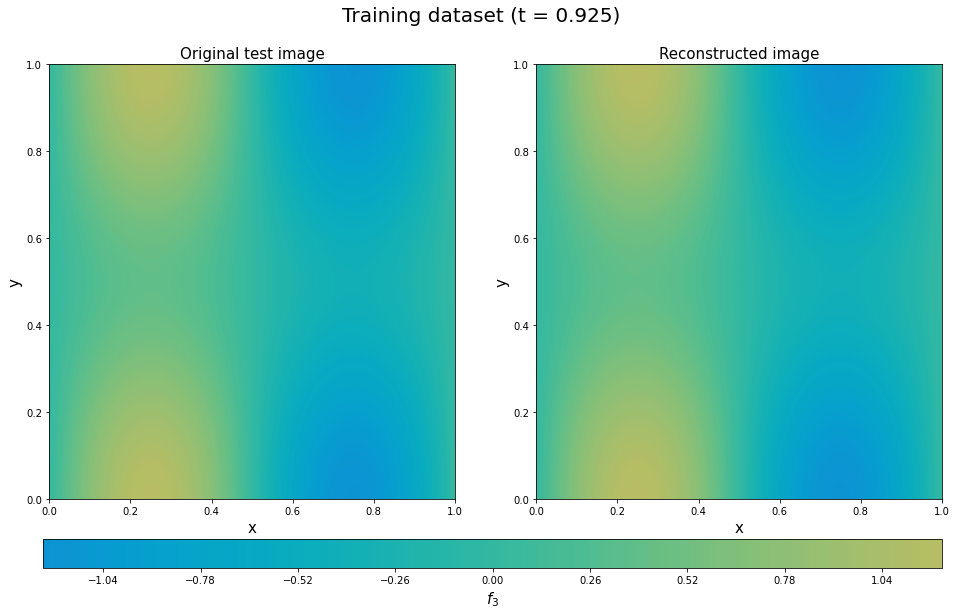

In [97]:
plt.figure(figsize=(16, 8))
y_train3_20_rotate = y_train3[20].T.reshape(101,101)
decoded_rotate3 = decoded_train3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_20_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[37]),fontsize=20)
plt.show()

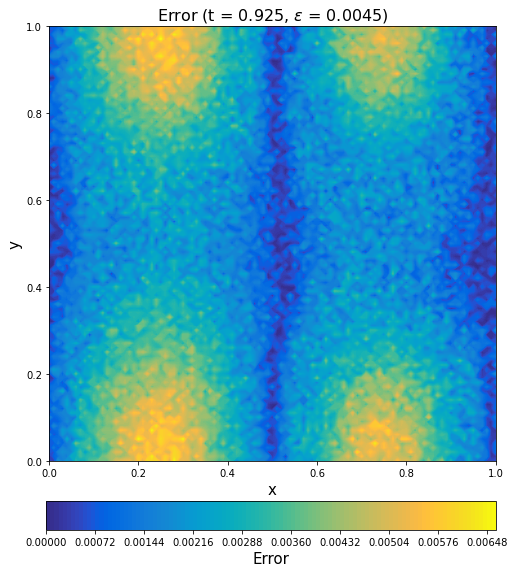

In [98]:
error_train_abs3_rotate20 = error_train_abs3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate20, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.925, $\epsilon$ = %.4f)' %(l2_error_train_list3[20]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

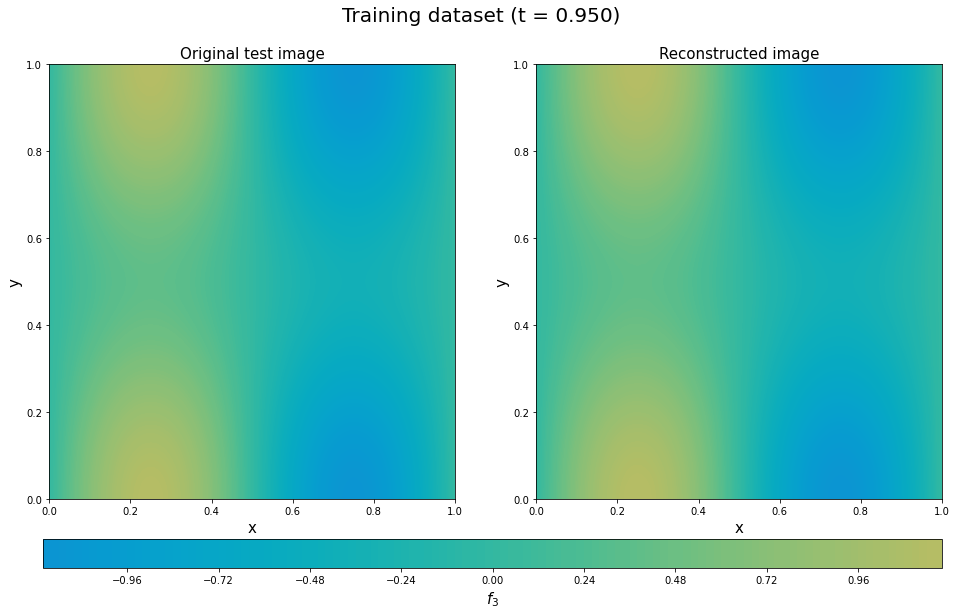

In [99]:
plt.figure(figsize=(16, 8))
y_train3_32_rotate = y_train3[32].T.reshape(101,101)
decoded_rotate3 = decoded_train3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_32_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[38]), fontsize=20)
plt.show()

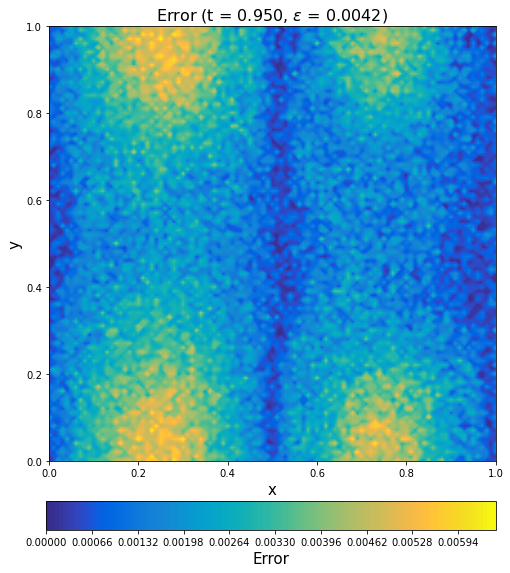

In [100]:
error_train_abs3_rotate32 = error_train_abs3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate32, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.950, $\epsilon$ = %.4f)' %(l2_error_train_list3[32]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

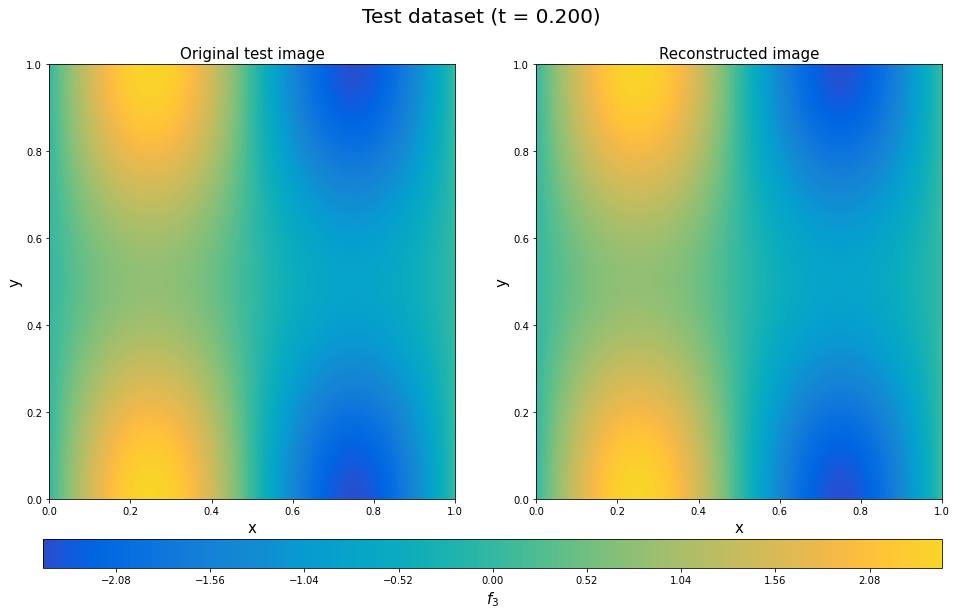

In [101]:
plt.figure(figsize=(16, 8))
y_test3_2_rotate = y_test3[2].T.reshape(101,101)
decoded_rotate3 = decoded_test3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

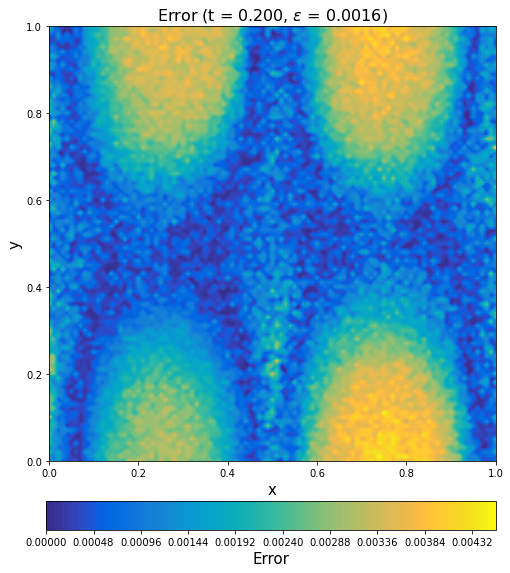

In [102]:
error_test_abs3_rotate2 = error_test_abs3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list3[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

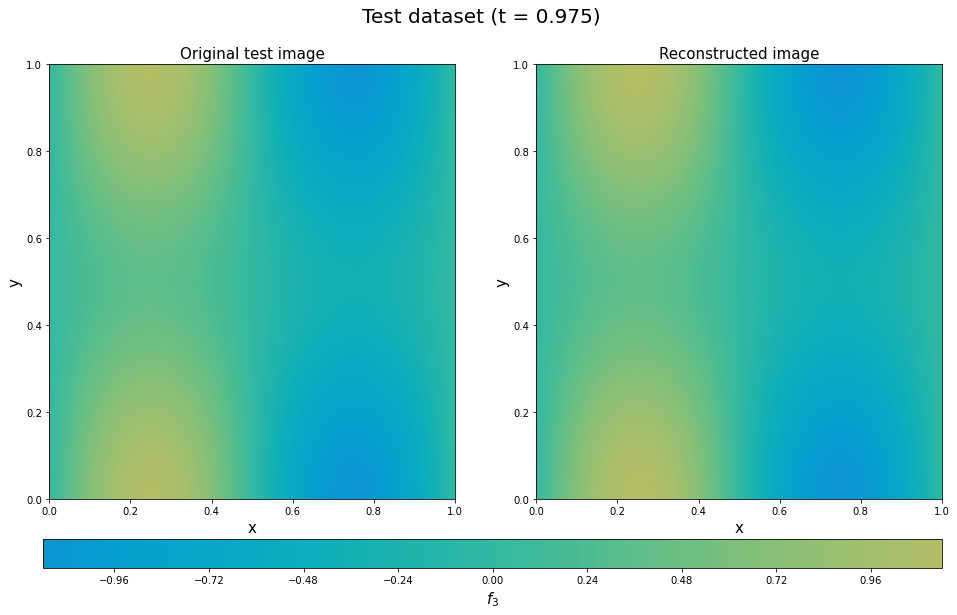

In [103]:
plt.figure(figsize=(16, 8))
y_test3_7_rotate = y_test3[7].T.reshape(101,101)
decoded_rotate3 = decoded_test3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_7_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[39]),fontsize=20)
plt.show()

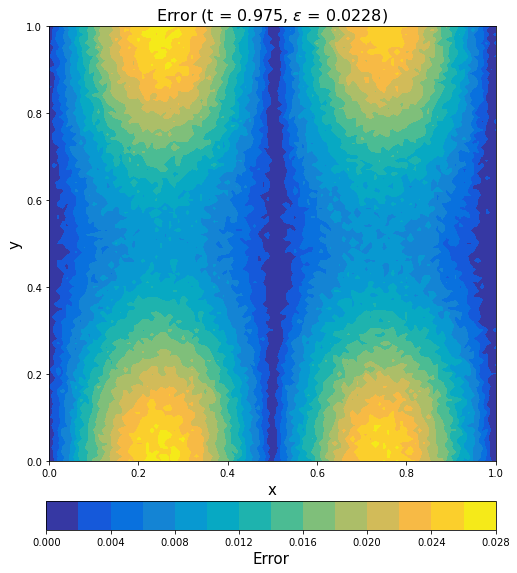

In [104]:
error_test_abs3_rotate7 = error_test_abs3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate7, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.975, $\epsilon$ = %.4f)' %(l2_error_test_list3[7]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()